# Analysis the cross-correlation between Covid-19 and mobility.
References:
* https://www.geeksforgeeks.org/matplotlib-pyplot-xcorr-in-python/
* https://coderzcolumn.com/tutorials/data-science/how-to-remove-trend-and-seasonality-from-time-series-data-using-python-pandas
* https://www.datainsightonline.com/post/cross-correlation-with-two-time-series-in-python
* https://online.stat.psu.edu/stat510/lesson/8/8.2

In [1]:
import  pandas as pd

## Loading data

In [2]:
df_covid_mobility = pd.read_csv('../data/df_ts_covid_mobility.csv', index_col=0)
df_covid_mobility.DATA = pd.to_datetime(df_covid_mobility.DATA, infer_datetime_format=True)

In [3]:
df_diff = pd.read_csv('../data/df_treated_time_series.csv', index_col=0)
df_diff.DATA = pd.to_datetime(df_diff.DATA, infer_datetime_format=True)

In [4]:
df_test_stationary_diff = pd.read_csv('../data/df_test_stationary_and_white_noise.csv', index_col=0)

In [5]:
# df_diff = df_diff[df_diff.CODIGO_MUNICIPIO_7.isin(df_test_stationary_diff[(df_test_stationary_diff.COLUMN == 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS') & (df_test_stationary_diff['WHITE_NOISE_P_VALUE'] >= 0.05)].CODIGO_MUNICIPIO_7)].copy()

In [6]:
df_diff.to_csv('../data/df_treated_time_series_selected.csv')

In [7]:
len(df_diff.CODIGO_MUNICIPIO_7.unique())

41

## Executing cross-correlation

In [8]:
df_sum = df_covid_mobility.groupby('CODIGO_MUNICIPIO_7').sum()[['TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS']].reset_index()
df_sum = df_sum.rename(columns={'TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS': 'TAXA_OBITOS_FINAL'})
df_diff = df_diff.merge(df_sum, how='left', left_on='CODIGO_MUNICIPIO_7', right_on='CODIGO_MUNICIPIO_7')

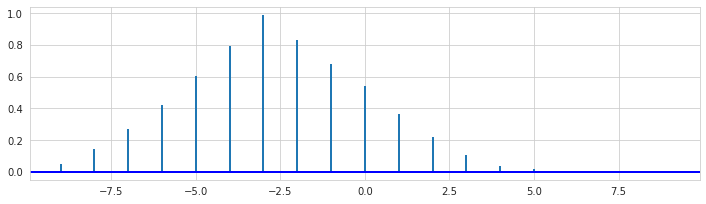

In [9]:
# Test to show that x implies in y in left side, and in right side y imply in x.

# import matplotlib library
import matplotlib.pyplot as plt
import numpy as np

# float lists for cross
# correlation
x=np.array([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 8.0, 9.0, 10.0])

y=np.array([0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])

# Plot graph
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(211)

# cross correlation using
# xcorr() function
lags, c, _, _ = ax1.xcorr(x, y, usevlines=True,
          maxlags=None, normed=True,
          lw=2)
# adding grid to the graph
ax1.grid(True)
ax1.axhline(0, color='blue', lw=2)

# show final plotted graph
plt.show()


In [10]:
lags

array([-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9])

In [11]:
c

array([0.04956816, 0.14162331, 0.2690843 , 0.42486994, 0.60189908,
       0.79309056, 0.99136319, 0.83274508, 0.68050002, 0.54100106,
       0.36609627, 0.21951614, 0.10834183, 0.03965453, 0.02053538,
       0.00708117, 0.        , 0.        , 0.        ])

In [12]:
def calculate_cross_correlation(x, y):
    # Plot graph
    fig = plt.figure(figsize=(12,7))
    ax1 = fig.add_subplot(211)
    lags_x, c_x, _, _ = ax1.acorr(x, usevlines=True,
          maxlags=1, normed=True,
          lw=2)
    plt.show()

    fig = plt.figure(figsize=(12,7))
    ax1 = fig.add_subplot(211)
    lags_y, c_y, _, _ = ax1.acorr(y, usevlines=True,
          maxlags=1, normed=True,
          lw=2)
    plt.show()

    fig = plt.figure(figsize=(12,7))
    ax1 = fig.add_subplot(211)    
    max_lags_to_show = min(30, len(x)-1)
    lags, c, _, _ = ax1.xcorr(x, y, usevlines=True,
              maxlags=max_lags_to_show, normed=True,
              lw=2)
    # ax1.grid(True)
    ax1.axhline(0, color='blue', lw=2)

    # Compute the Significance level
    # ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
    n_lags_total = len(x)
    # conf_level = 2 / np.sqrt(n_lags_total)
    conf_level = 1.96 / np.sqrt(n_lags_total)
    ax1.axhline(conf_level, xmin=-max_lags_to_show, xmax=max_lags_to_show, color='gray')
    ax1.axhline(-conf_level, xmin=-max_lags_to_show, xmax=max_lags_to_show, color='gray')

    a = c_x[-1]
    b = c_y[-1]
    conf_level_hard = conf_level * np.sqrt((1 + a*b) / (1 - a*b))
    ax1.axhline(conf_level_hard, xmin=-max_lags_to_show, xmax=max_lags_to_show, color='red')
    ax1.axhline(-conf_level_hard, xmin=-max_lags_to_show, xmax=max_lags_to_show, color='red')

    # show final plotted graph
    plt.show()

    return lags, c, max_lags_to_show, conf_level, conf_level_hard

In [13]:
df_diff['YEAR'] = pd.to_datetime(df_diff['DATA']).dt.year
df_diff_2020 = df_diff[df_diff.YEAR == 2020]
df_diff_2021 = df_diff[df_diff.YEAR == 2021]
df_diff_2022 = df_diff[df_diff.YEAR == 2022]


*** (general) Aparecida de Goiânia
r0_DETRENDED


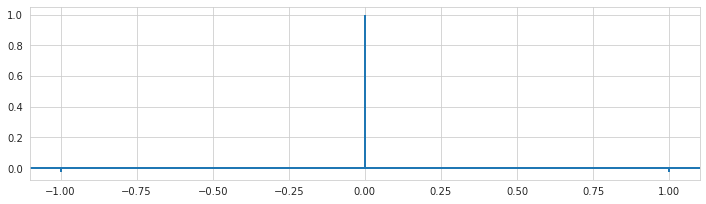

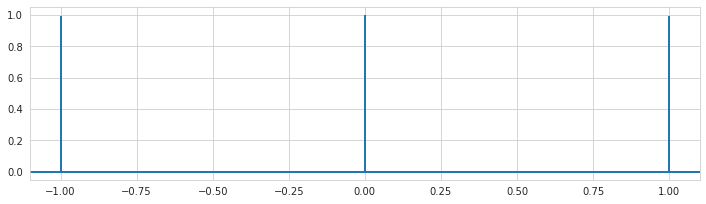

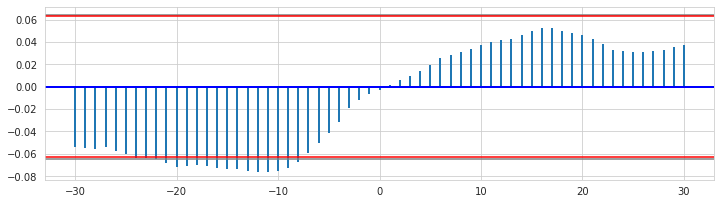


*** (general) Aracaju
r0_DETRENDED


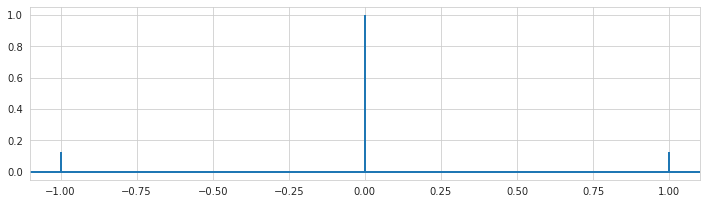

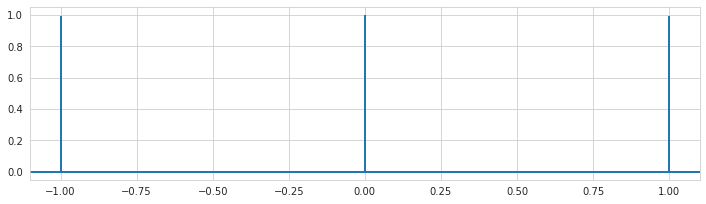

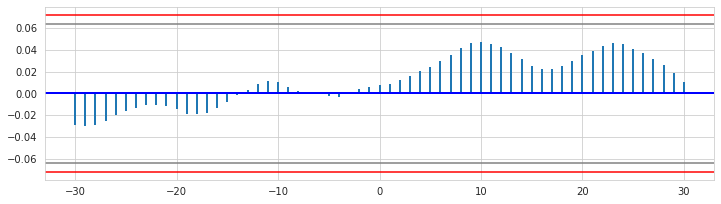


*** (general) Belo Horizonte
r0_DETRENDED


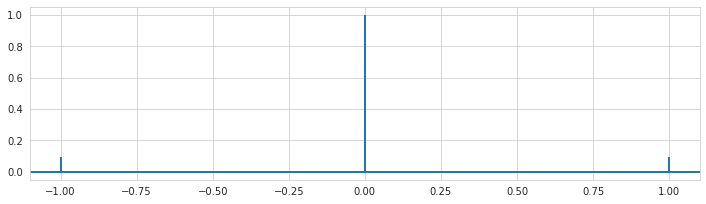

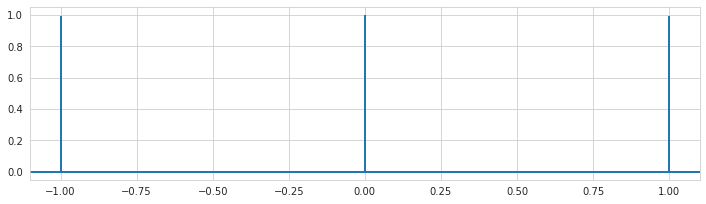

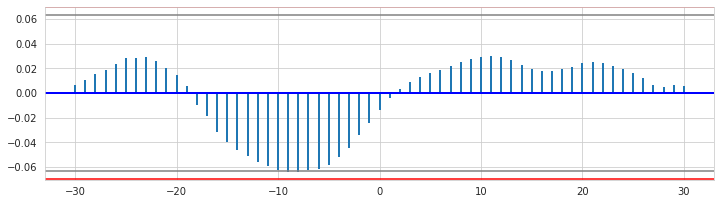


*** (general) Belém
r0_DETRENDED


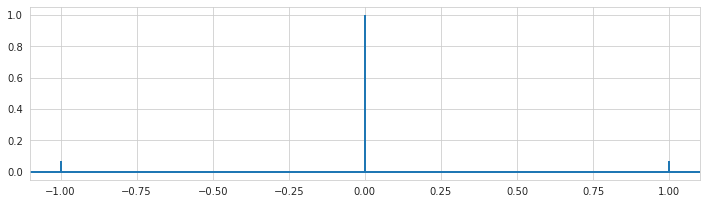

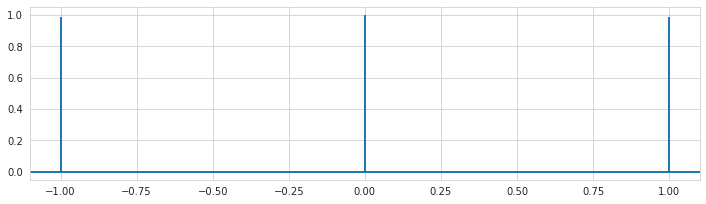

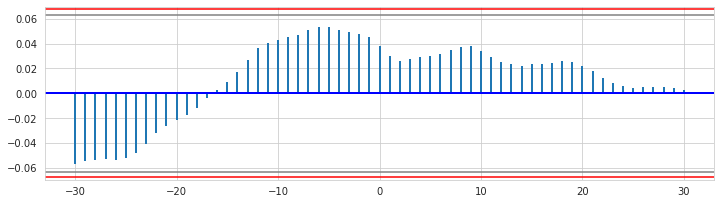


*** (general) Brasília
r0_DETRENDED


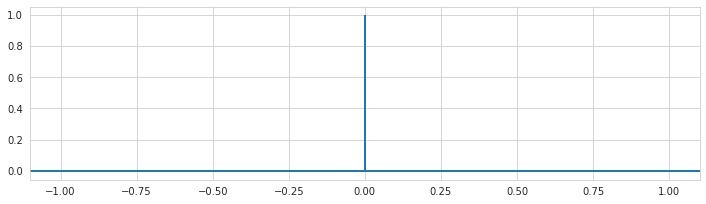

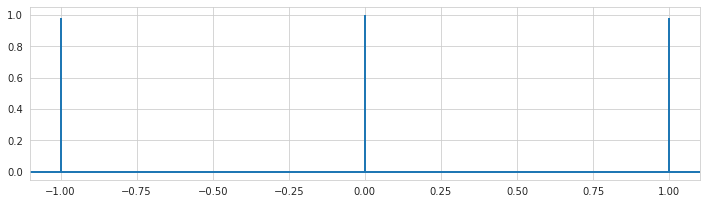

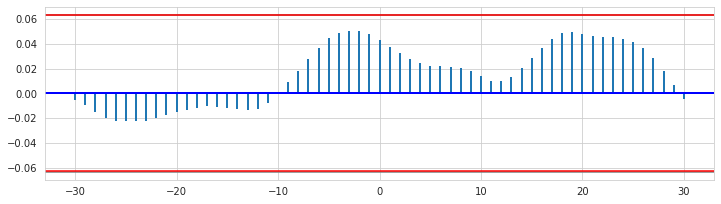


*** (general) Campinas
r0_DETRENDED


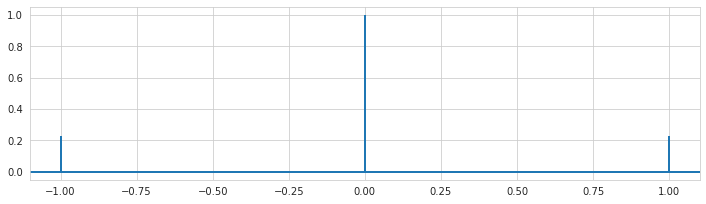

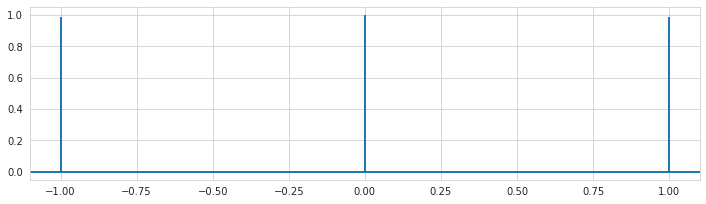

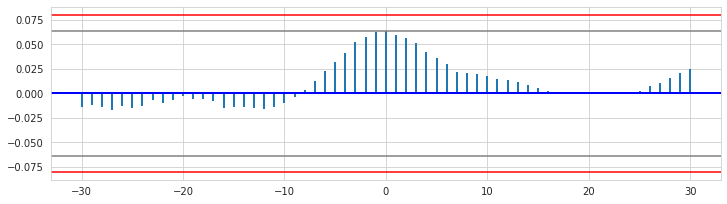


*** (general) Campo Grande
r0_DETRENDED


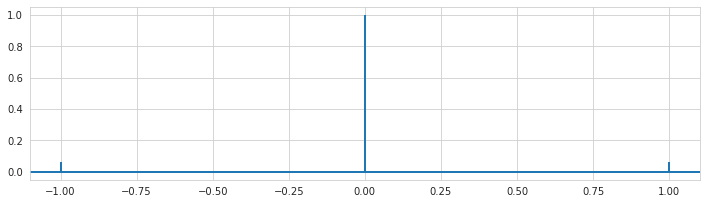

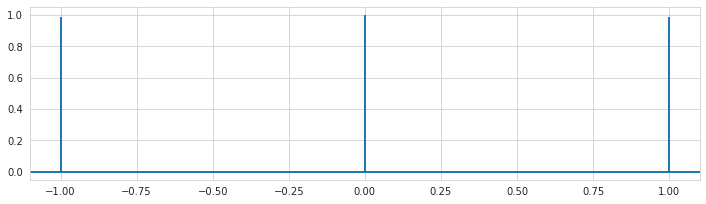

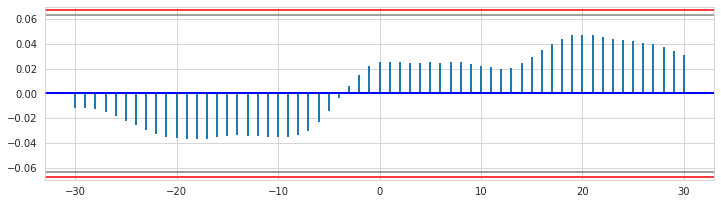


*** (general) Contagem
r0_DETRENDED


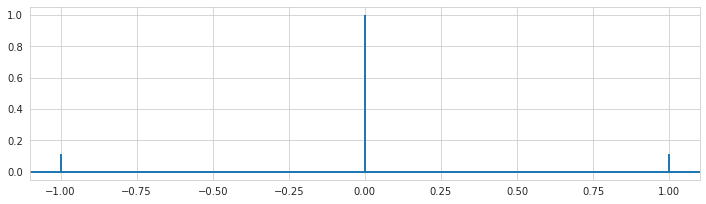

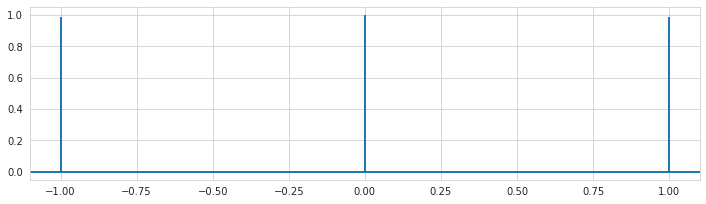

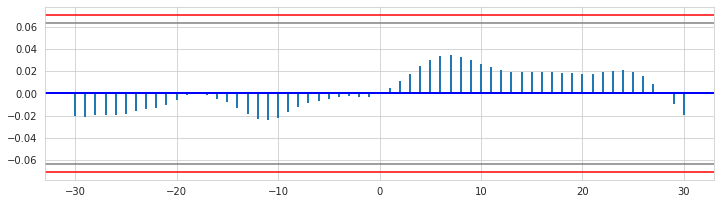


*** (general) Cuiabá
r0_DETRENDED


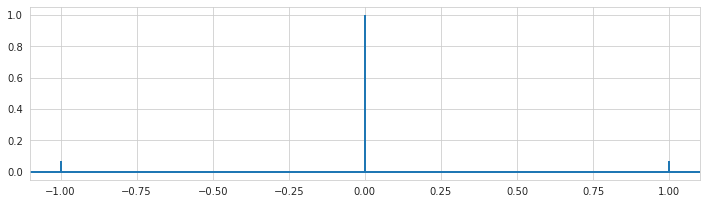

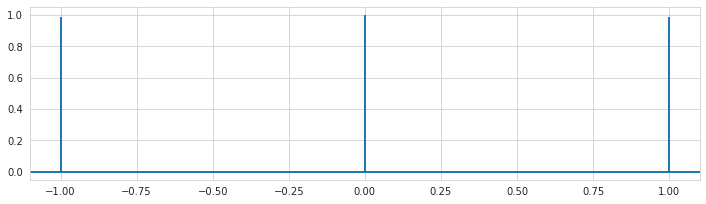

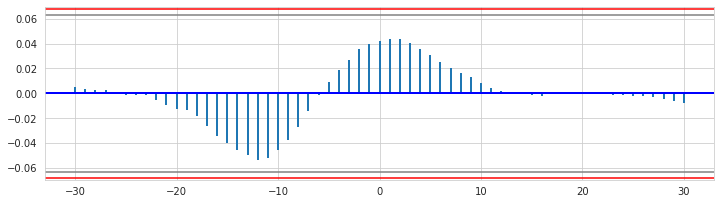


*** (general) Curitiba
r0_DETRENDED


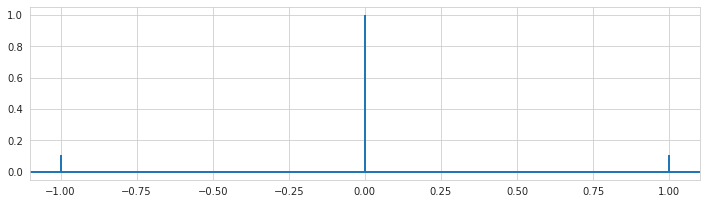

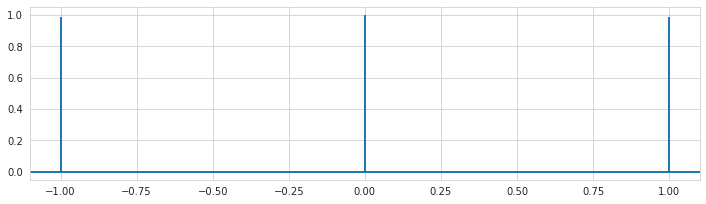

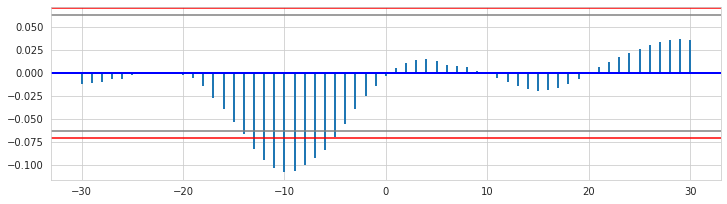


*** (general) Duque de Caxias
r0_DETRENDED


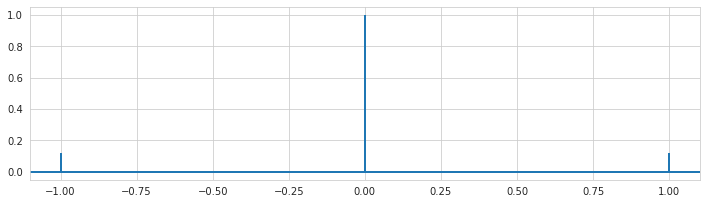

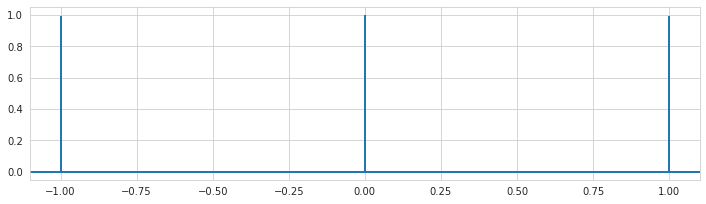

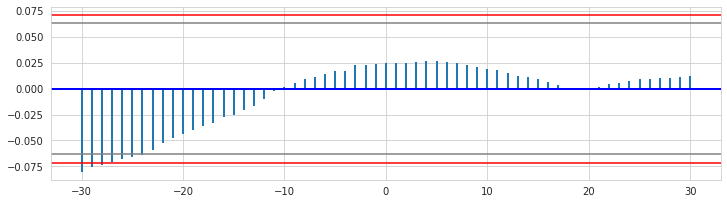


*** (general) Feira de Santana
r0_DETRENDED


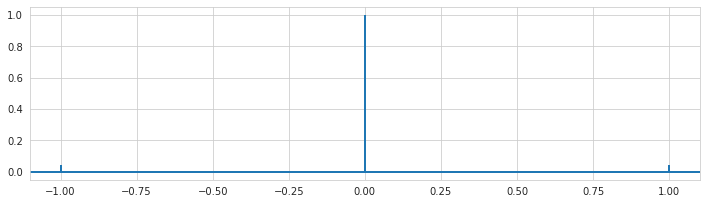

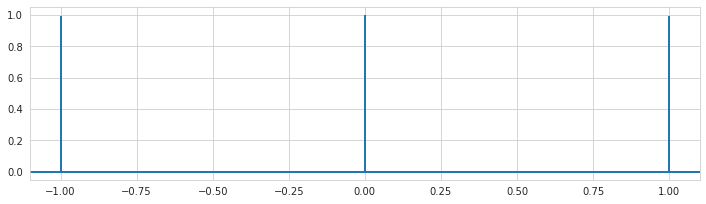

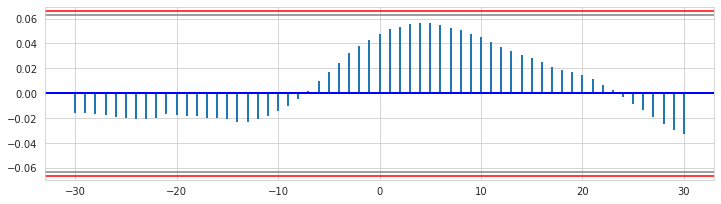


*** (general) Florianópolis
r0_DETRENDED


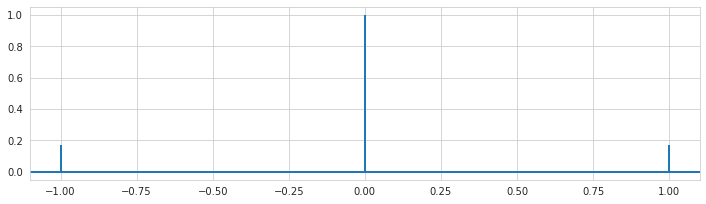

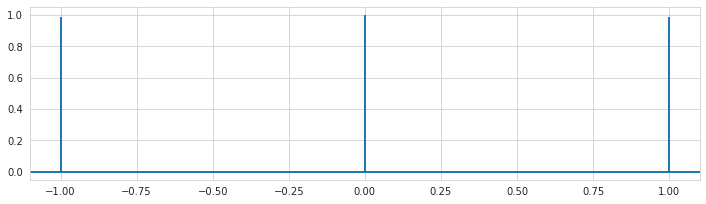

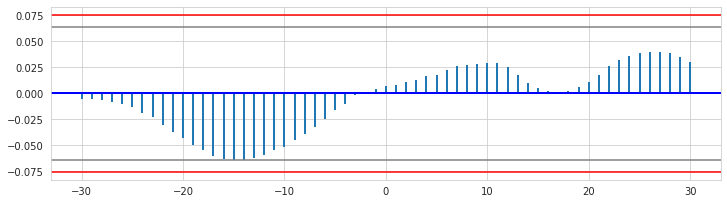


*** (general) Fortaleza
r0_DETRENDED


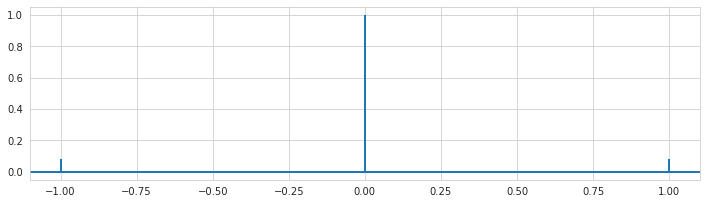

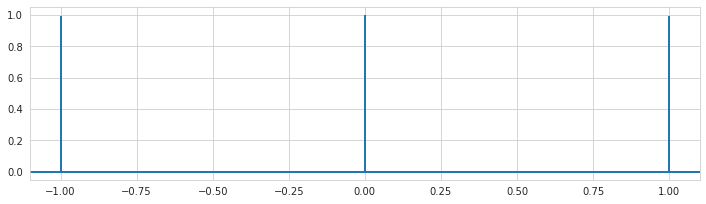

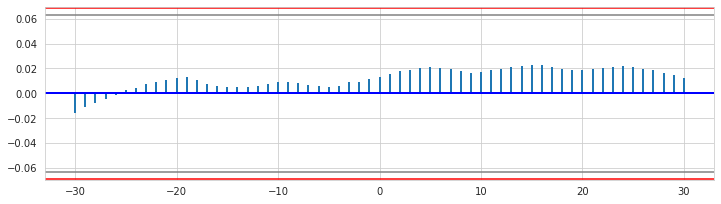


*** (general) Goiânia
r0_DETRENDED


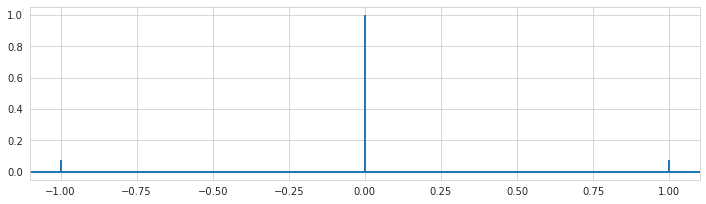

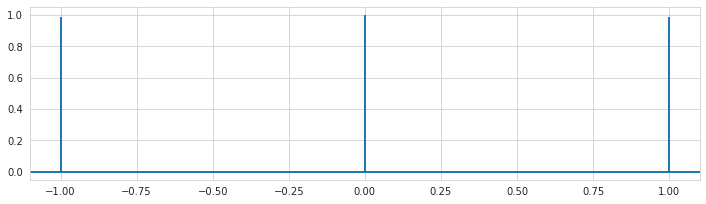

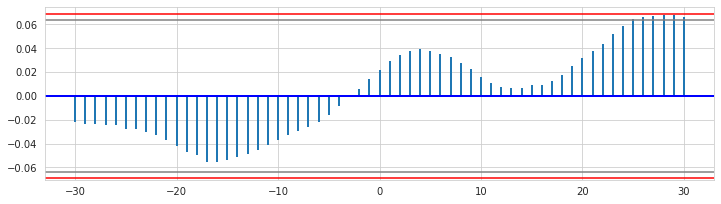


*** (general) Guarulhos
r0_DETRENDED


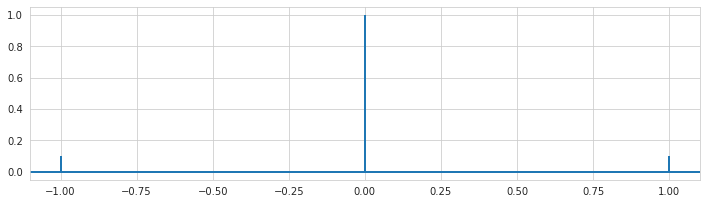

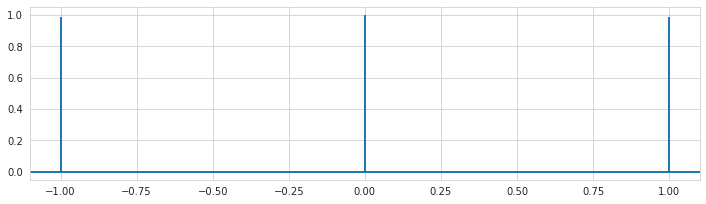

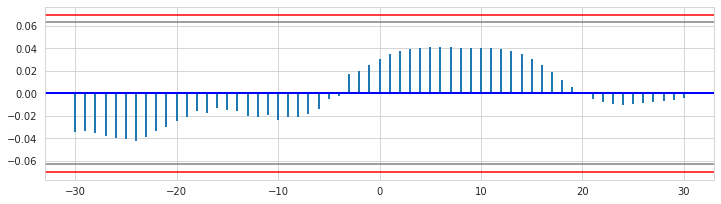


*** (general) Jaboatão dos Guararapes
r0_DETRENDED


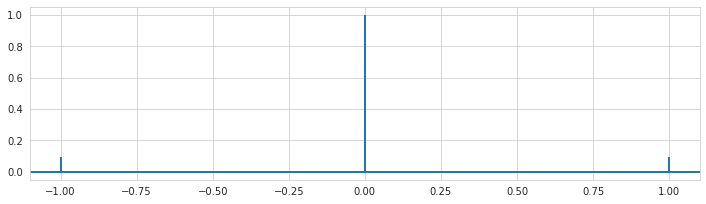

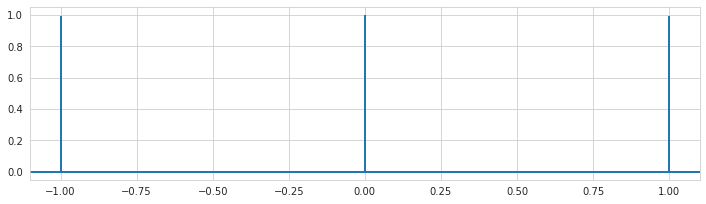

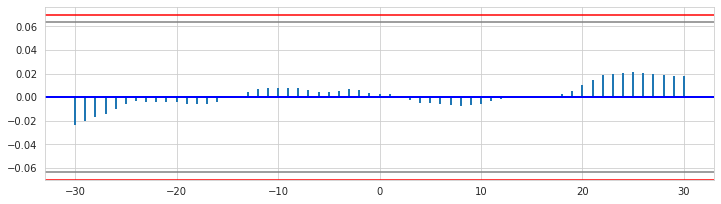


*** (general) Joinville
r0_DETRENDED


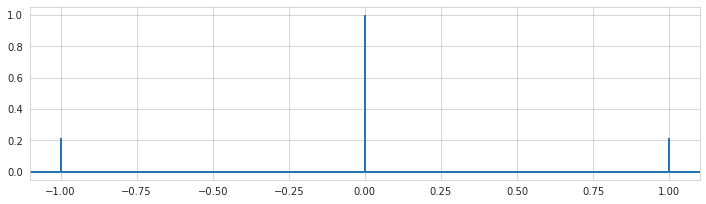

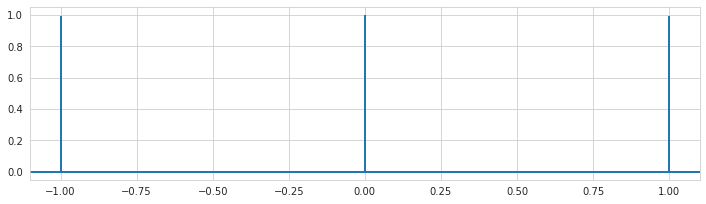

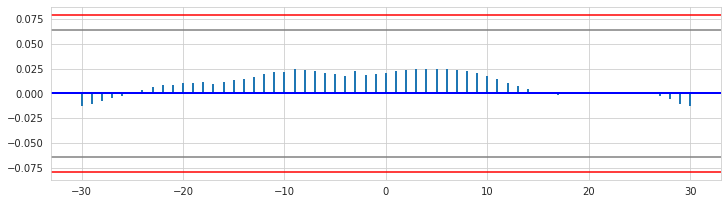


*** (general) João Pessoa
r0_DETRENDED


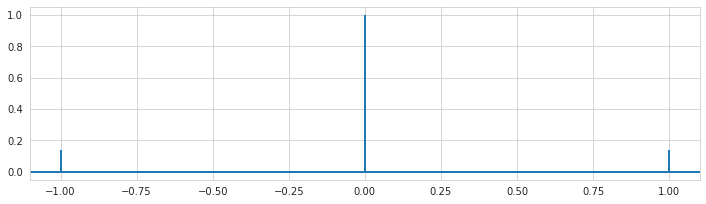

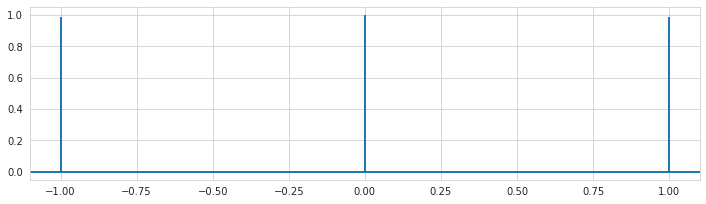

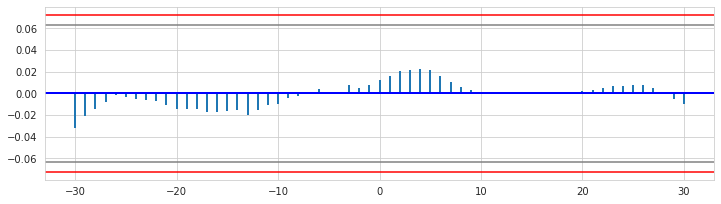


*** (general) Juiz de Fora
r0_DETRENDED


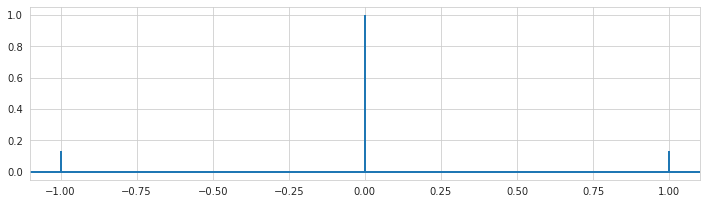

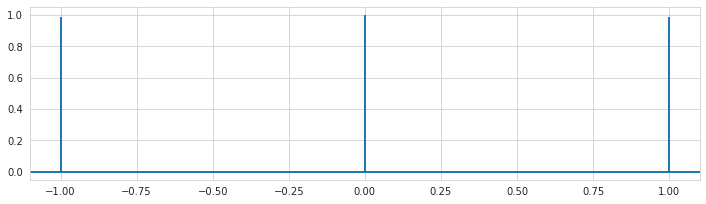

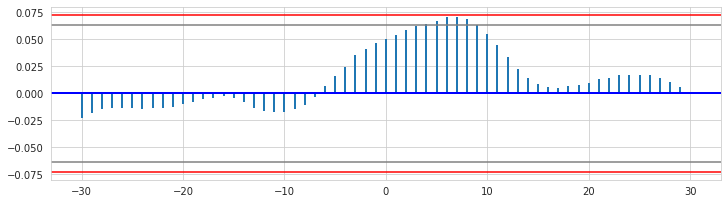


*** (general) Londrina
r0_DETRENDED


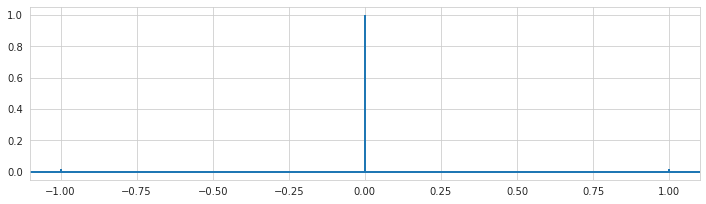

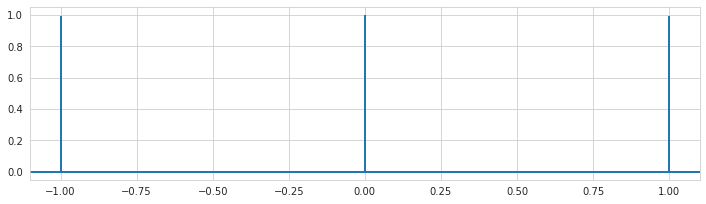

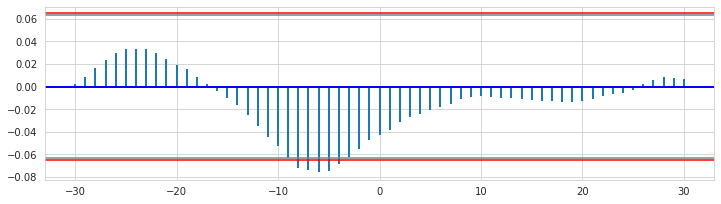


*** (general) Maceió
r0_DETRENDED


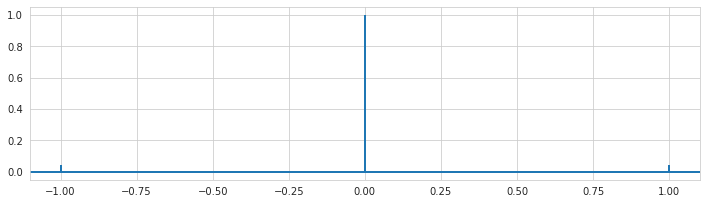

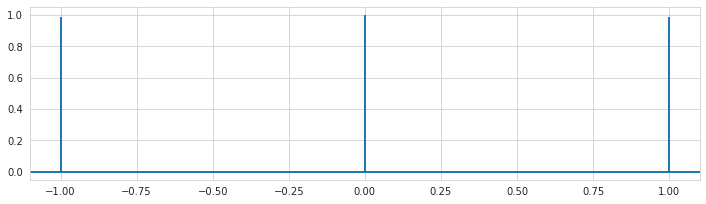

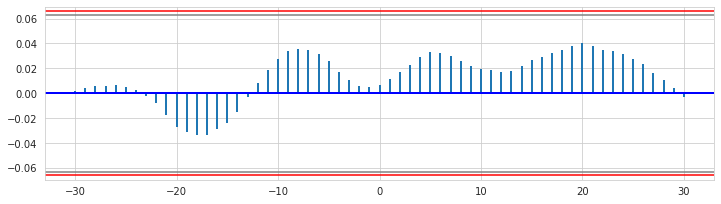


*** (general) Manaus
r0_DETRENDED


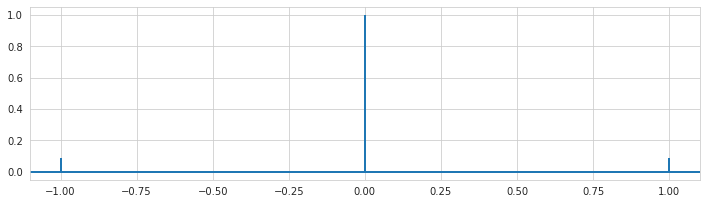

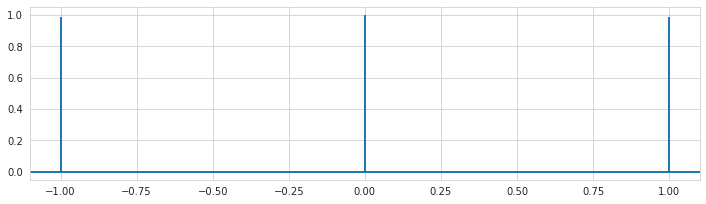

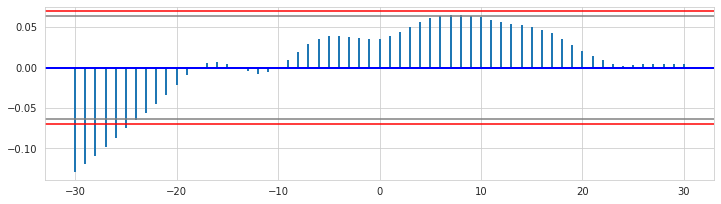


*** (general) Natal
r0_DETRENDED


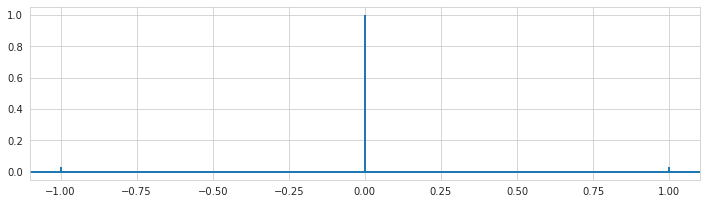

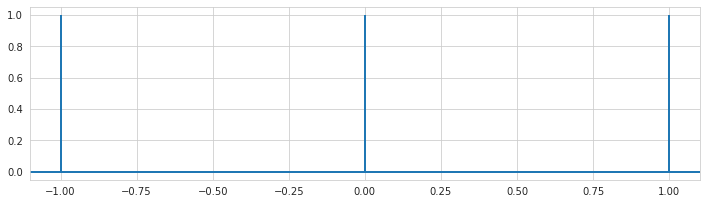

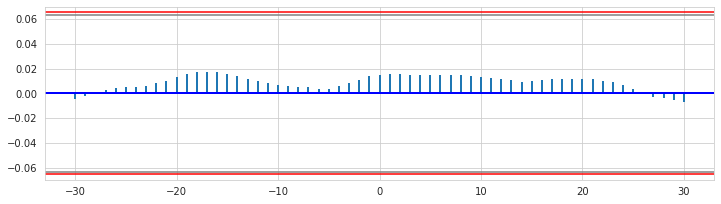


*** (general) Nova Iguaçu
r0_DETRENDED


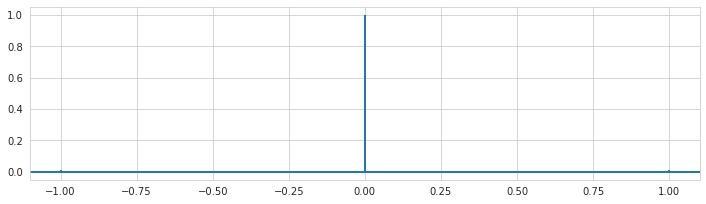

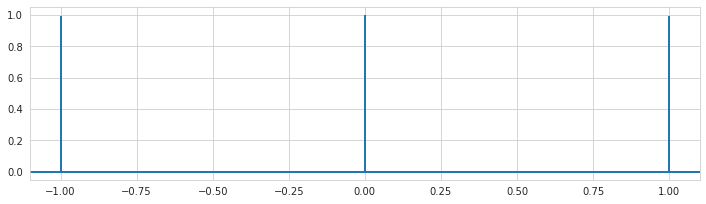

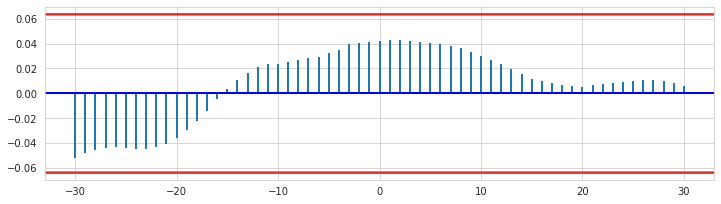


*** (general) Osasco
r0_DETRENDED


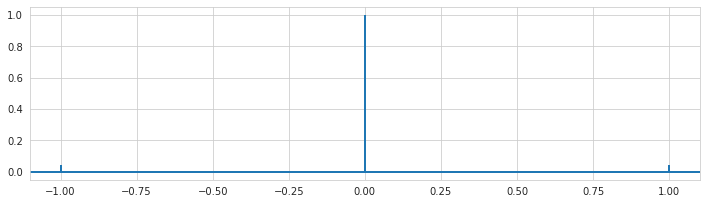

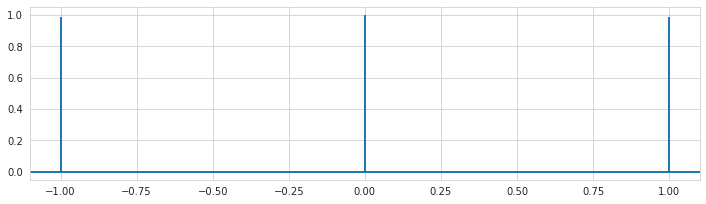

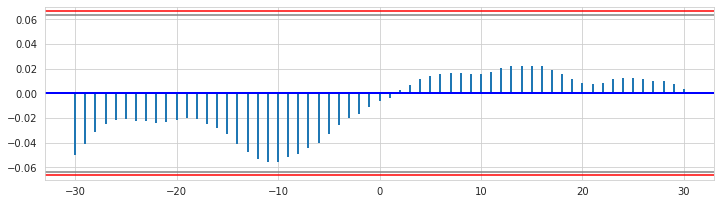


*** (general) Porto Alegre
r0_DETRENDED


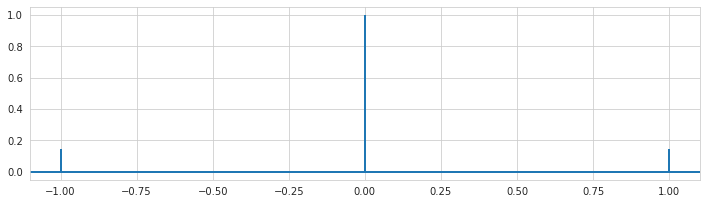

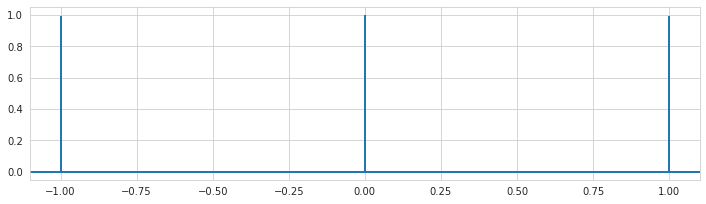

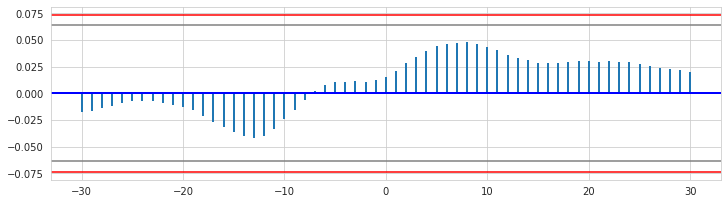


*** (general) Recife
r0_DETRENDED


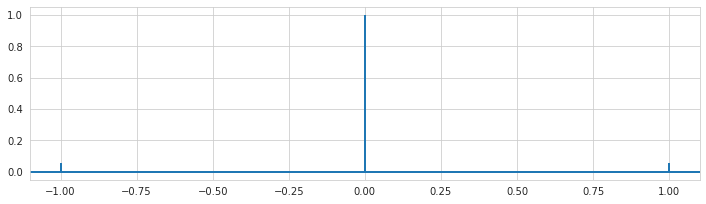

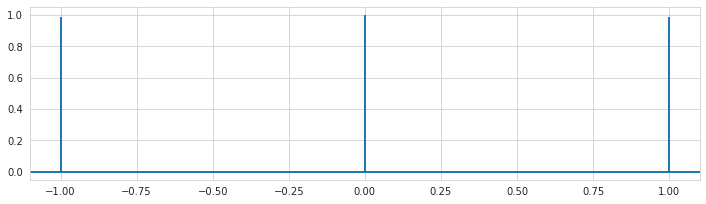

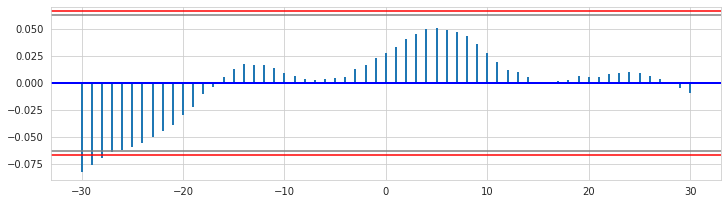


*** (general) Ribeirão Preto
r0_DETRENDED


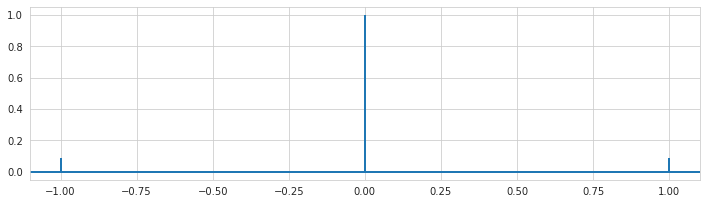

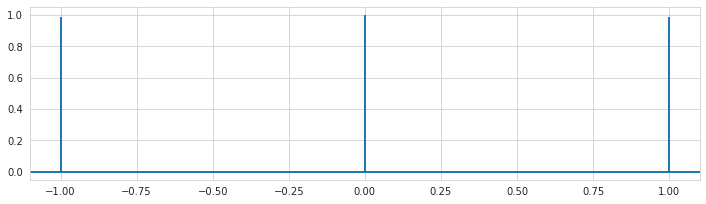

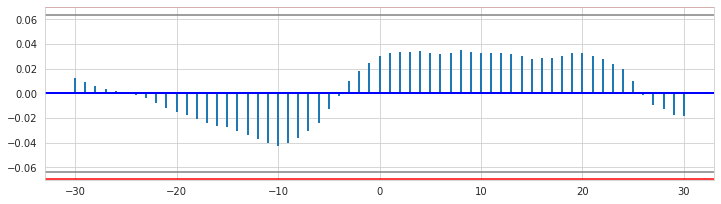


*** (general) Rio de Janeiro
r0_DETRENDED


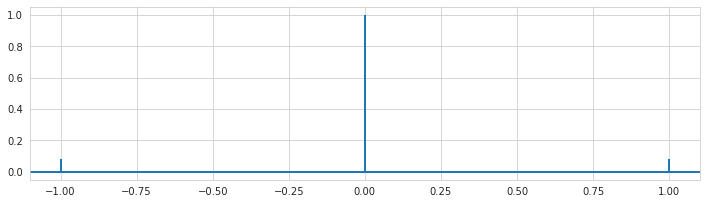

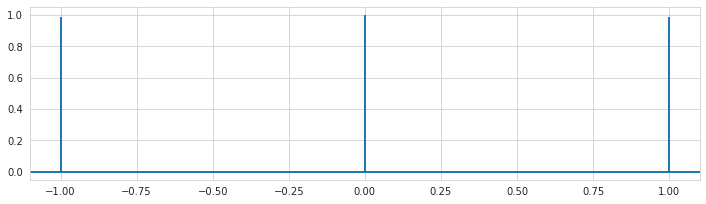

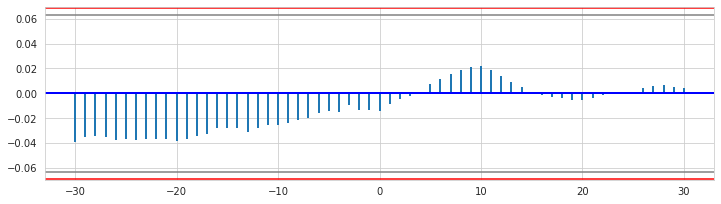


*** (general) Salvador
r0_DETRENDED


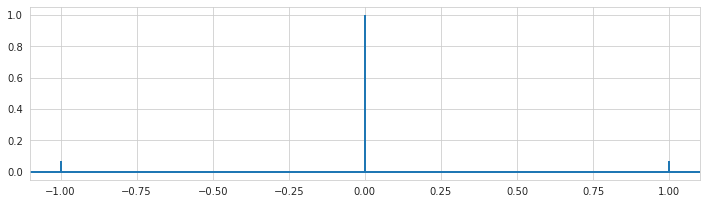

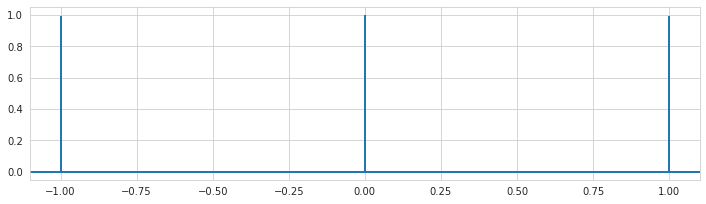

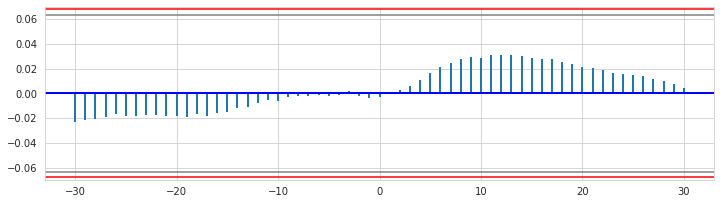


*** (general) Santo André
r0_DETRENDED


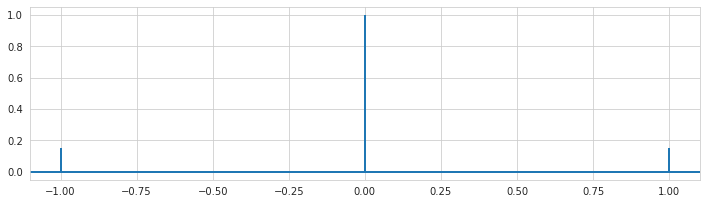

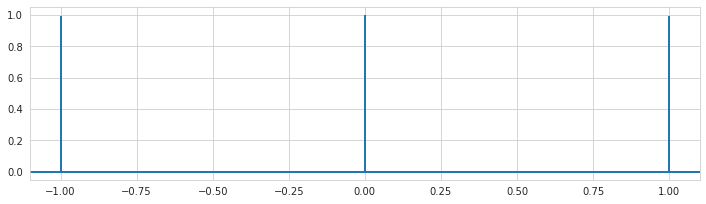

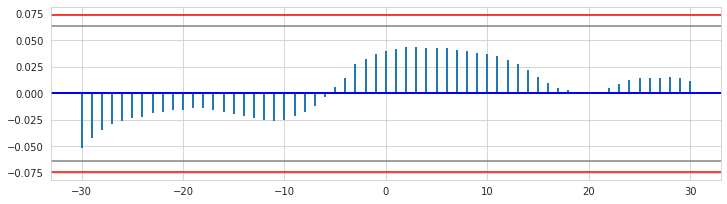


*** (general) Serra
r0_DETRENDED


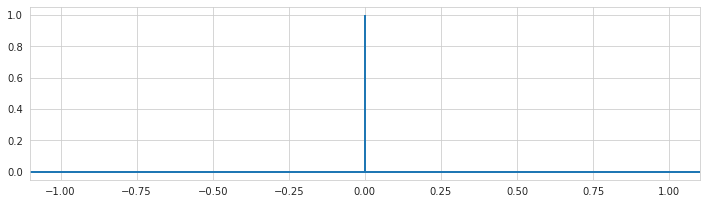

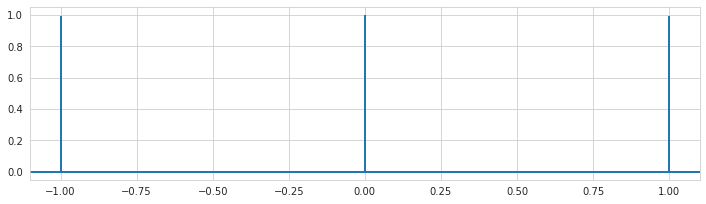

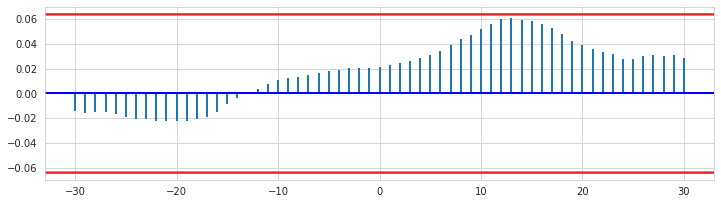


*** (general) Sorocaba
r0_DETRENDED


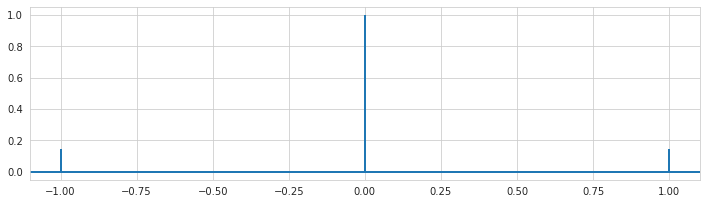

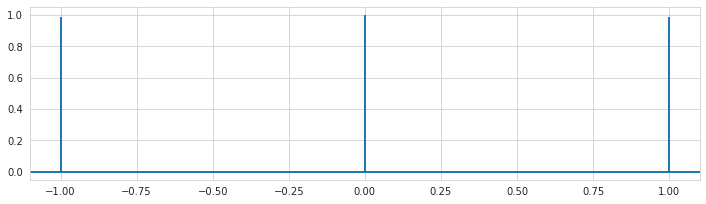

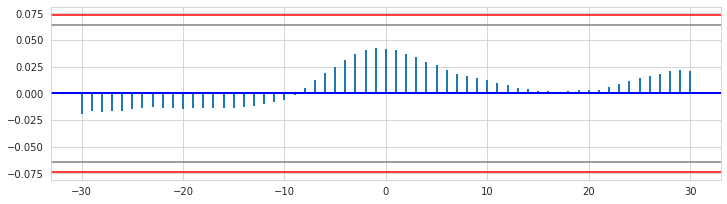


*** (general) São Bernardo do Campo
r0_DETRENDED


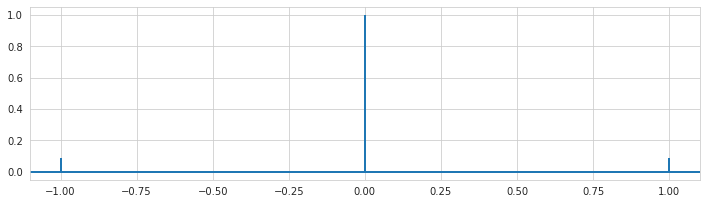

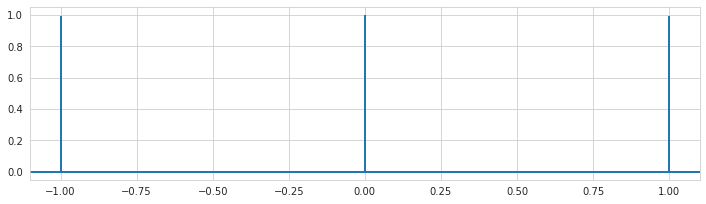

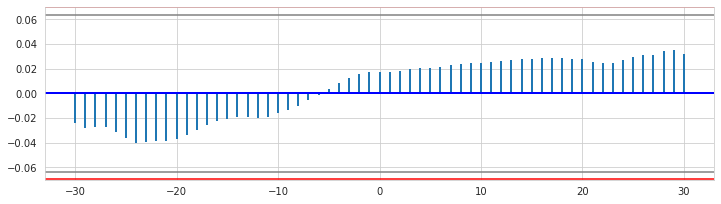


*** (general) São Gonçalo
r0_DETRENDED


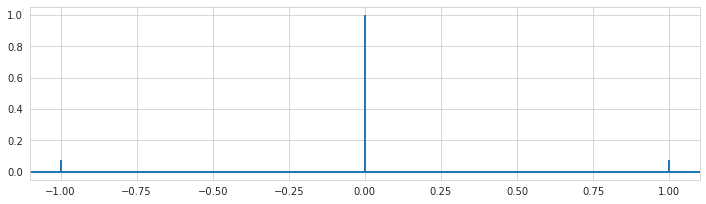

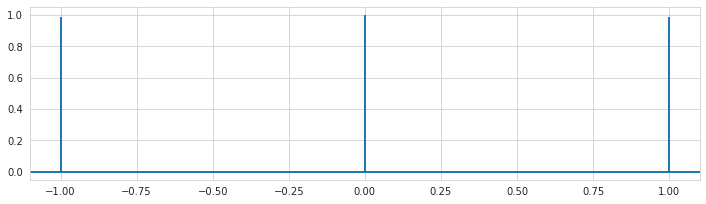

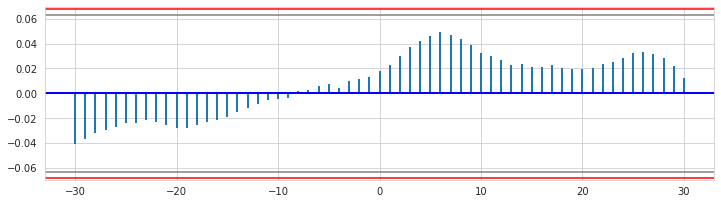


*** (general) São José dos Campos
r0_DETRENDED


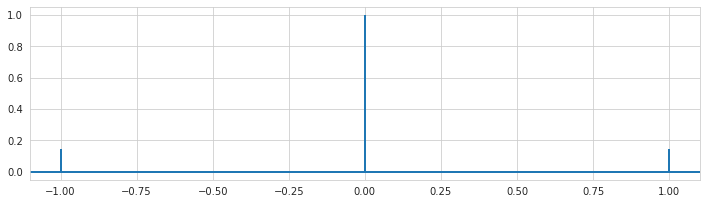

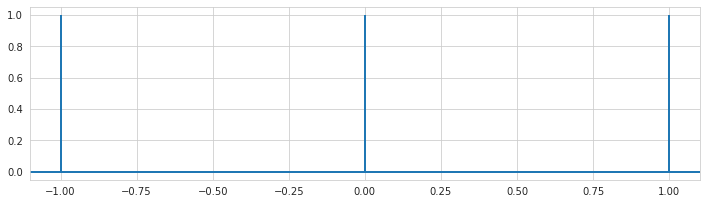

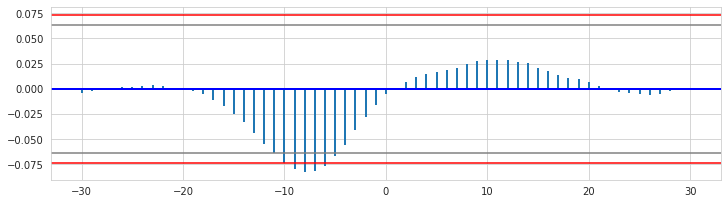


*** (general) São Luís
r0_DETRENDED


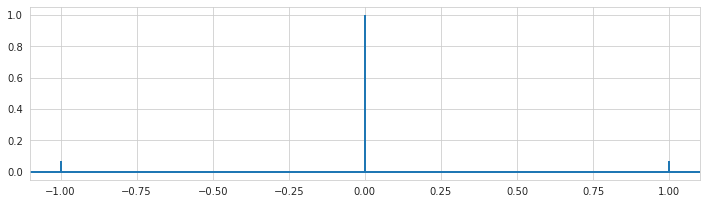

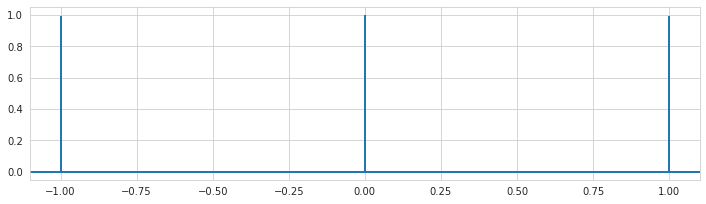

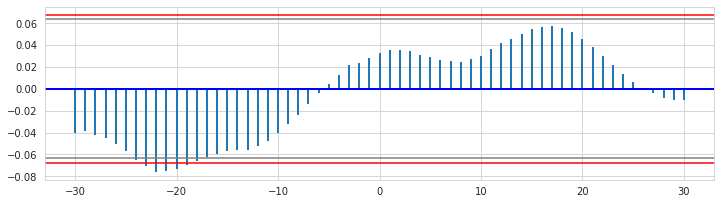


*** (general) São Paulo
r0_DETRENDED


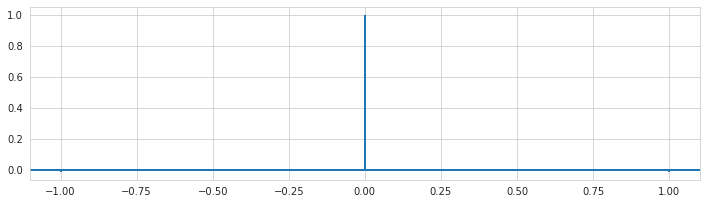

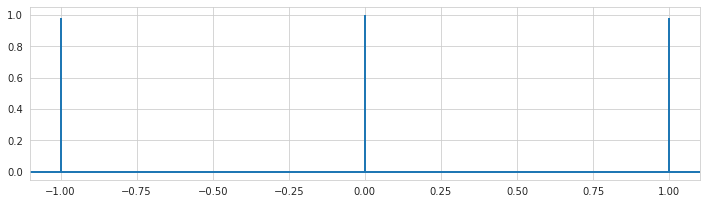

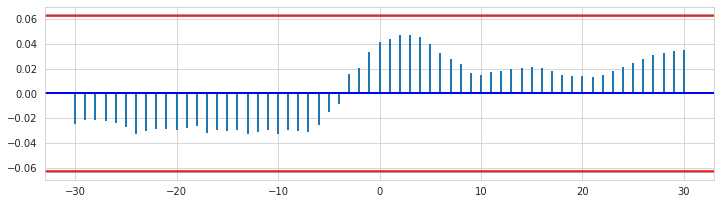


*** (general) Teresina
r0_DETRENDED


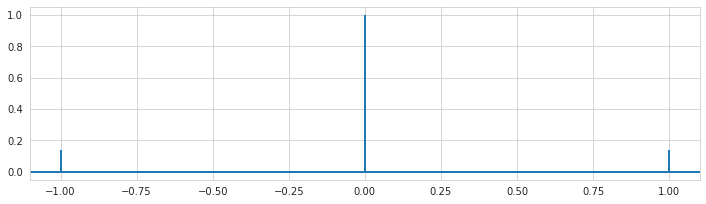

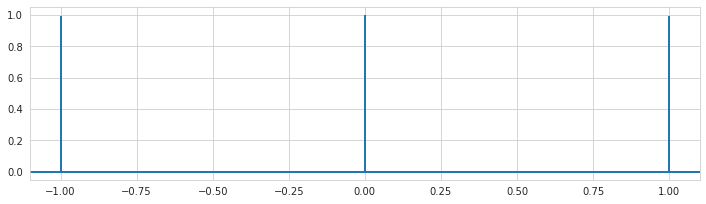

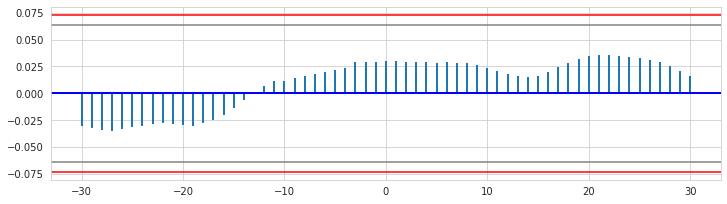


*** (general) Uberlândia
r0_DETRENDED


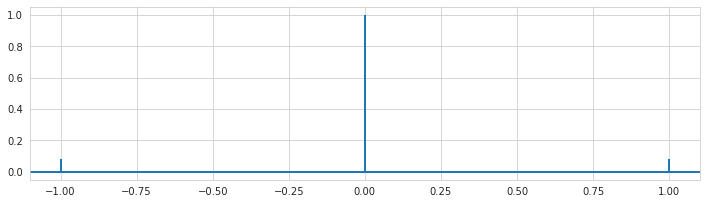

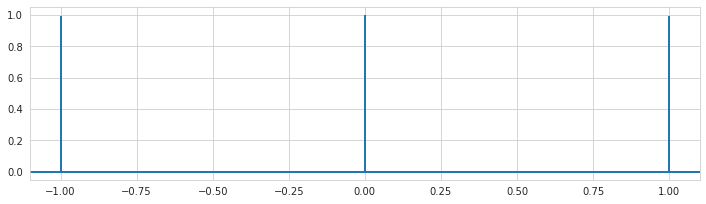

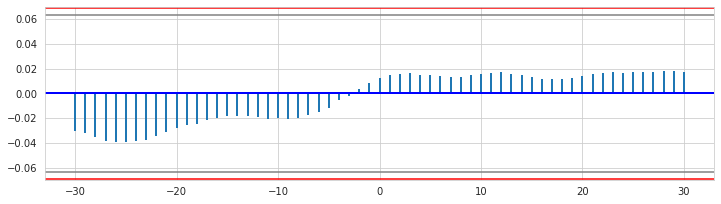


*** (2020) Aparecida de Goiânia
r0_DETRENDED


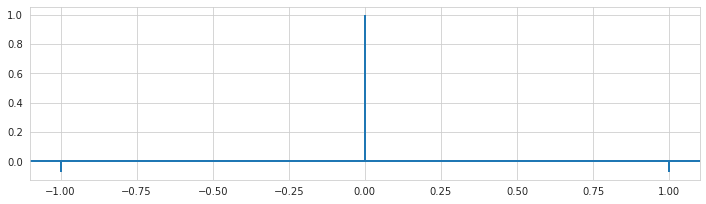

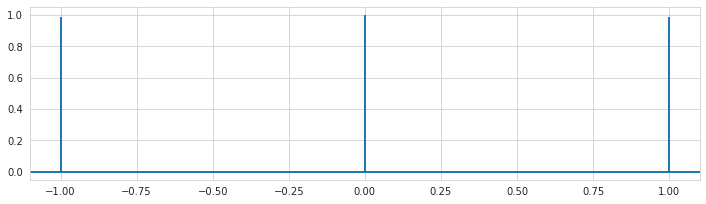

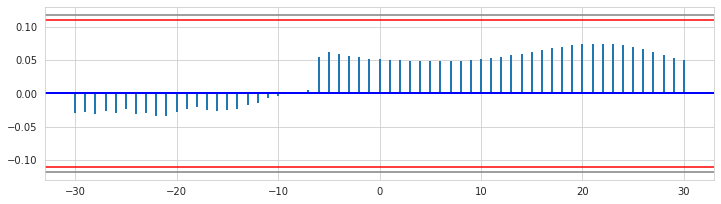


*** (2020) Aracaju
r0_DETRENDED


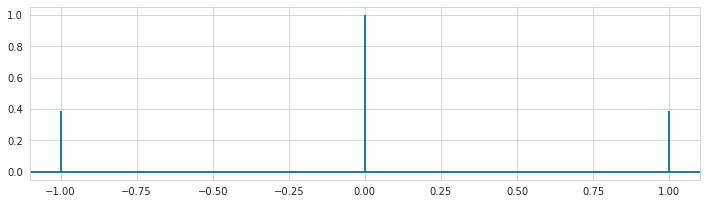

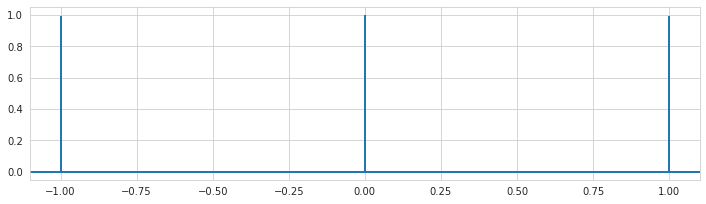

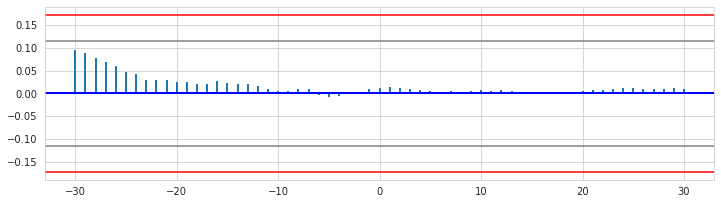


*** (2020) Belo Horizonte
r0_DETRENDED


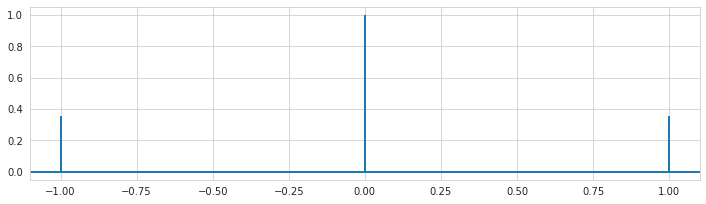

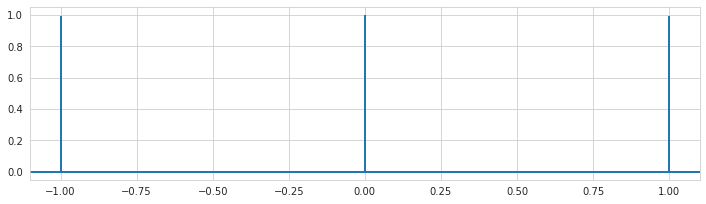

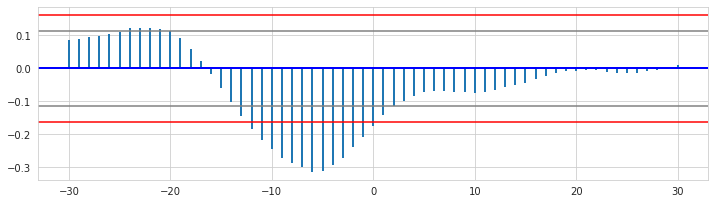


*** (2020) Belém
r0_DETRENDED


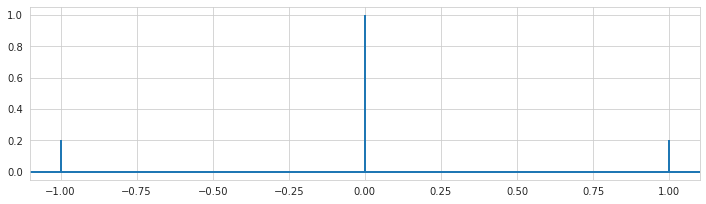

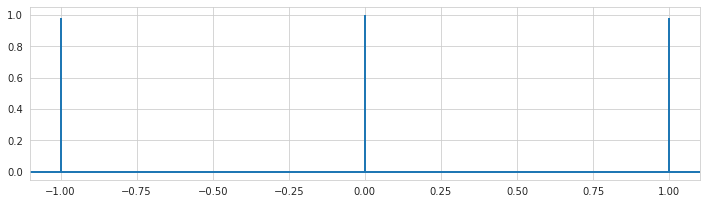

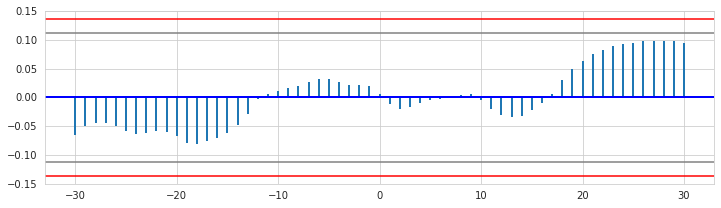


*** (2020) Brasília
r0_DETRENDED


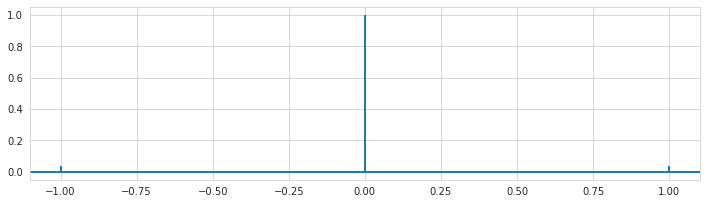

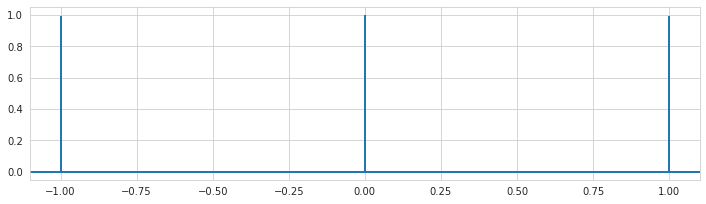

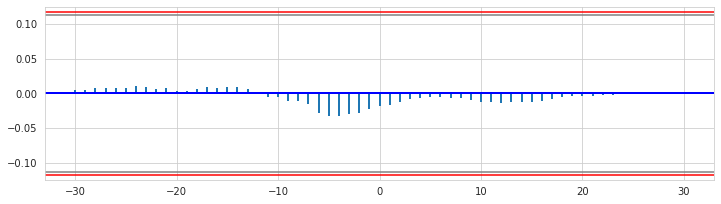


*** (2020) Campinas
r0_DETRENDED


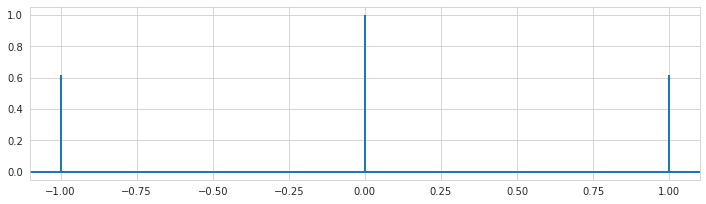

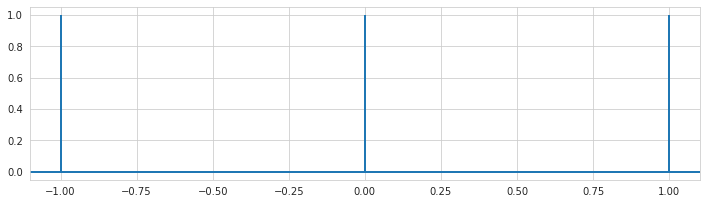

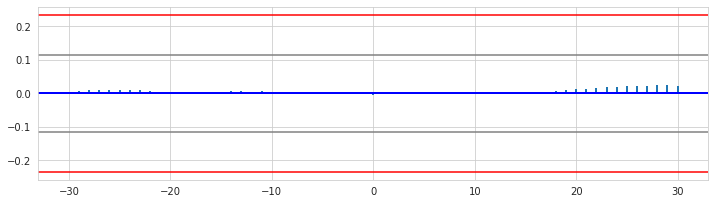


*** (2020) Campo Grande
r0_DETRENDED


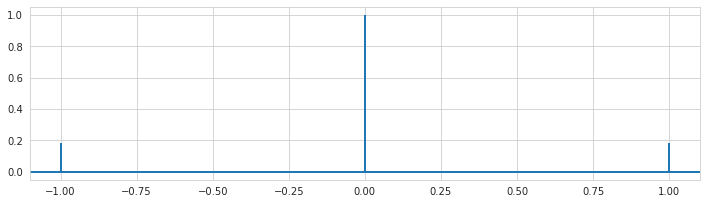

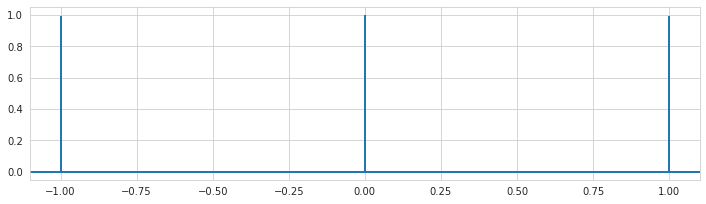

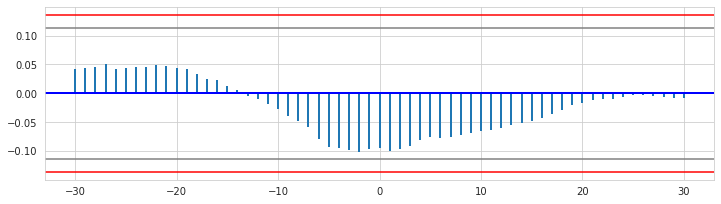


*** (2020) Contagem
r0_DETRENDED


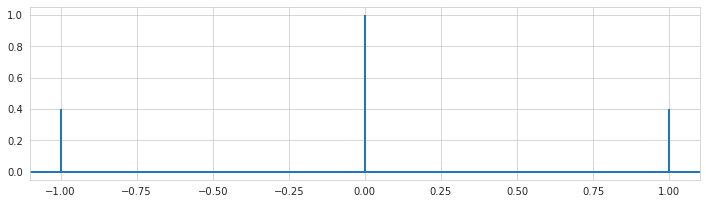

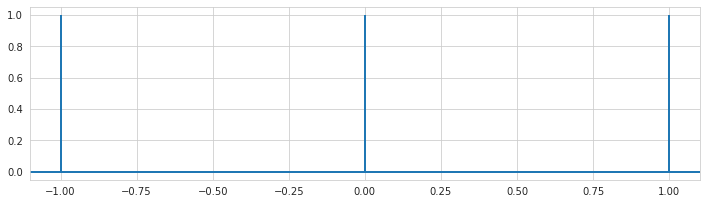

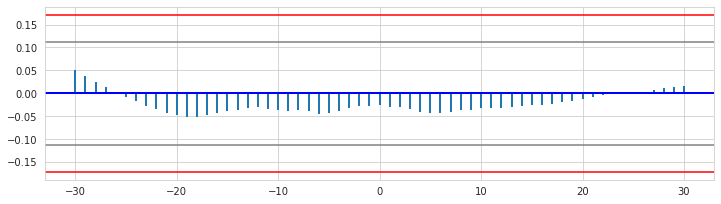


*** (2020) Cuiabá
r0_DETRENDED


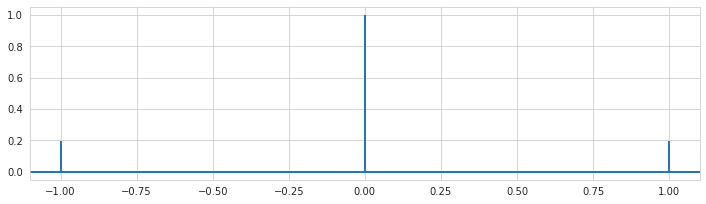

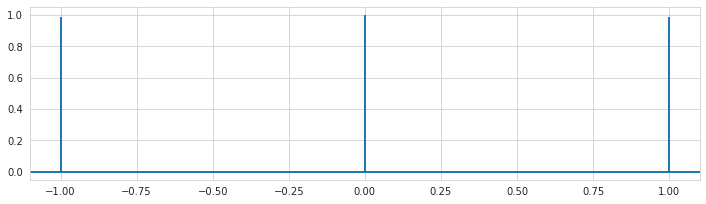

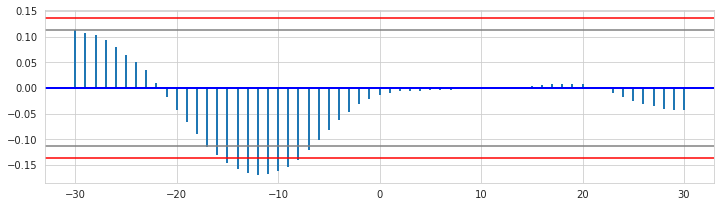


*** (2020) Curitiba
r0_DETRENDED


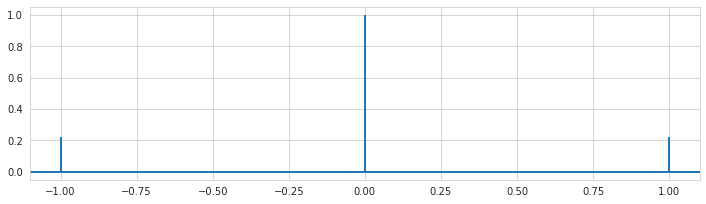

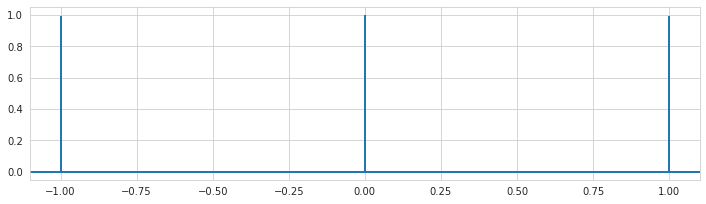

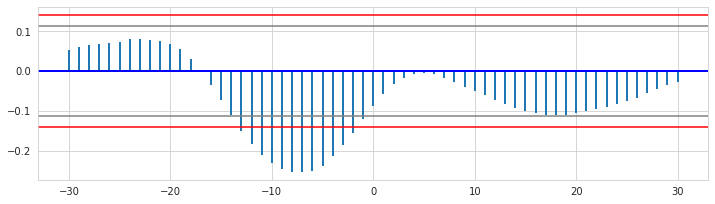


*** (2020) Duque de Caxias
r0_DETRENDED


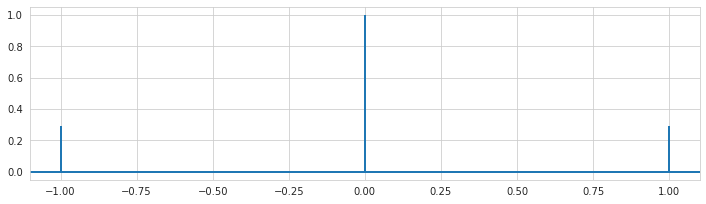

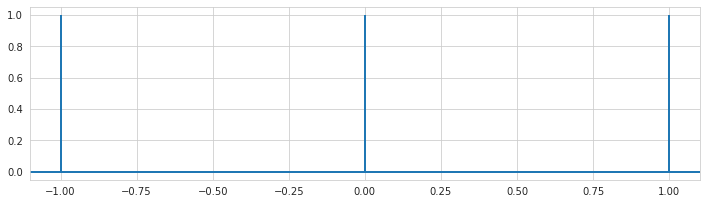

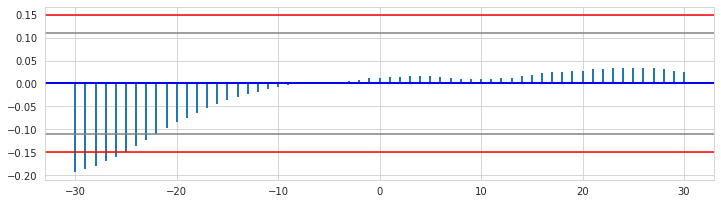


*** (2020) Feira de Santana
r0_DETRENDED


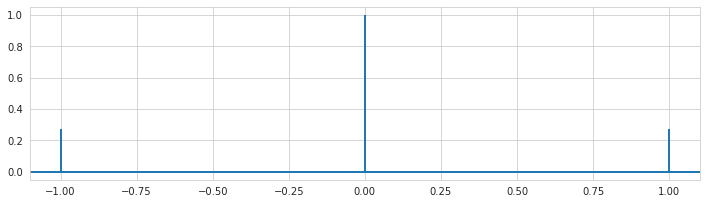

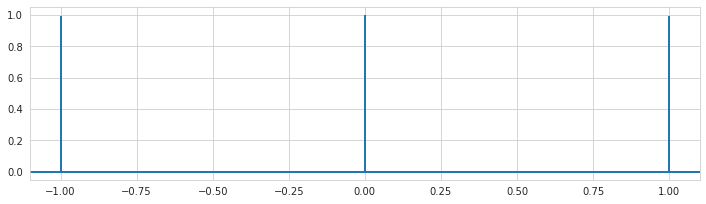

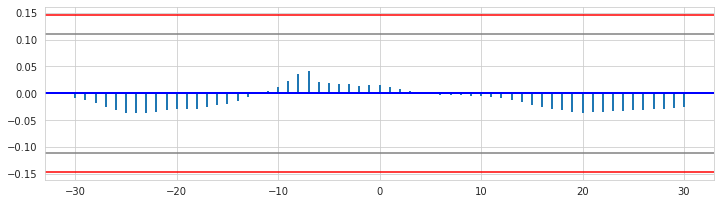


*** (2020) Florianópolis
r0_DETRENDED


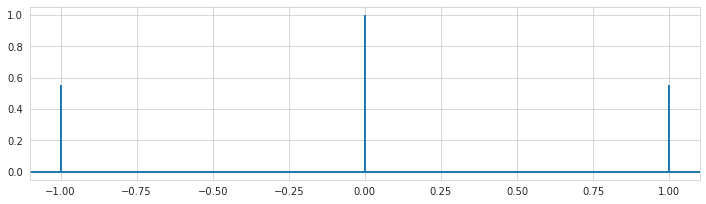

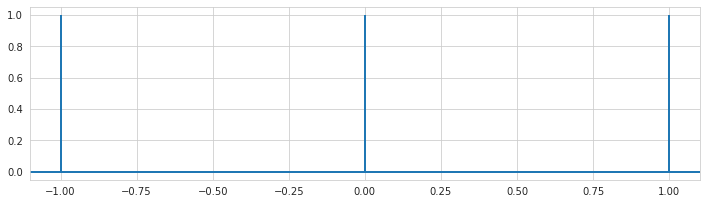

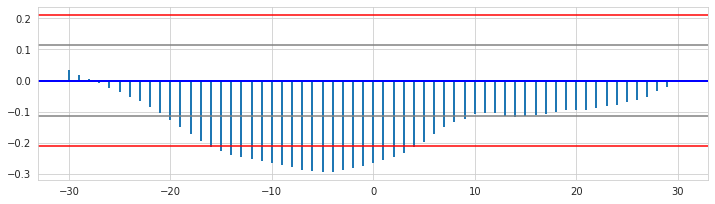


*** (2020) Fortaleza
r0_DETRENDED


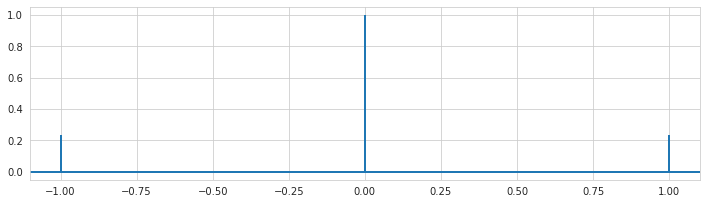

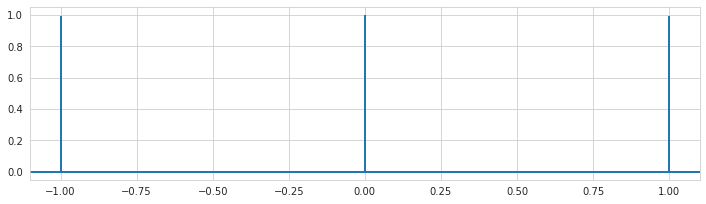

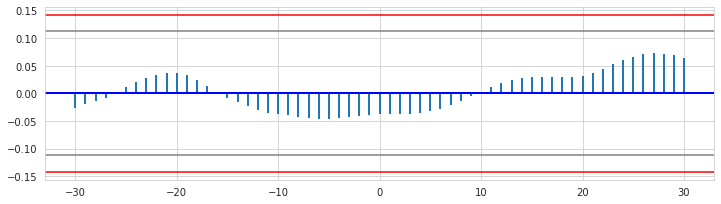


*** (2020) Goiânia
r0_DETRENDED


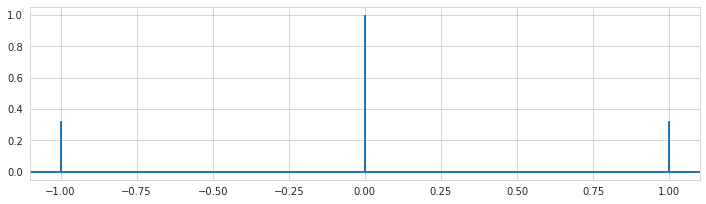

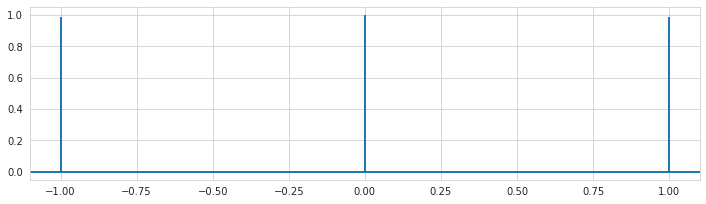

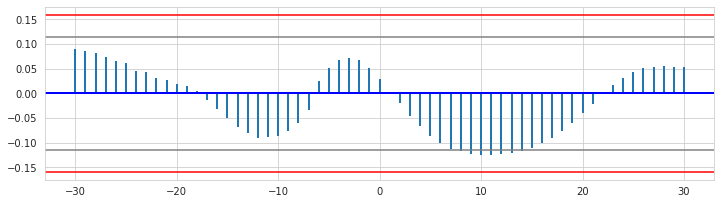


*** (2020) Guarulhos
r0_DETRENDED


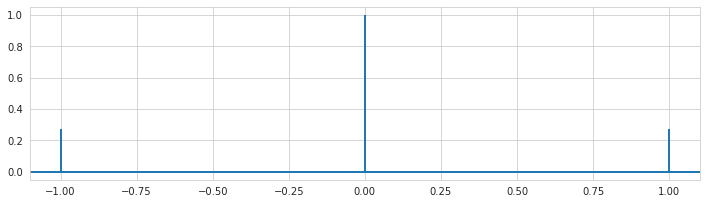

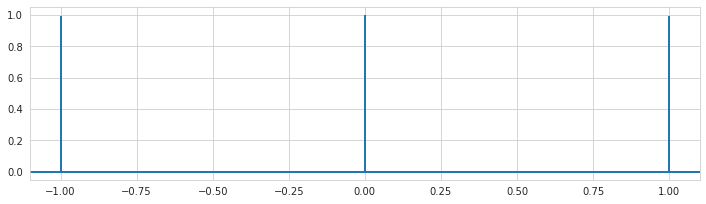

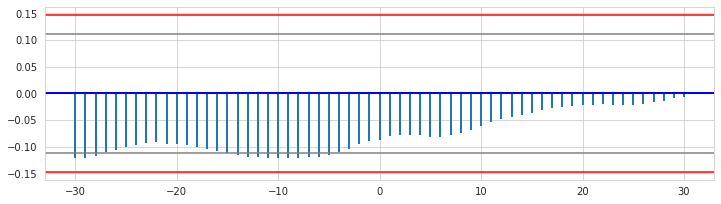


*** (2020) Jaboatão dos Guararapes
r0_DETRENDED


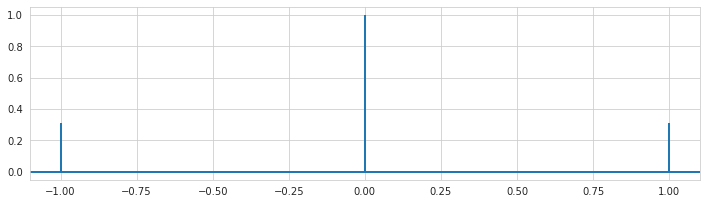

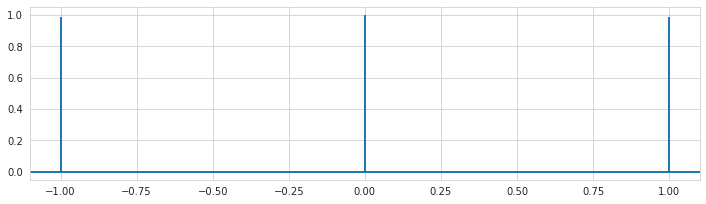

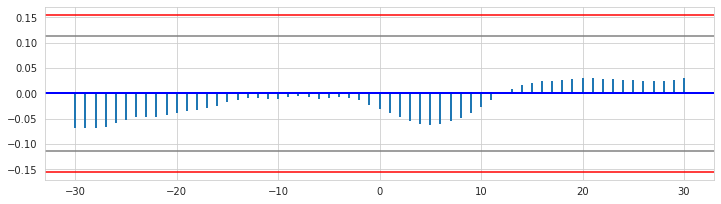


*** (2020) Joinville
r0_DETRENDED


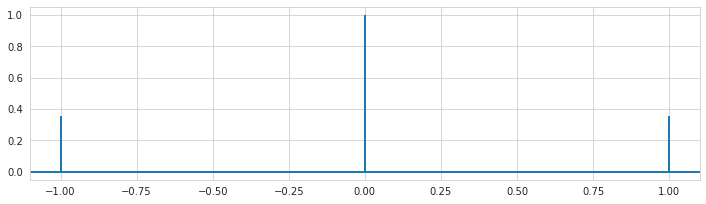

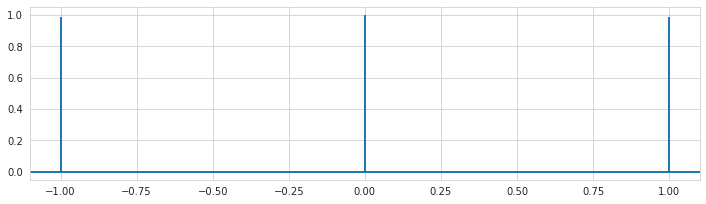

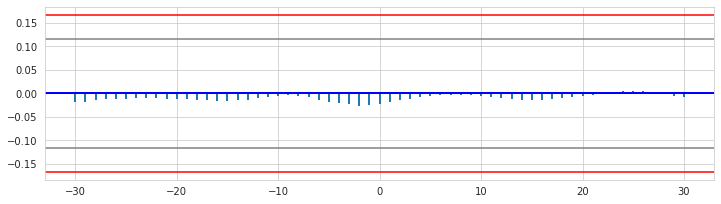


*** (2020) João Pessoa
r0_DETRENDED


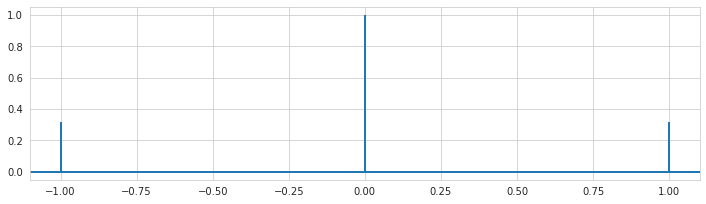

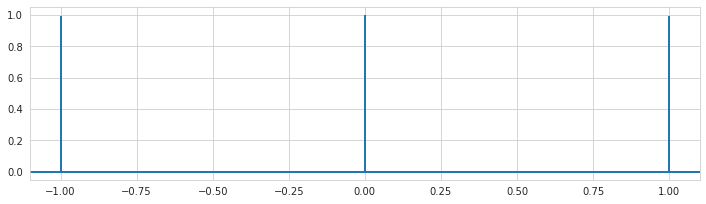

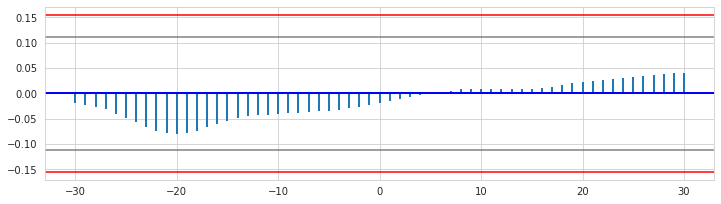


*** (2020) Juiz de Fora
r0_DETRENDED


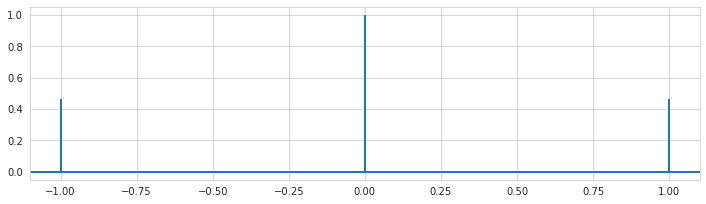

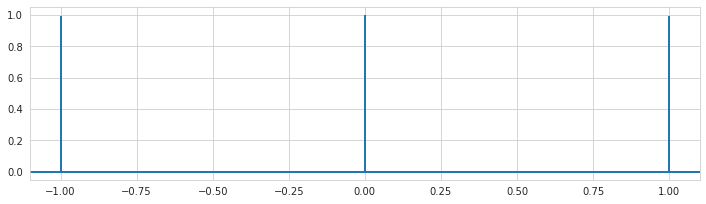

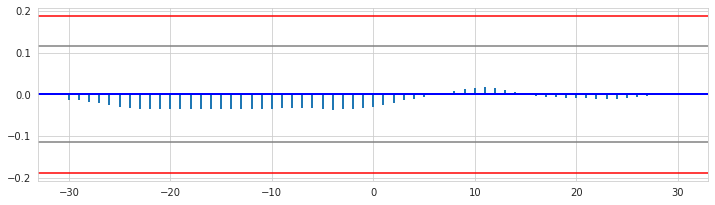


*** (2020) Londrina
r0_DETRENDED


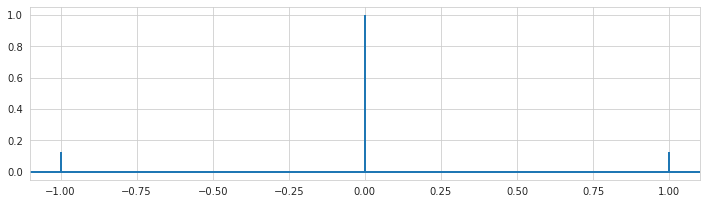

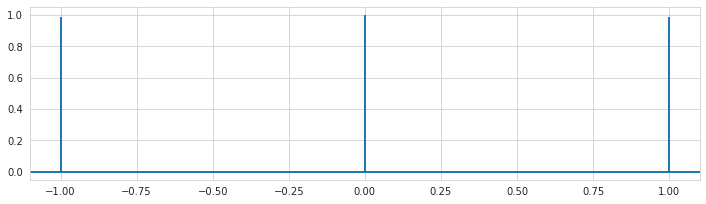

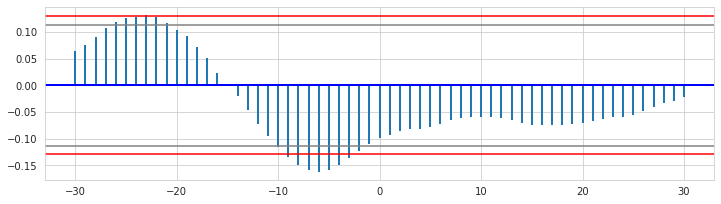


*** (2020) Maceió
r0_DETRENDED


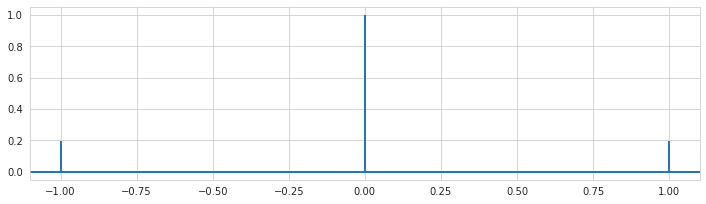

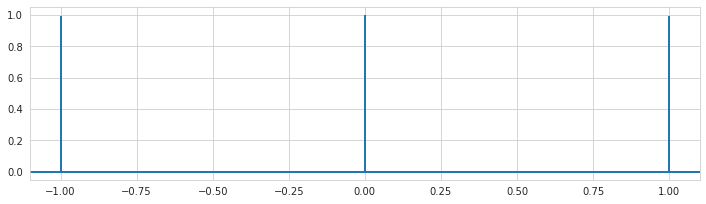

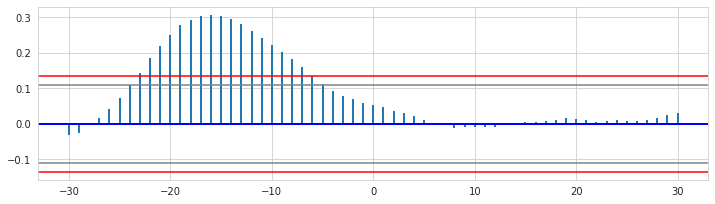


*** (2020) Manaus
r0_DETRENDED


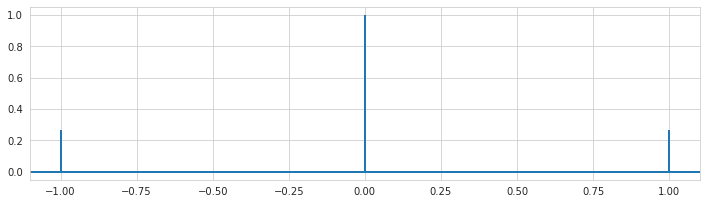

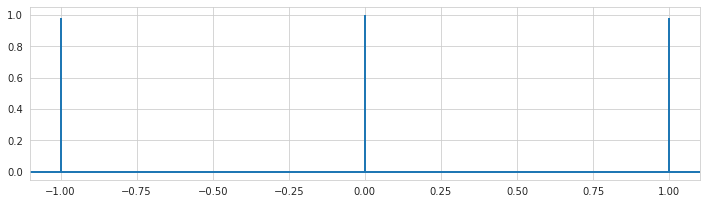

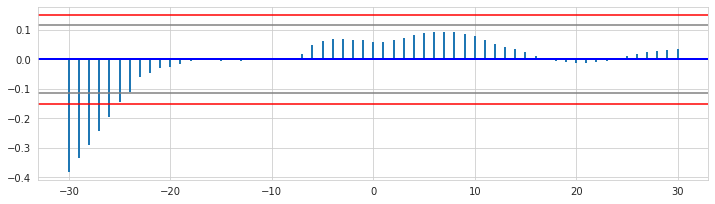


*** (2020) Natal
r0_DETRENDED


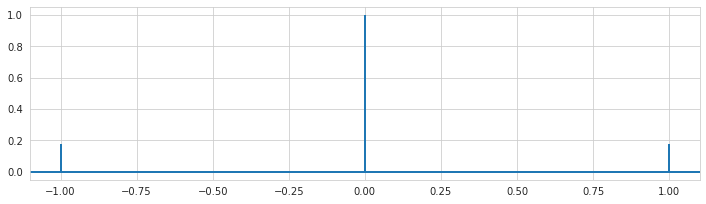

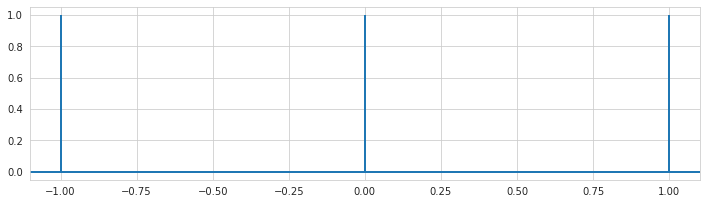

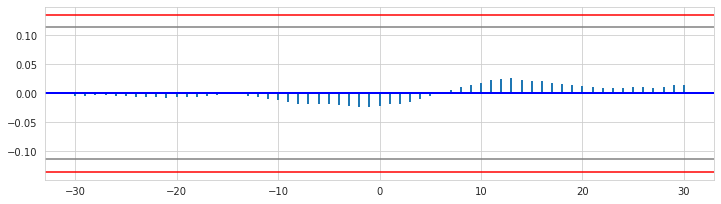


*** (2020) Nova Iguaçu
r0_DETRENDED


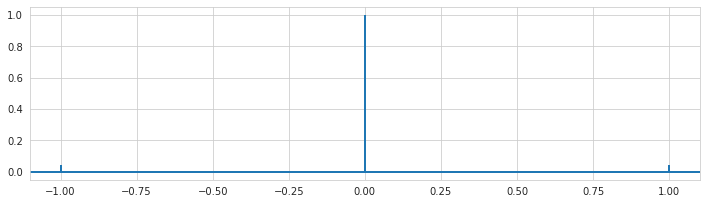

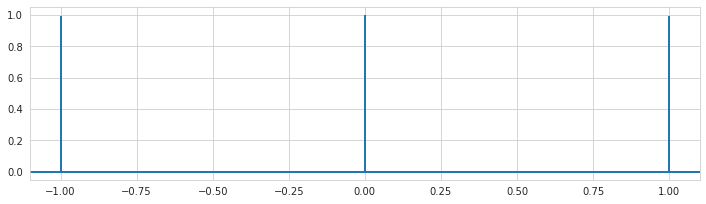

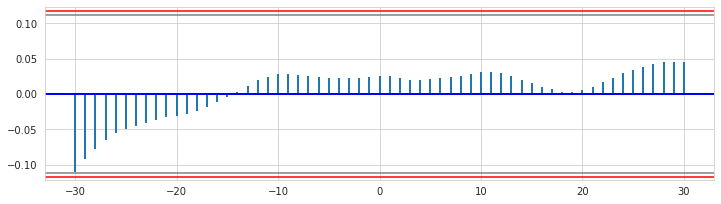


*** (2020) Osasco
r0_DETRENDED


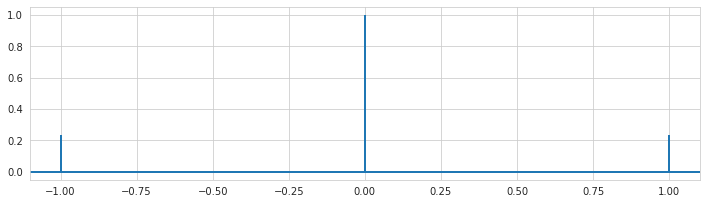

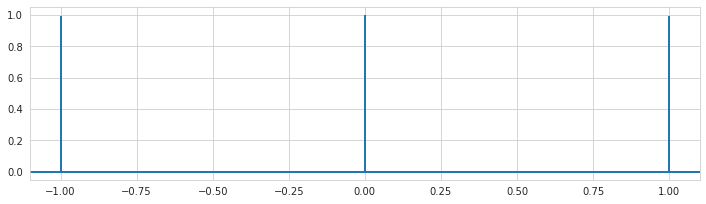

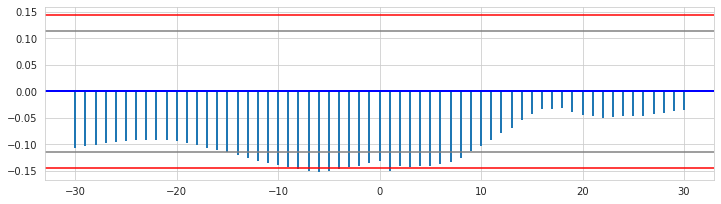


*** (2020) Porto Alegre
r0_DETRENDED


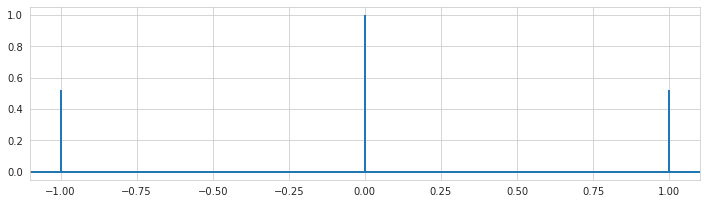

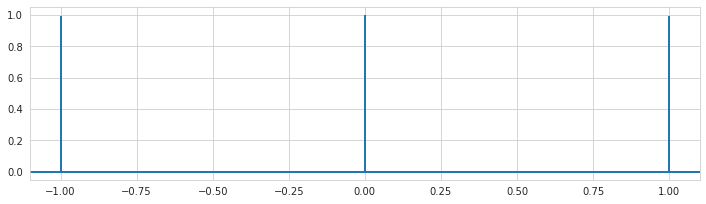

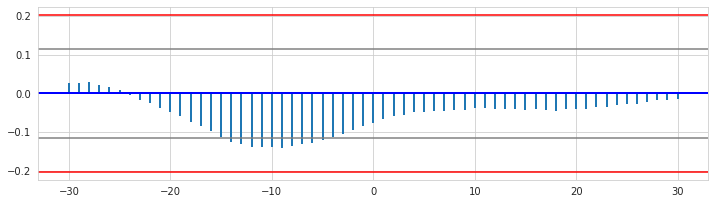


*** (2020) Recife
r0_DETRENDED


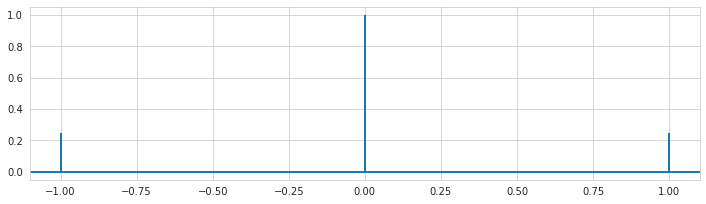

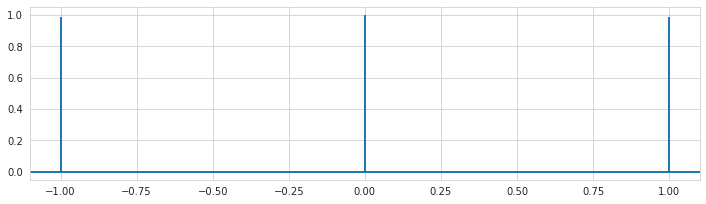

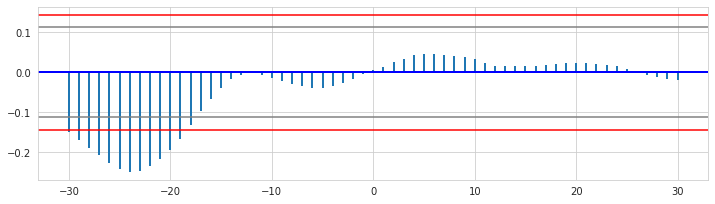


*** (2020) Ribeirão Preto
r0_DETRENDED


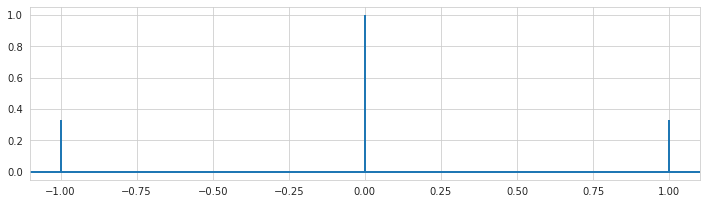

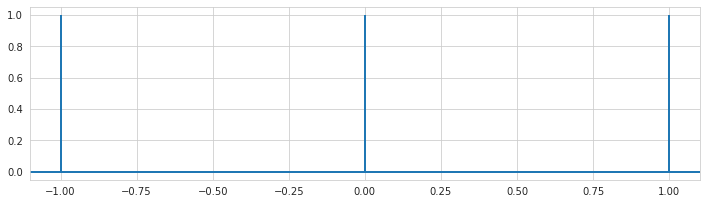

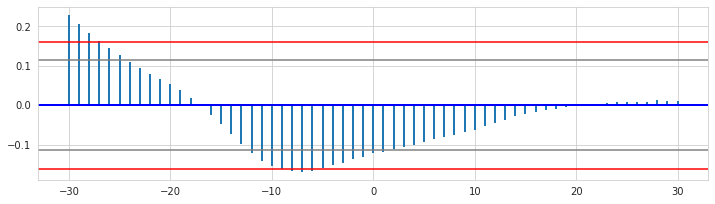


*** (2020) Rio de Janeiro
r0_DETRENDED


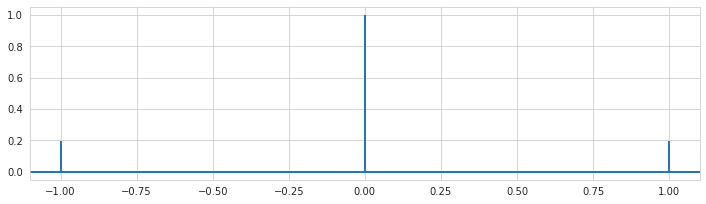

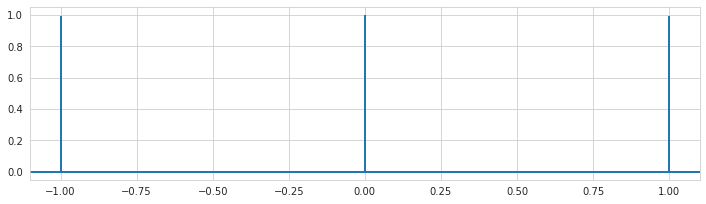

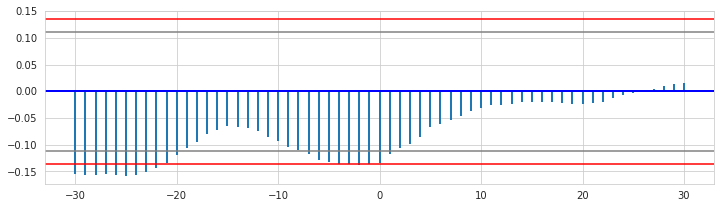


*** (2020) Salvador
r0_DETRENDED


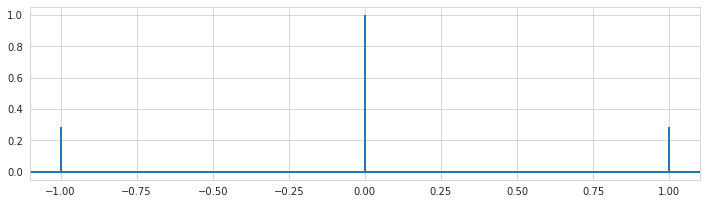

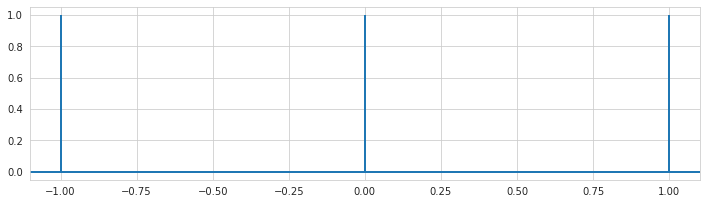

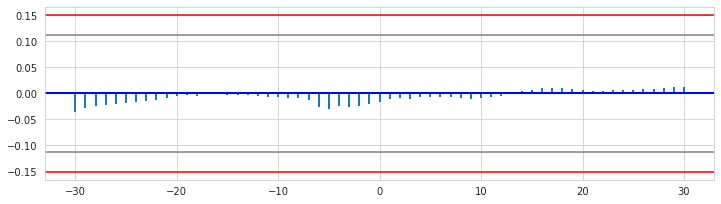


*** (2020) Santo André
r0_DETRENDED


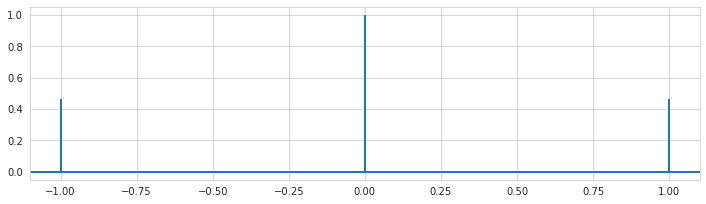

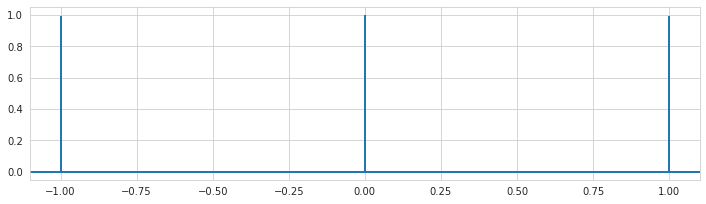

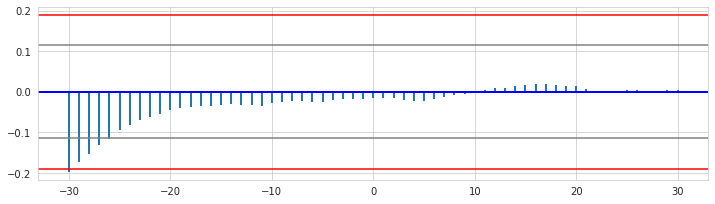


*** (2020) Serra
r0_DETRENDED


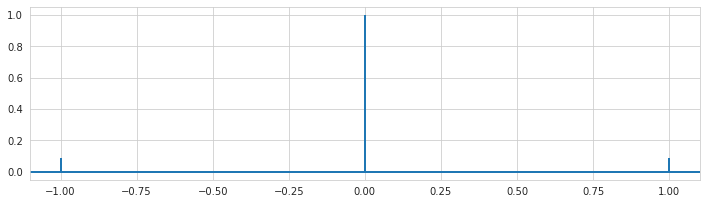

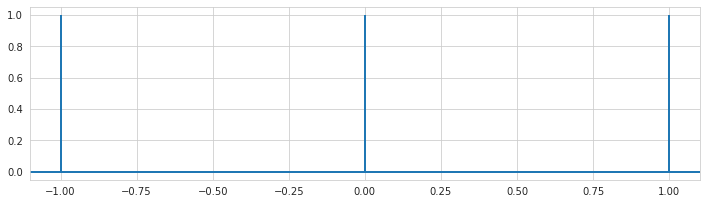

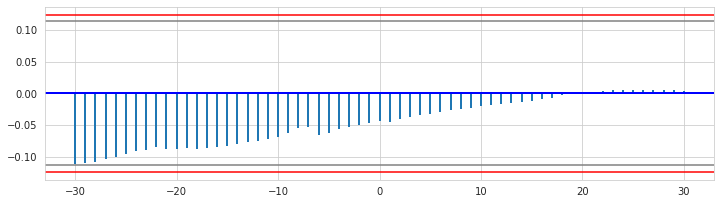


*** (2020) Sorocaba
r0_DETRENDED


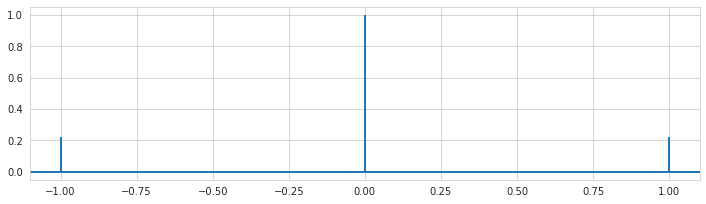

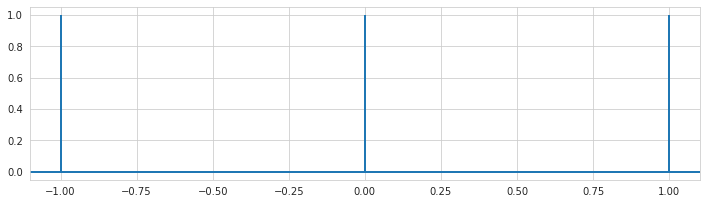

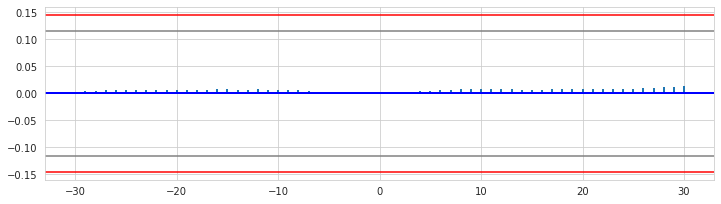


*** (2020) São Bernardo do Campo
r0_DETRENDED


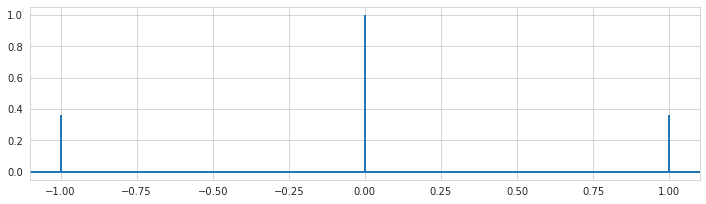

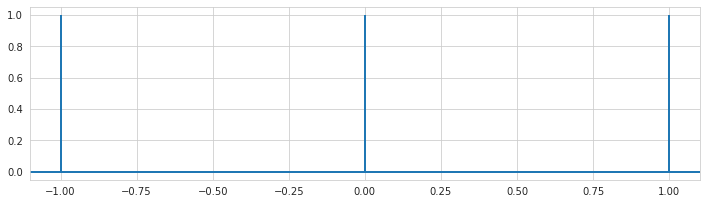

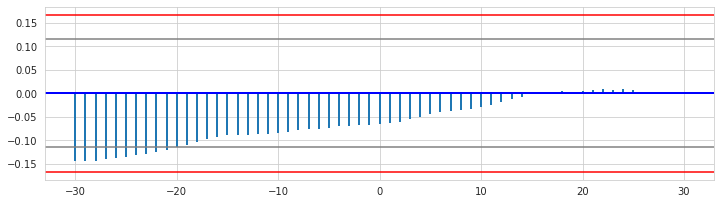


*** (2020) São Gonçalo
r0_DETRENDED


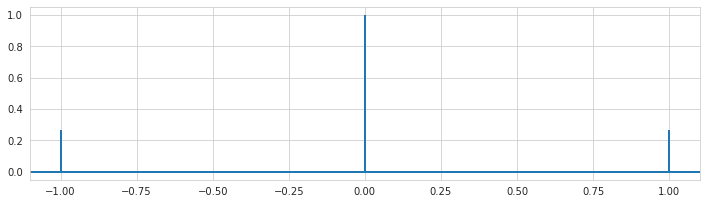

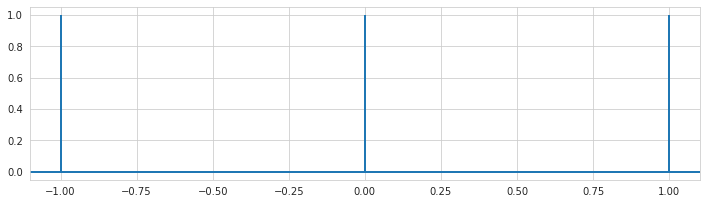

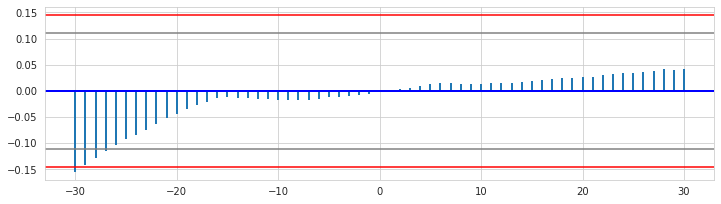


*** (2020) São José dos Campos
r0_DETRENDED


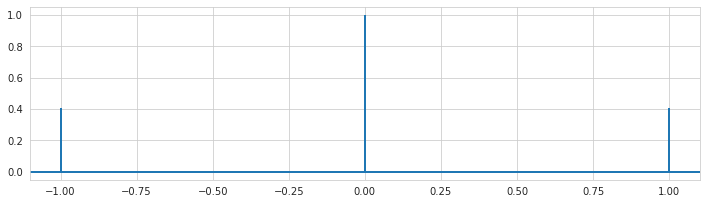

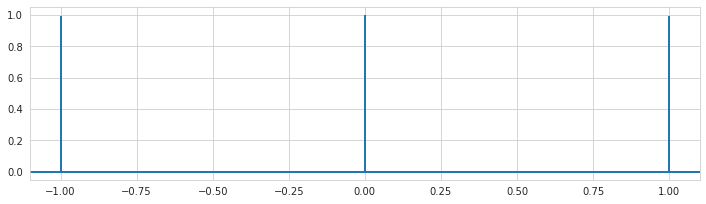

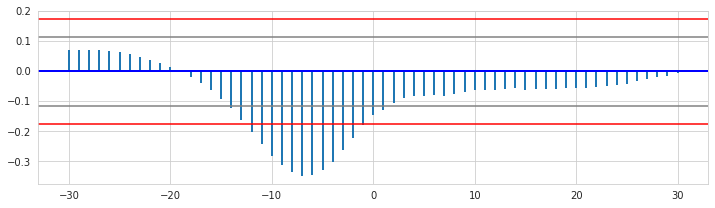


*** (2020) São Luís
r0_DETRENDED


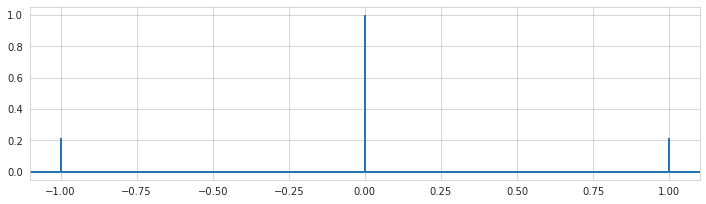

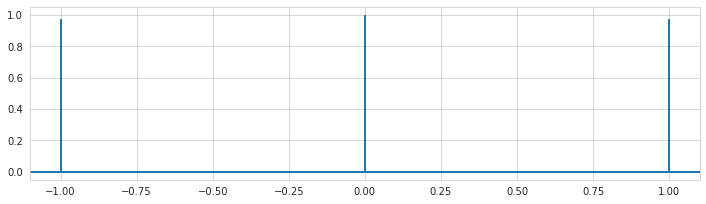

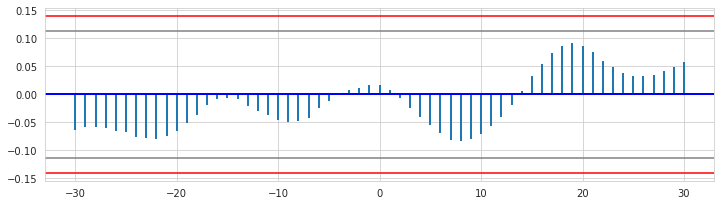


*** (2020) São Paulo
r0_DETRENDED


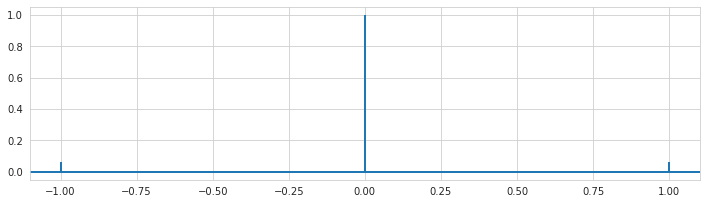

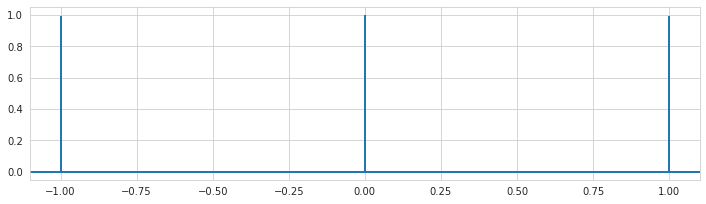

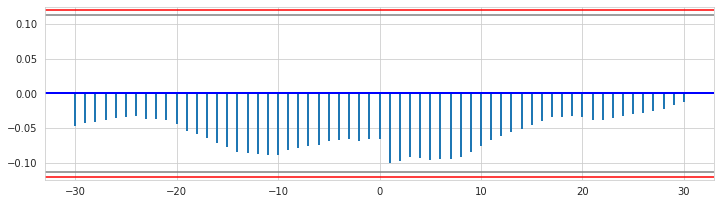


*** (2020) Teresina
r0_DETRENDED


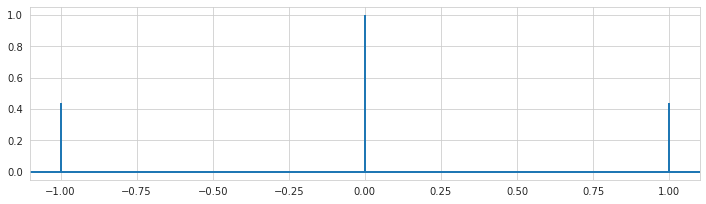

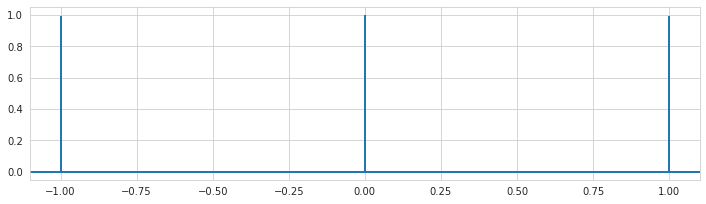

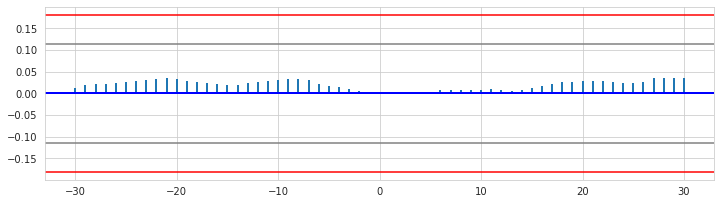


*** (2020) Uberlândia
r0_DETRENDED


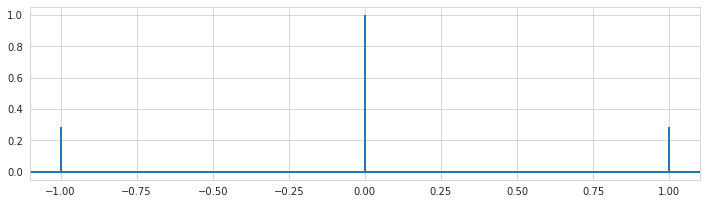

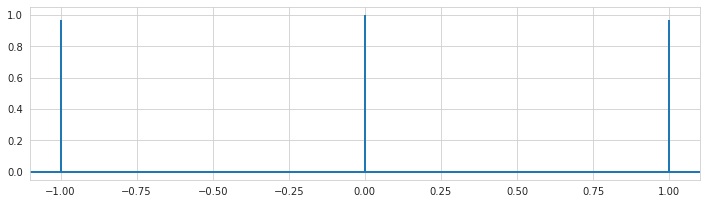

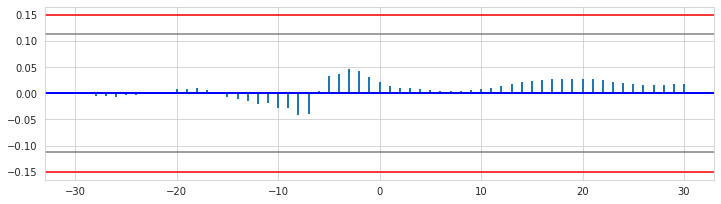


*** (2021) Aparecida de Goiânia
r0_DETRENDED


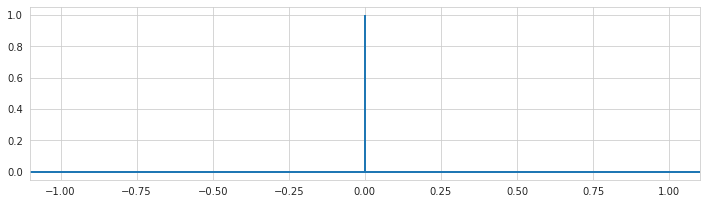

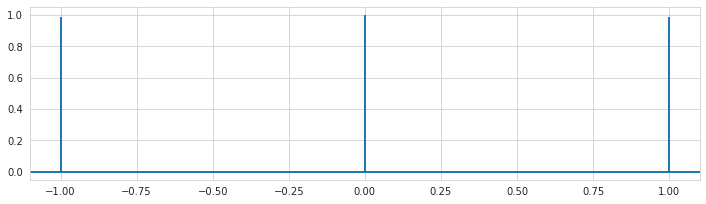

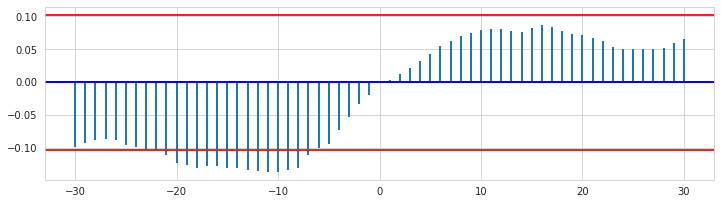


*** (2021) Aracaju
r0_DETRENDED


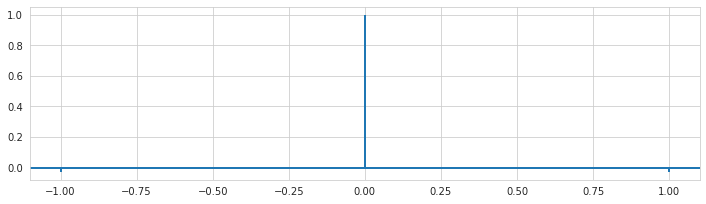

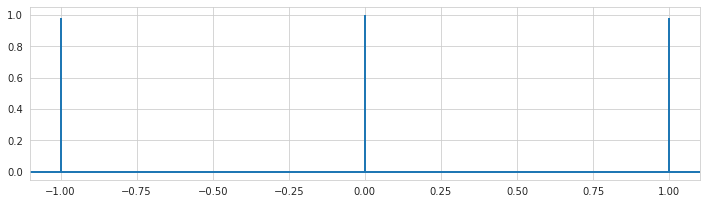

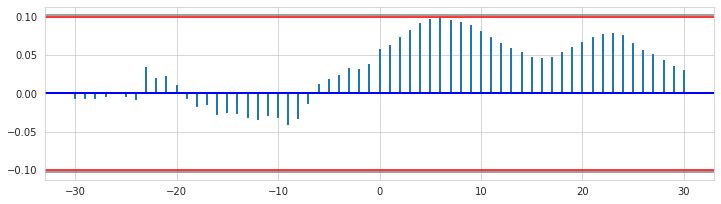


*** (2021) Belo Horizonte
r0_DETRENDED


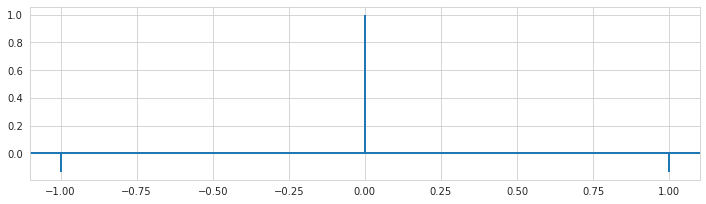

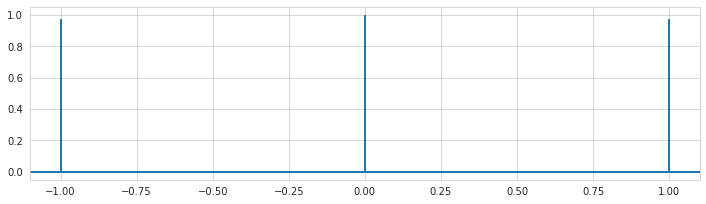

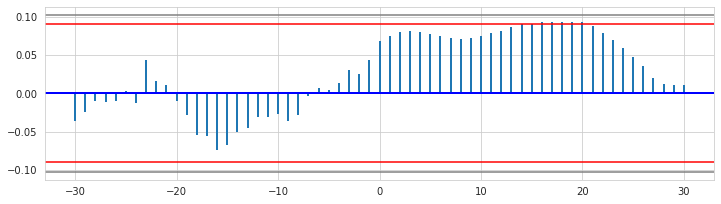


*** (2021) Belém
r0_DETRENDED


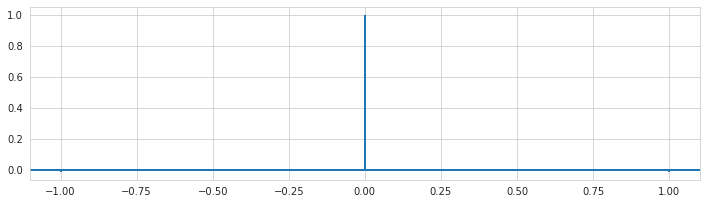

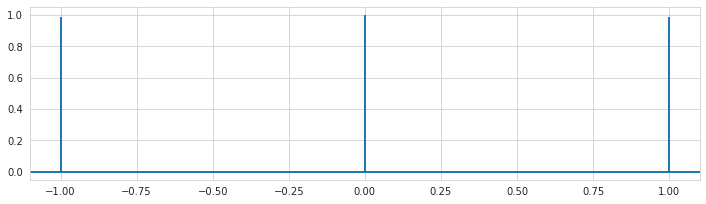

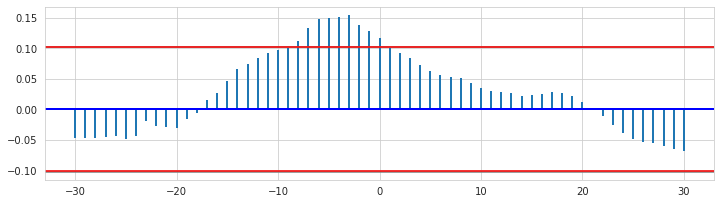


*** (2021) Brasília
r0_DETRENDED


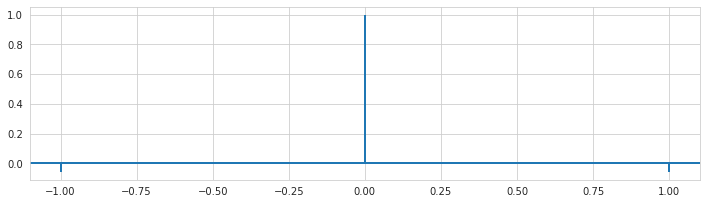

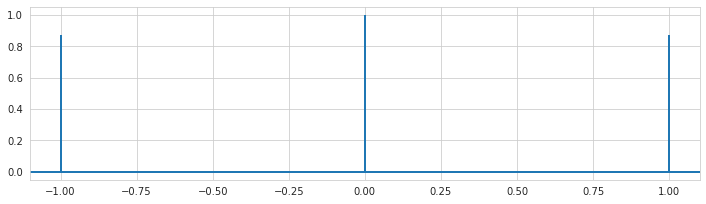

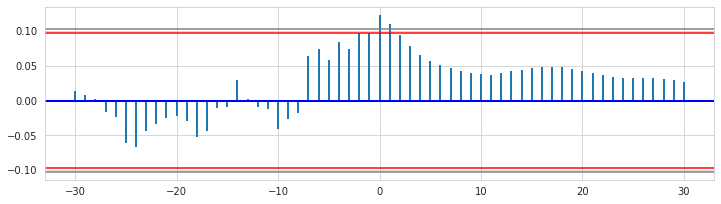


*** (2021) Campinas
r0_DETRENDED


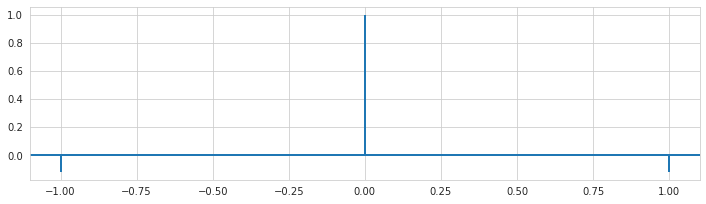

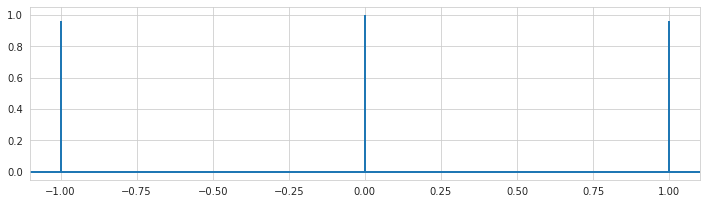

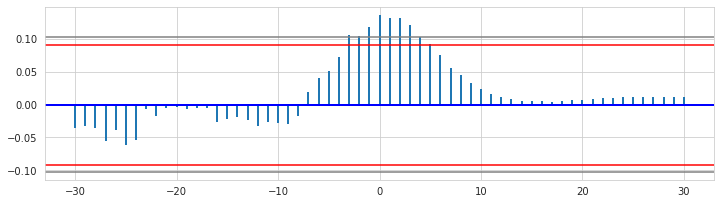


*** (2021) Campo Grande
r0_DETRENDED


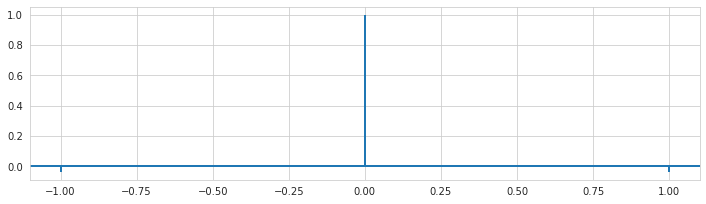

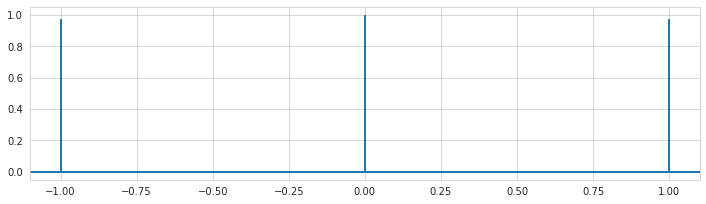

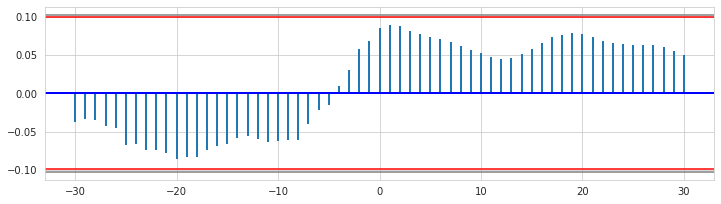


*** (2021) Contagem
r0_DETRENDED


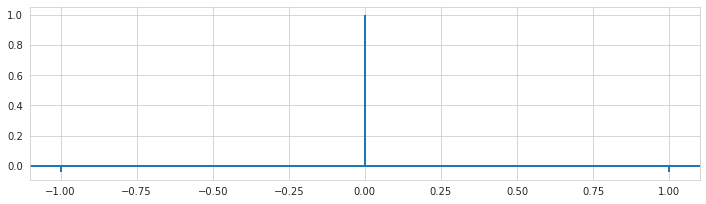

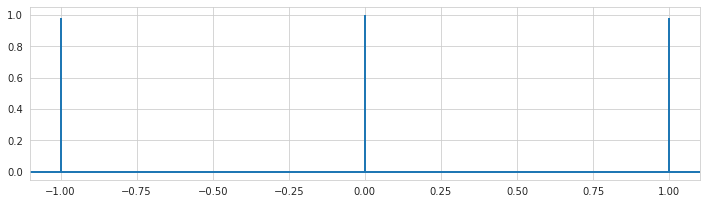

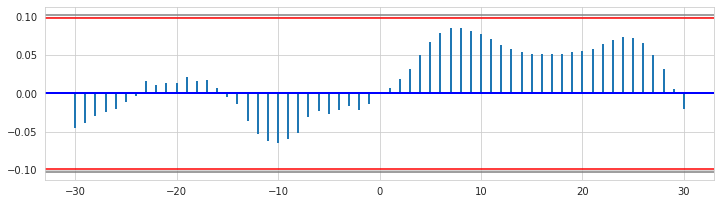


*** (2021) Cuiabá
r0_DETRENDED


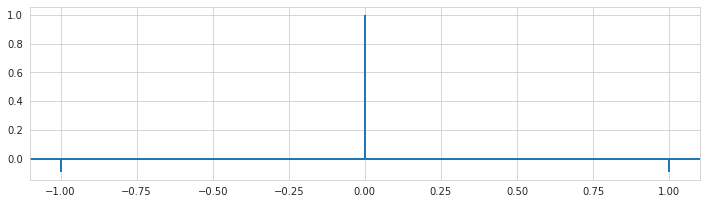

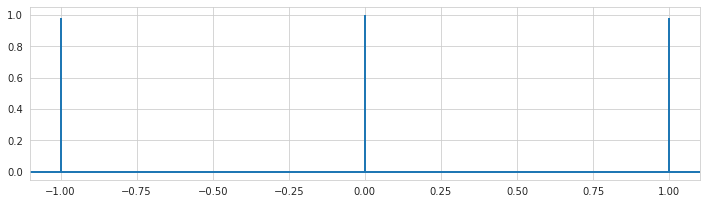

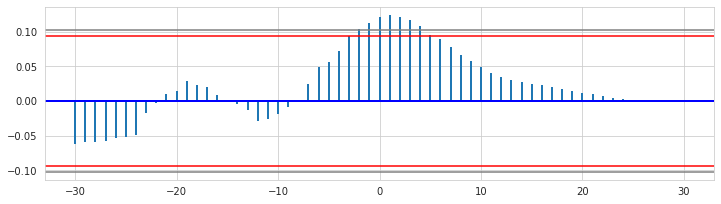


*** (2021) Curitiba
r0_DETRENDED


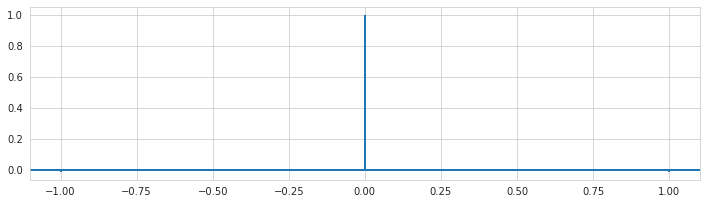

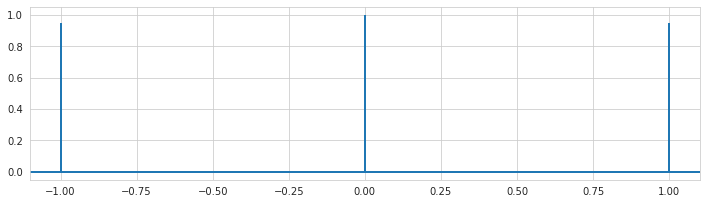

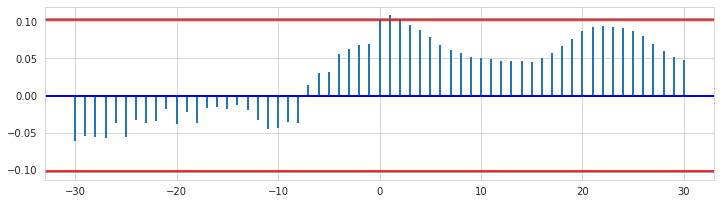


*** (2021) Duque de Caxias
r0_DETRENDED


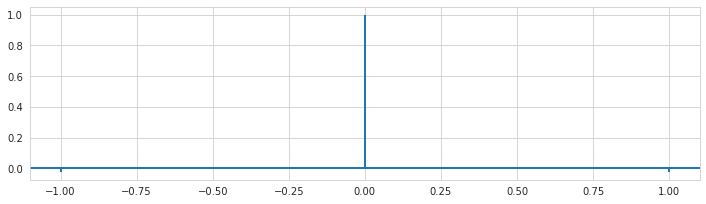

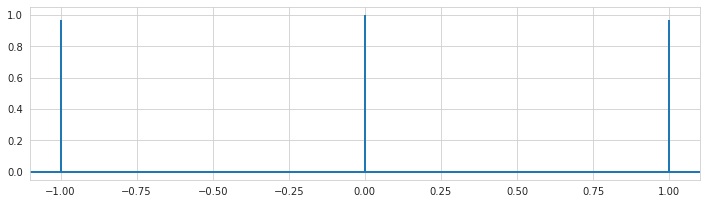

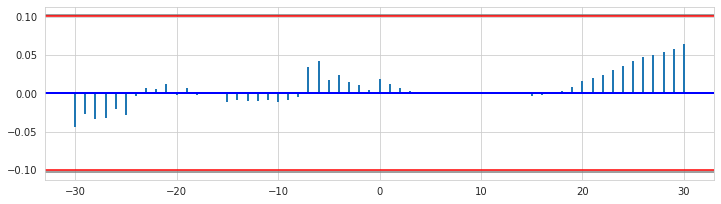


*** (2021) Feira de Santana
r0_DETRENDED


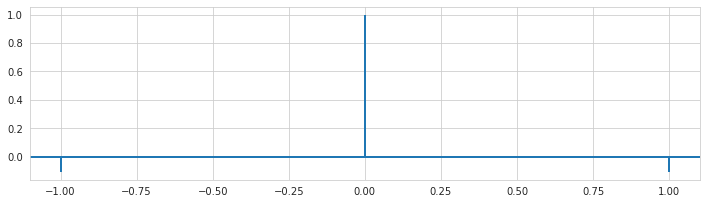

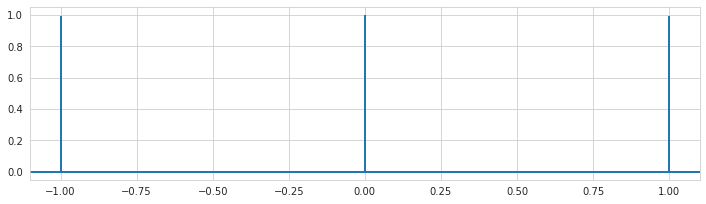

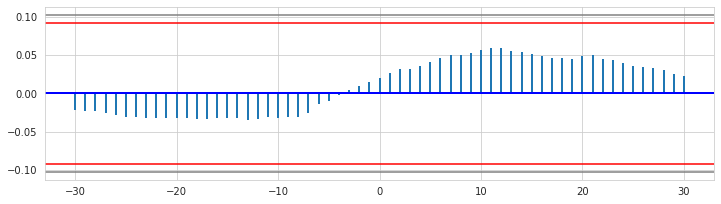


*** (2021) Florianópolis
r0_DETRENDED


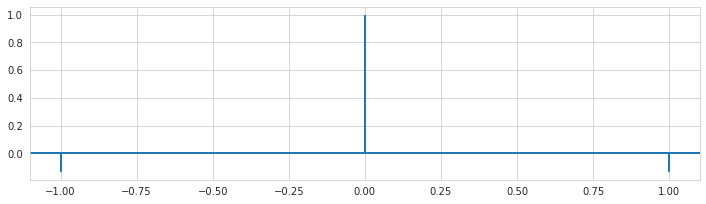

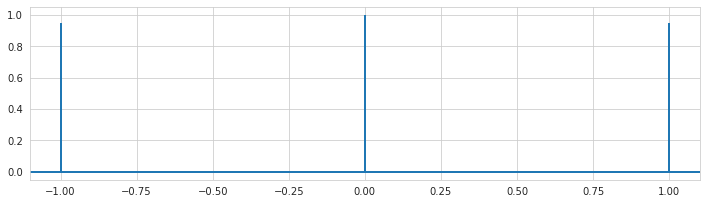

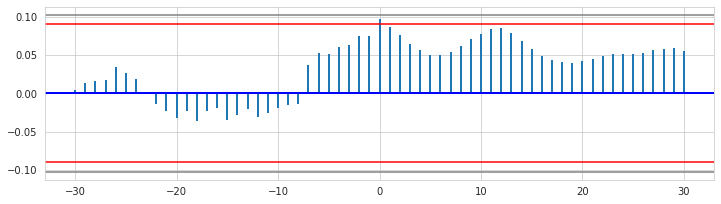


*** (2021) Fortaleza
r0_DETRENDED


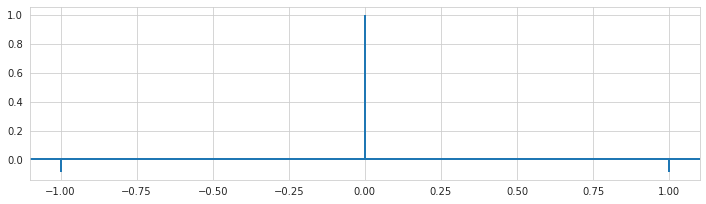

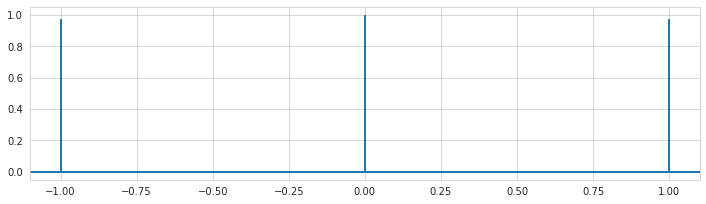

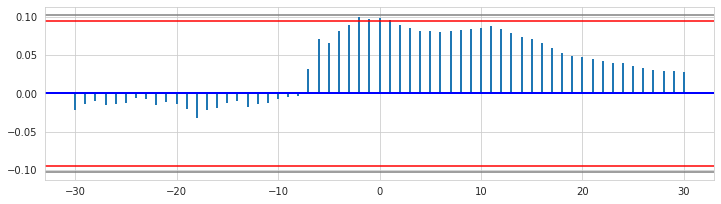


*** (2021) Goiânia
r0_DETRENDED


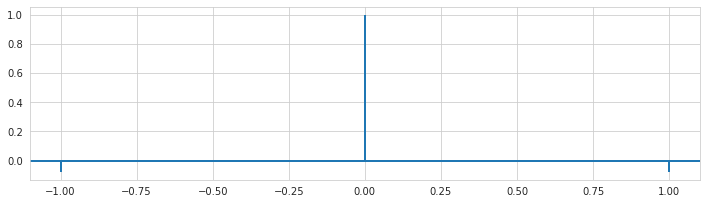

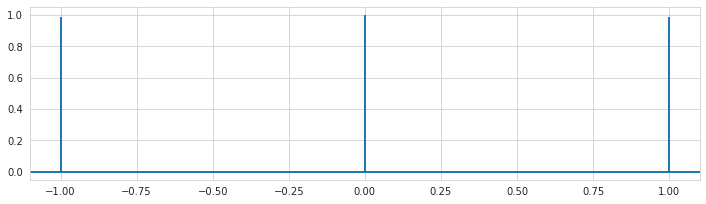

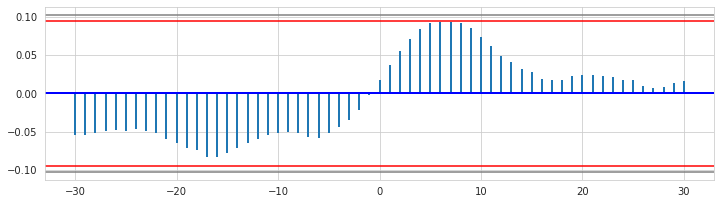


*** (2021) Guarulhos
r0_DETRENDED


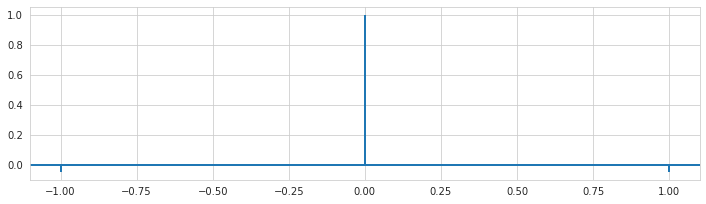

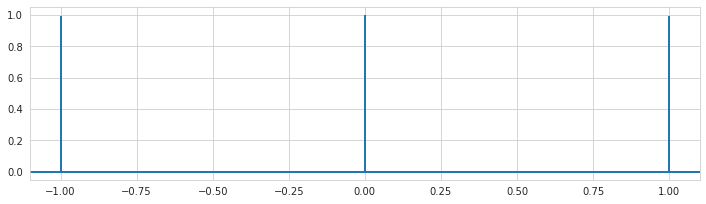

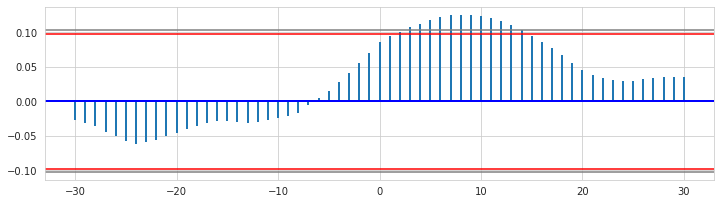


*** (2021) Jaboatão dos Guararapes
r0_DETRENDED


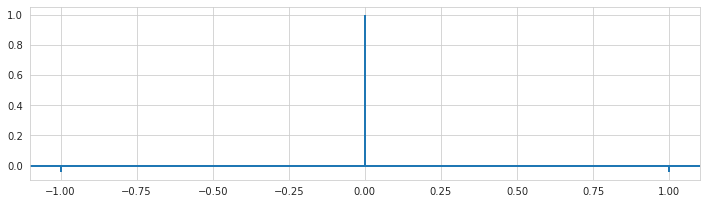

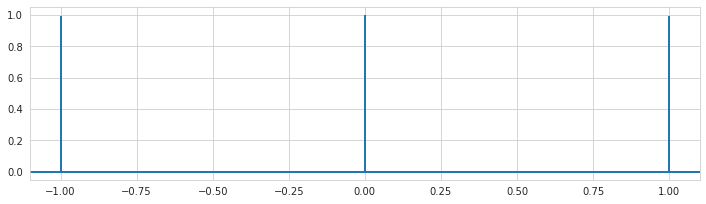

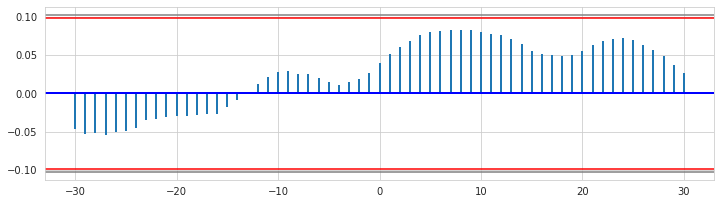


*** (2021) Joinville
r0_DETRENDED


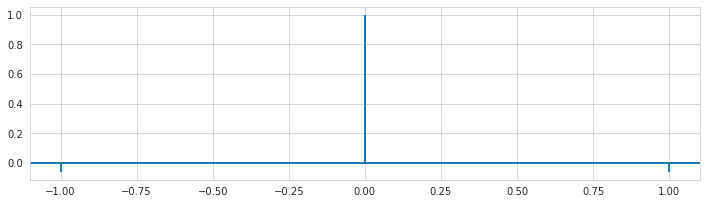

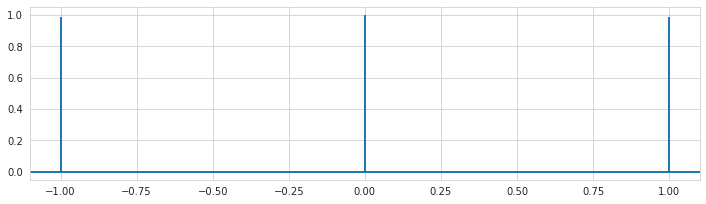

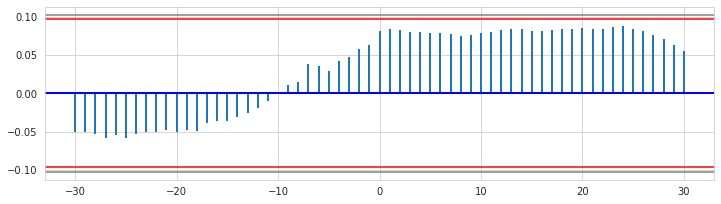


*** (2021) João Pessoa
r0_DETRENDED


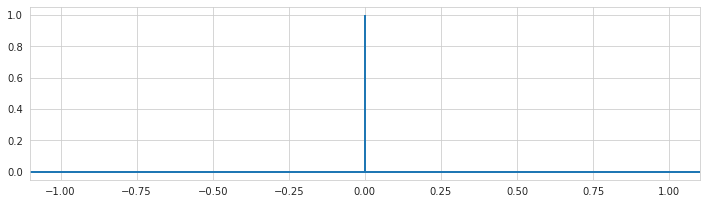

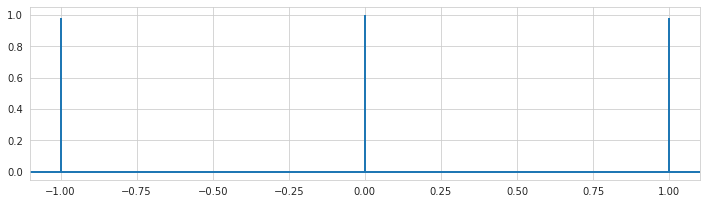

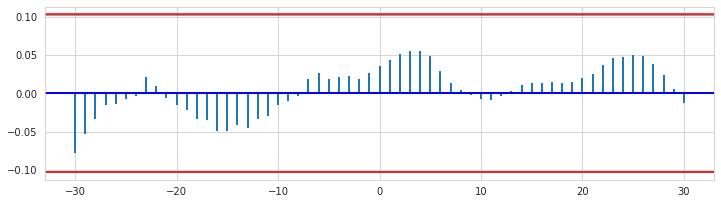


*** (2021) Juiz de Fora
r0_DETRENDED


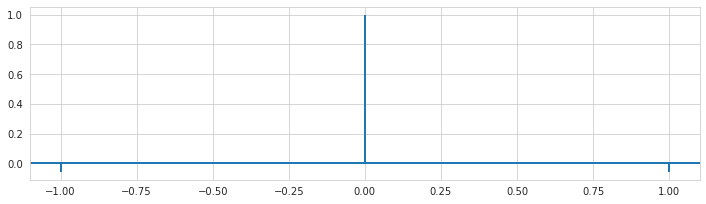

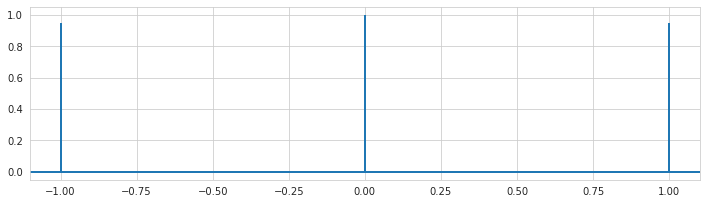

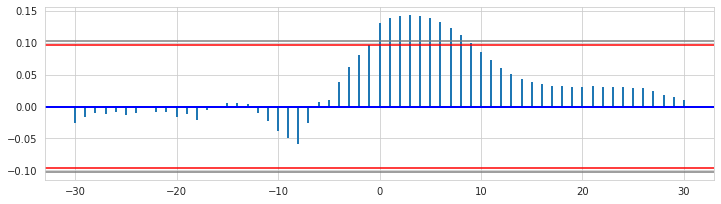


*** (2021) Londrina
r0_DETRENDED


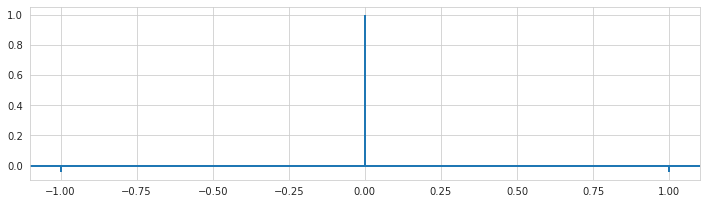

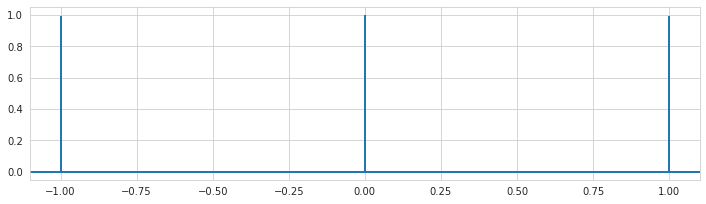

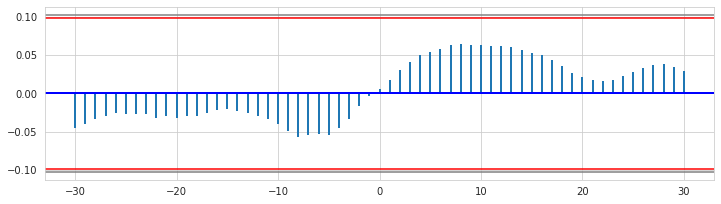


*** (2021) Maceió
r0_DETRENDED


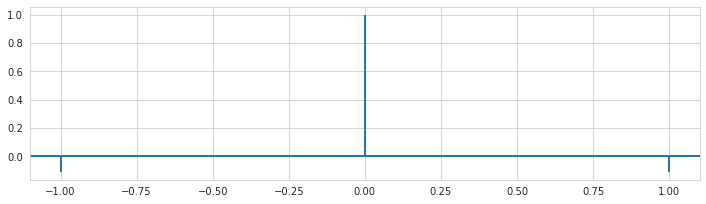

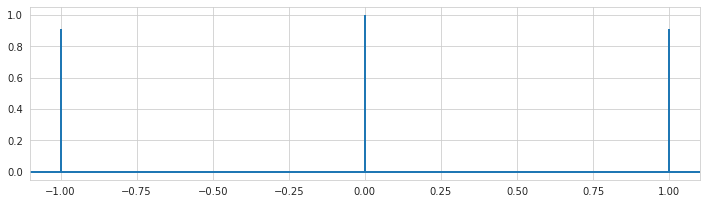

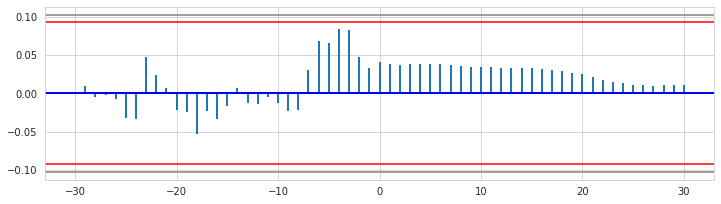


*** (2021) Manaus
r0_DETRENDED


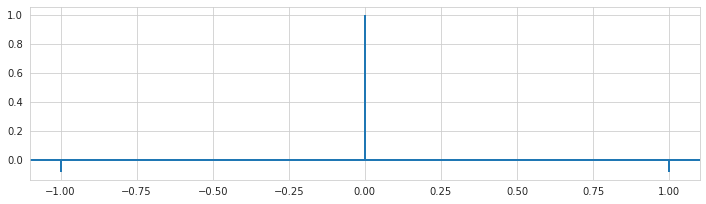

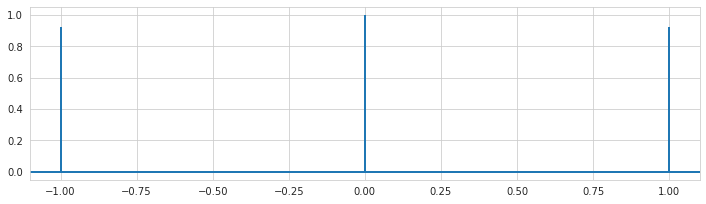

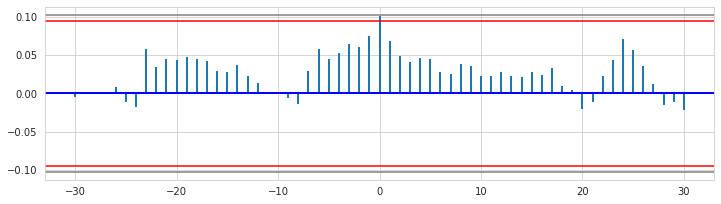


*** (2021) Natal
r0_DETRENDED


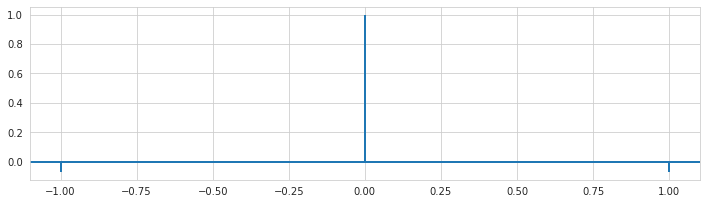

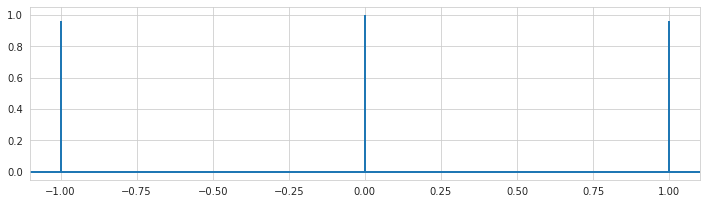

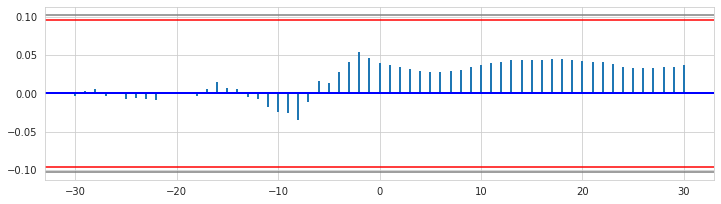


*** (2021) Nova Iguaçu
r0_DETRENDED


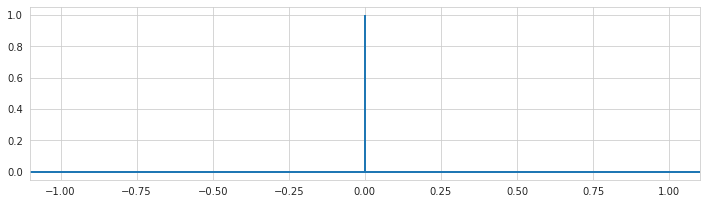

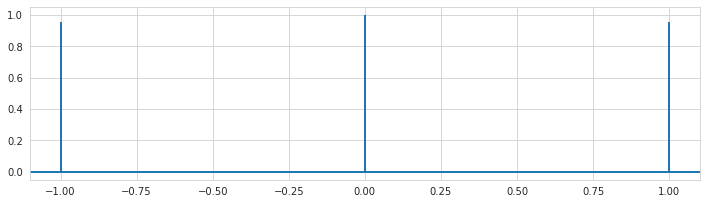

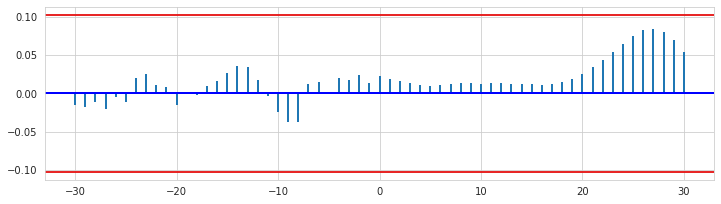


*** (2021) Osasco
r0_DETRENDED


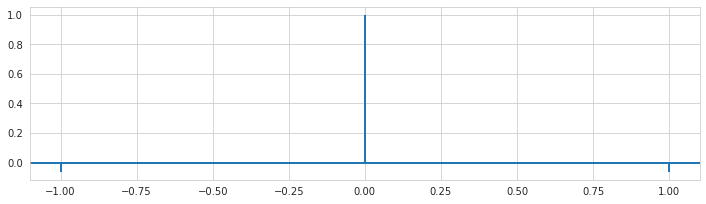

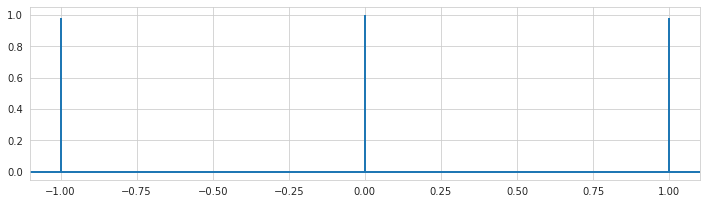

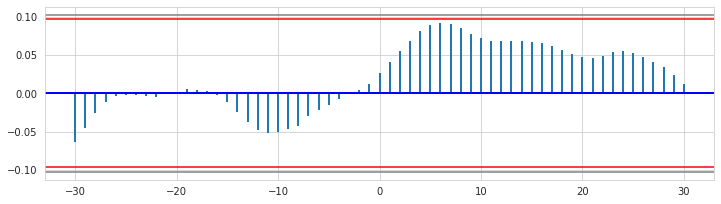


*** (2021) Porto Alegre
r0_DETRENDED


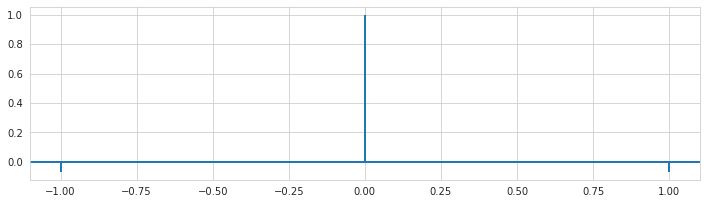

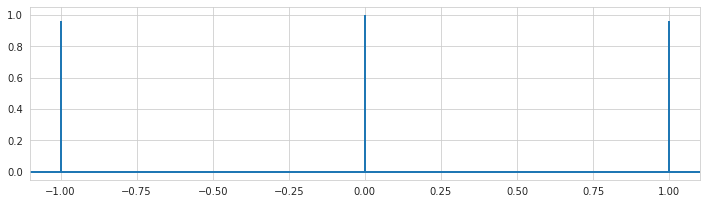

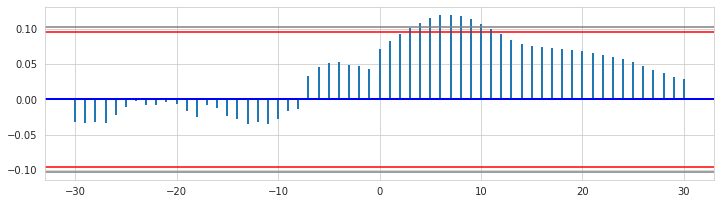


*** (2021) Recife
r0_DETRENDED


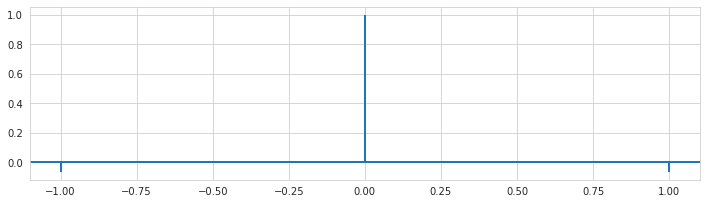

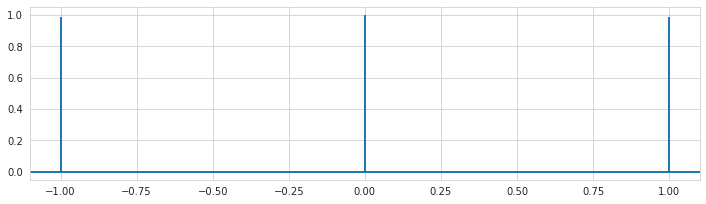

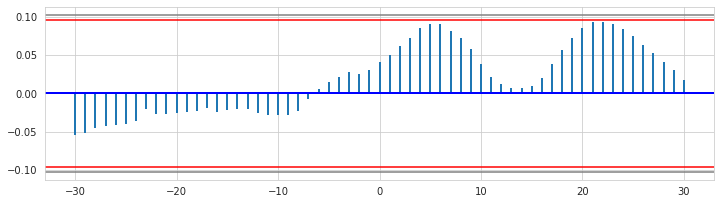


*** (2021) Ribeirão Preto
r0_DETRENDED


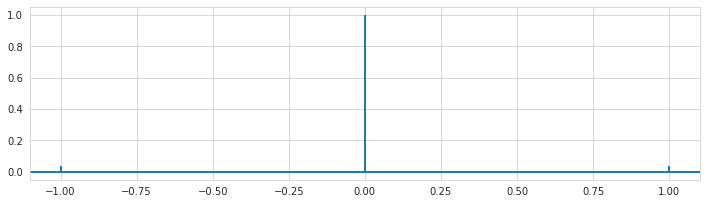

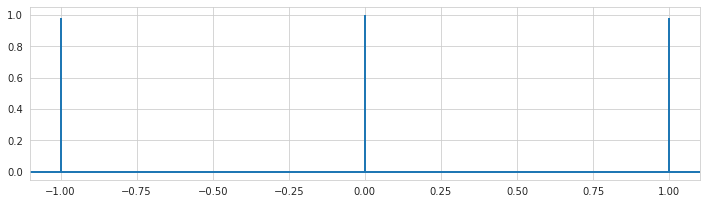

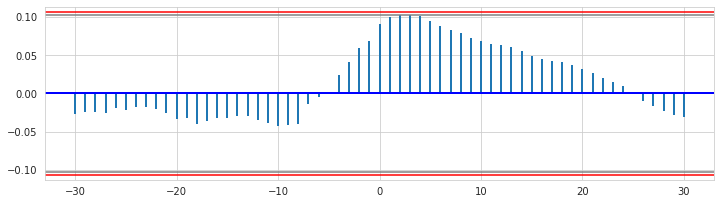


*** (2021) Rio de Janeiro
r0_DETRENDED


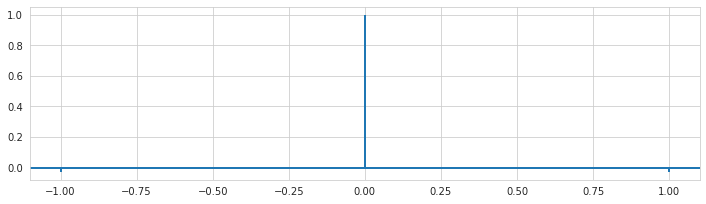

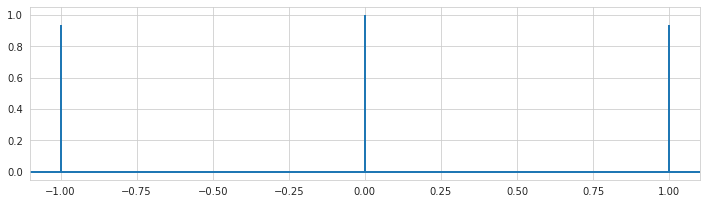

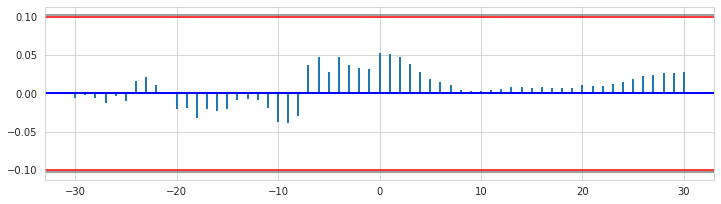


*** (2021) Salvador
r0_DETRENDED


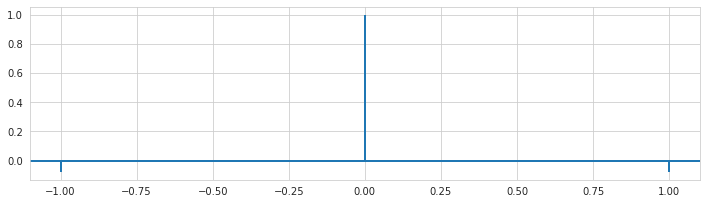

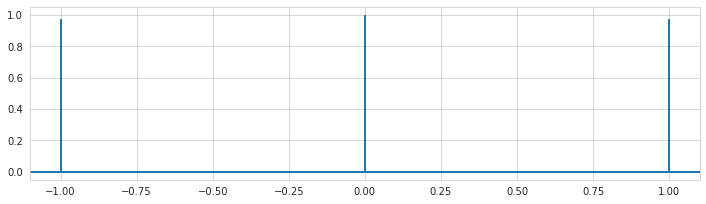

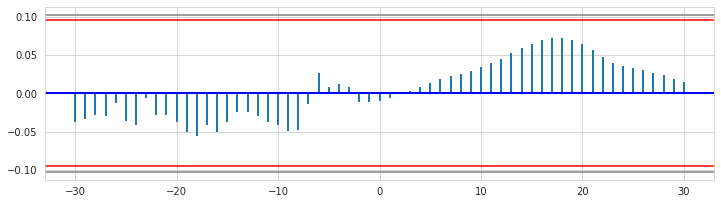


*** (2021) Santo André
r0_DETRENDED


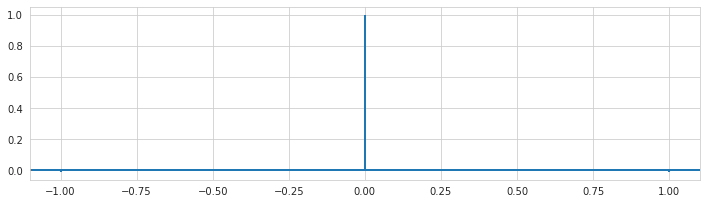

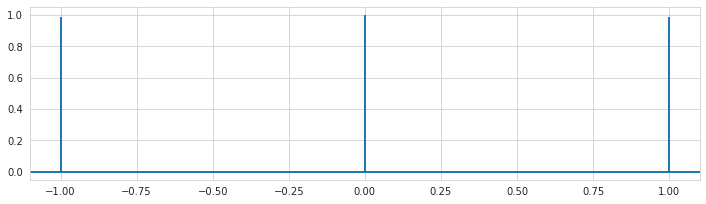

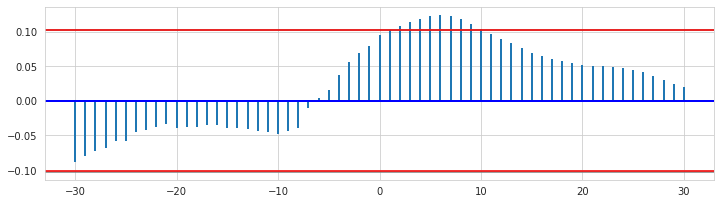


*** (2021) Serra
r0_DETRENDED


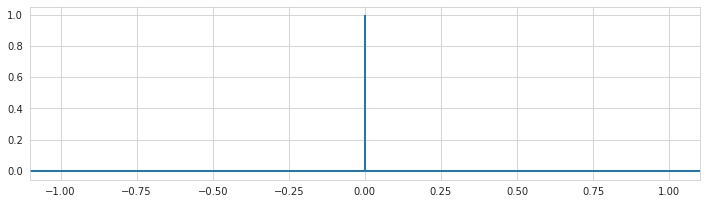

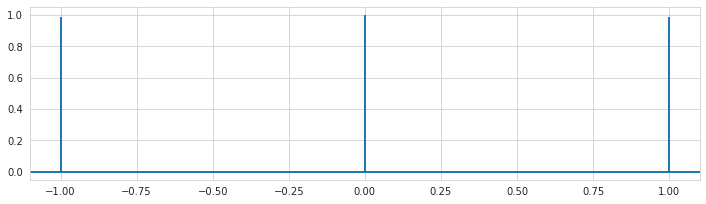

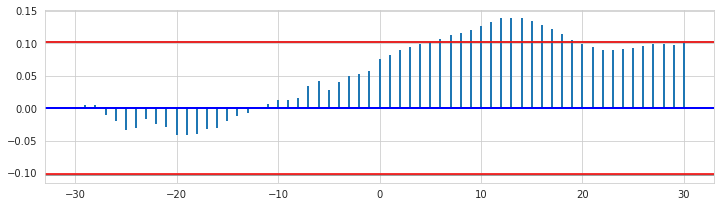


*** (2021) Sorocaba
r0_DETRENDED


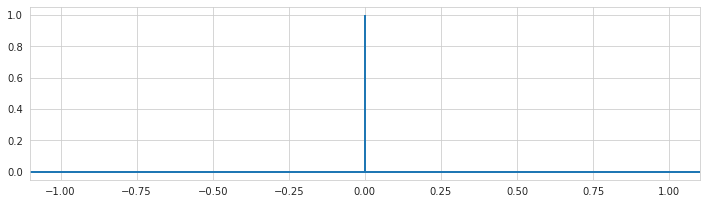

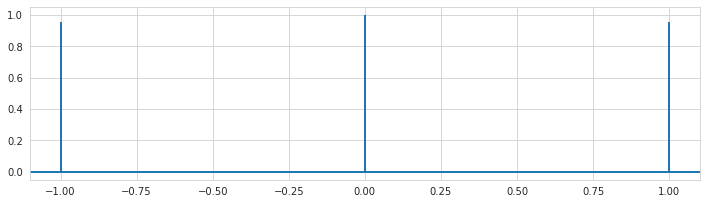

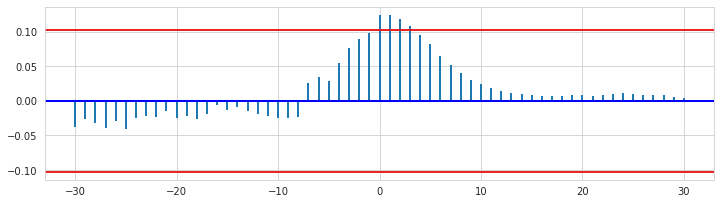


*** (2021) São Bernardo do Campo
r0_DETRENDED


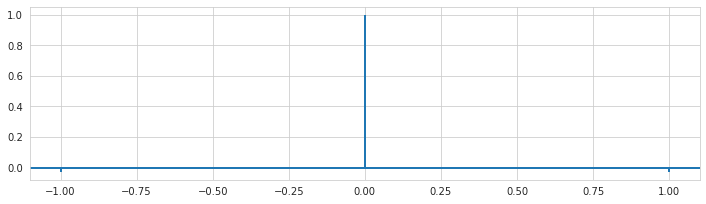

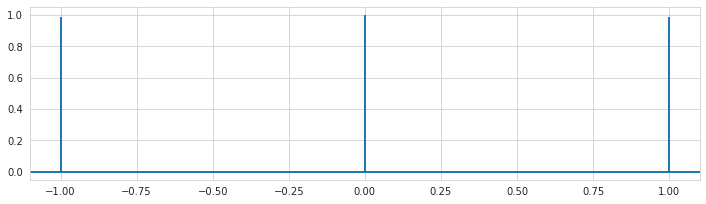

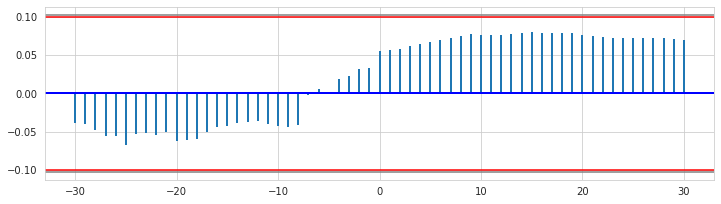


*** (2021) São Gonçalo
r0_DETRENDED


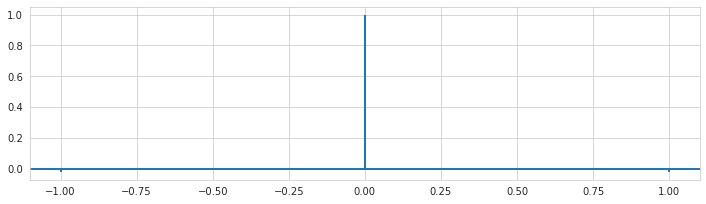

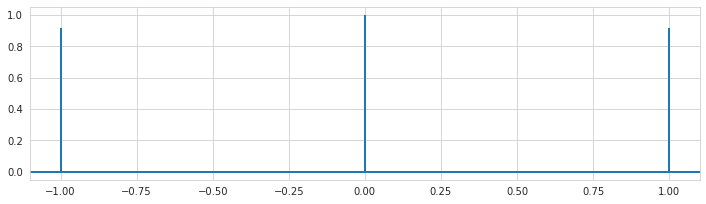

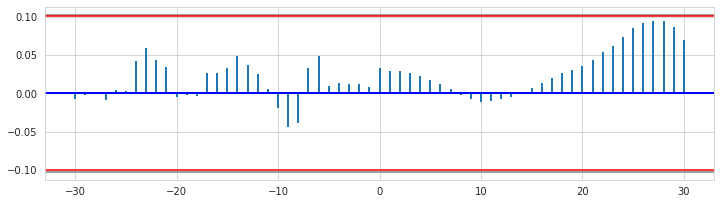


*** (2021) São José dos Campos
r0_DETRENDED


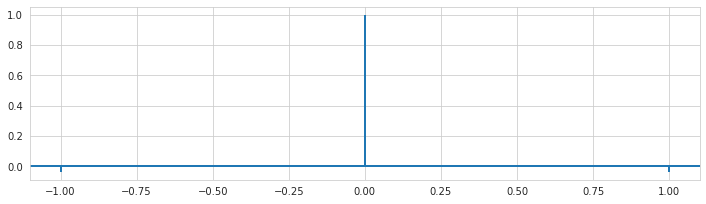

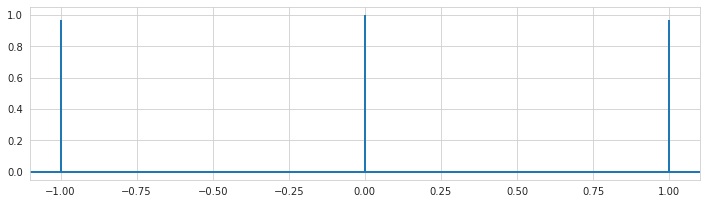

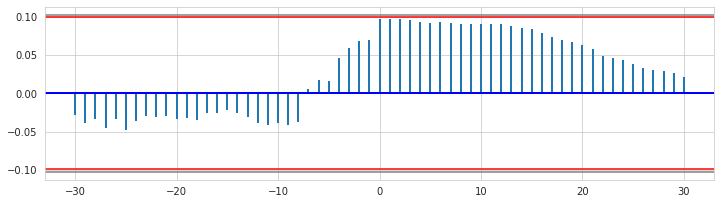


*** (2021) São Luís
r0_DETRENDED


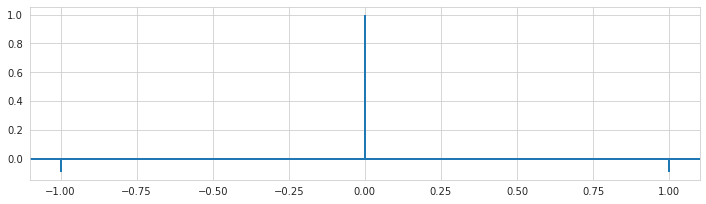

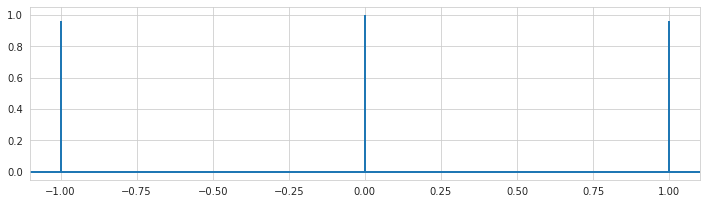

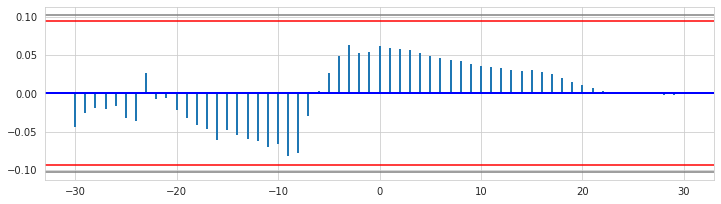


*** (2021) São Paulo
r0_DETRENDED


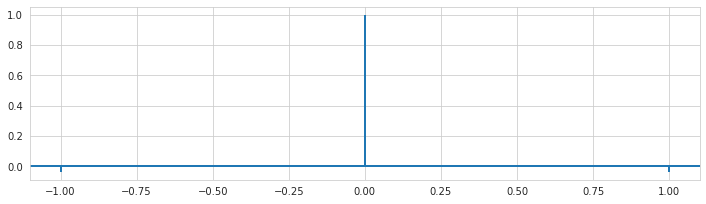

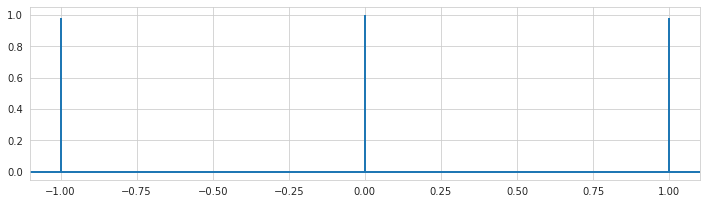

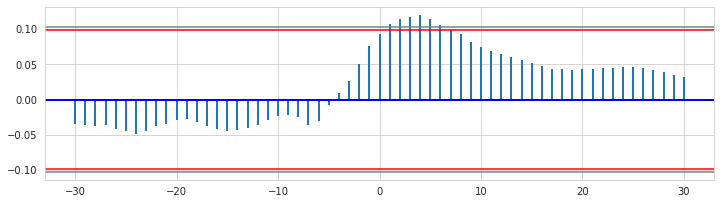


*** (2021) Teresina
r0_DETRENDED


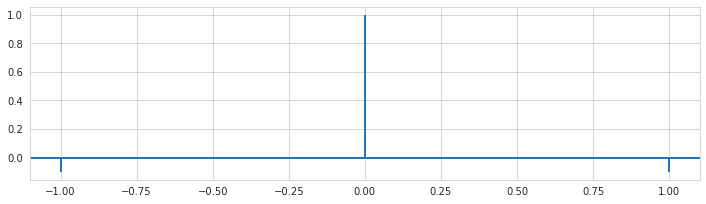

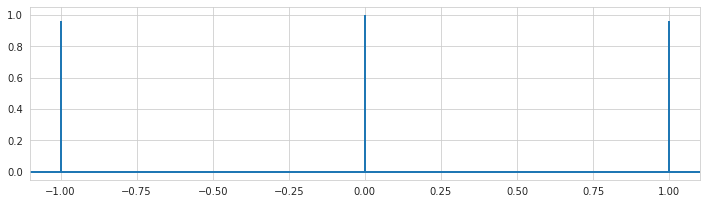

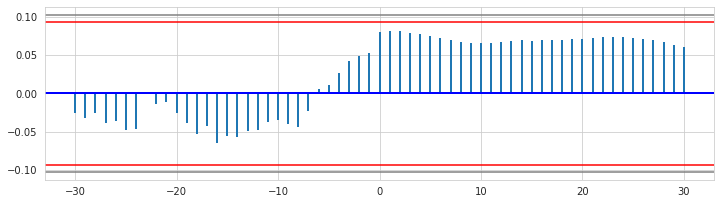


*** (2021) Uberlândia
r0_DETRENDED


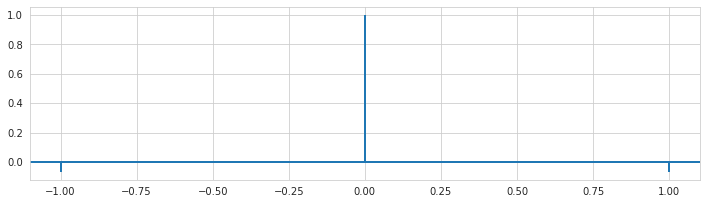

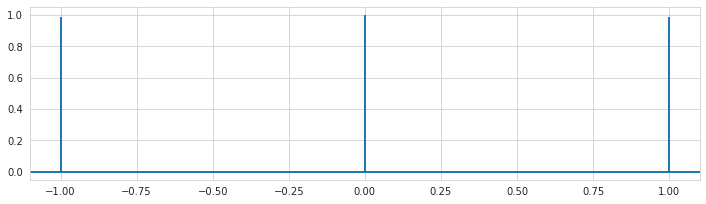

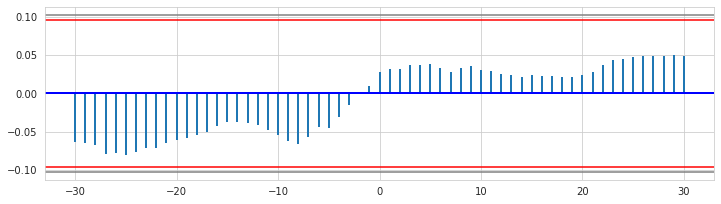


*** (2022) Aparecida de Goiânia
r0_DETRENDED


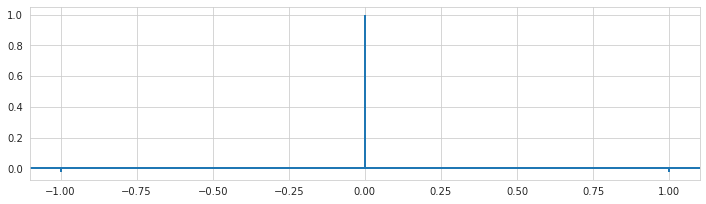

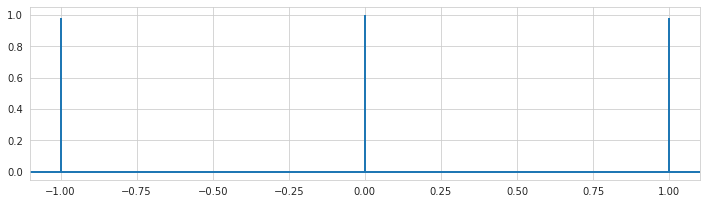

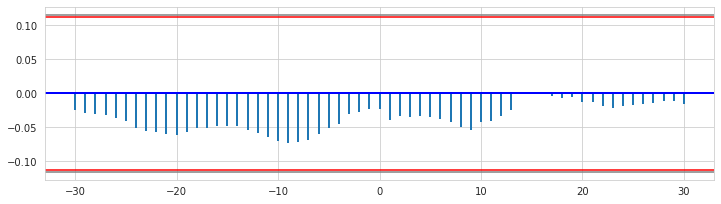


*** (2022) Aracaju
r0_DETRENDED


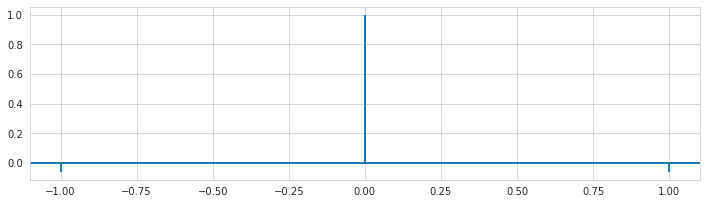

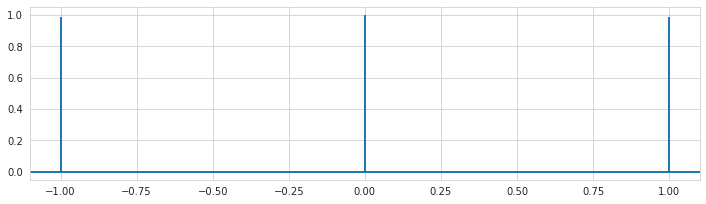

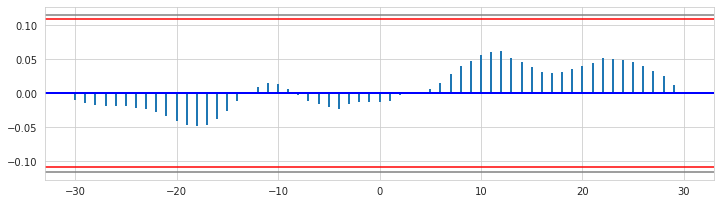


*** (2022) Belo Horizonte
r0_DETRENDED


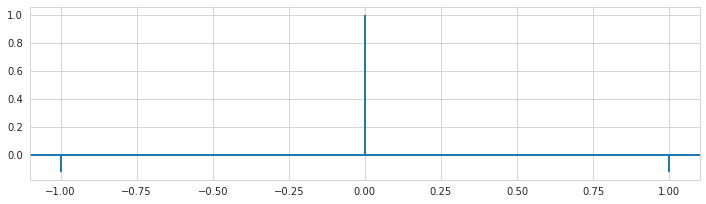

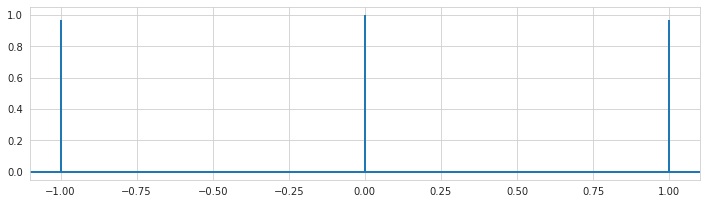

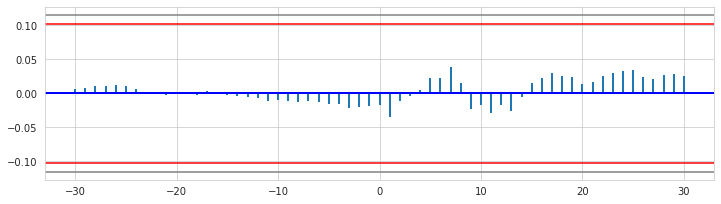


*** (2022) Belém
r0_DETRENDED


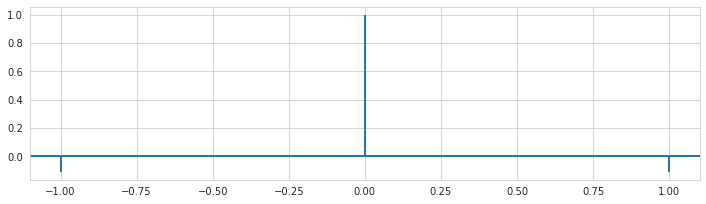

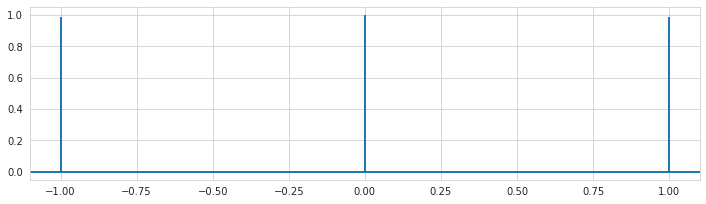

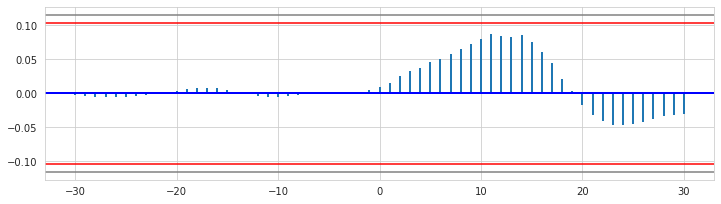


*** (2022) Brasília
r0_DETRENDED


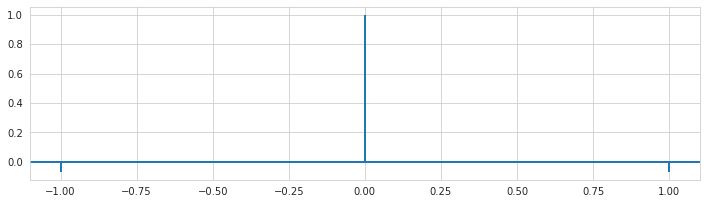

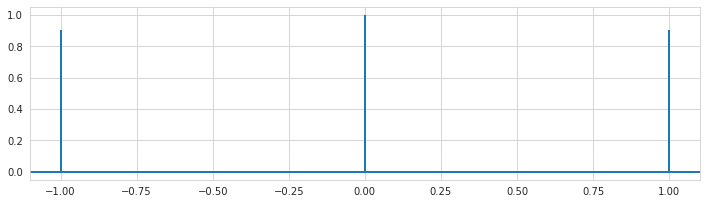

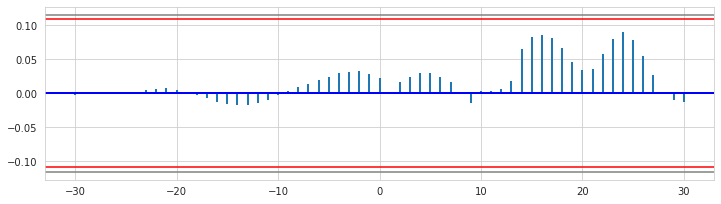


*** (2022) Campinas
r0_DETRENDED


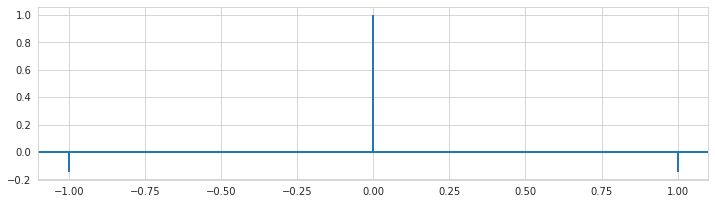

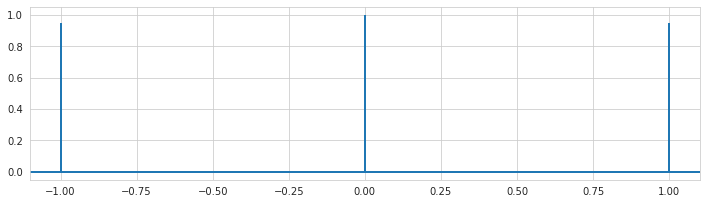

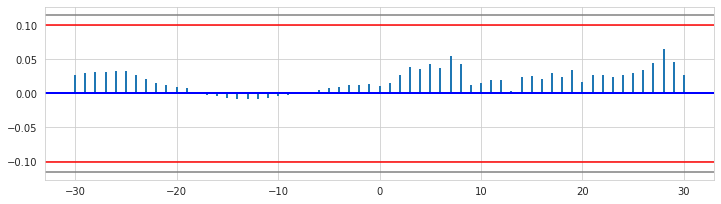


*** (2022) Campo Grande
r0_DETRENDED


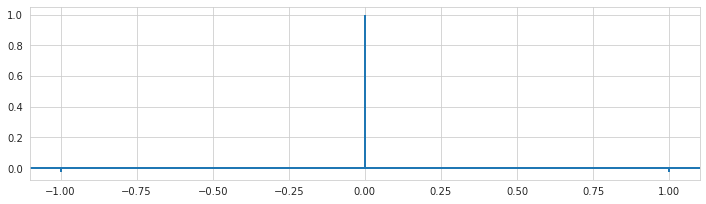

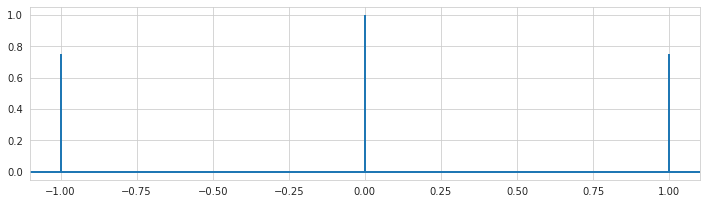

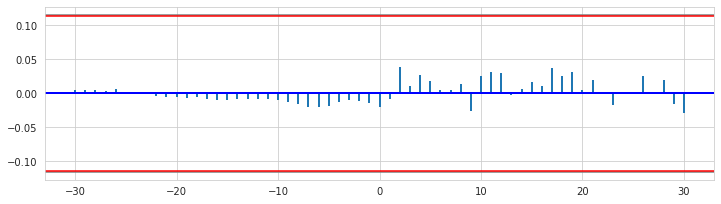


*** (2022) Contagem
r0_DETRENDED


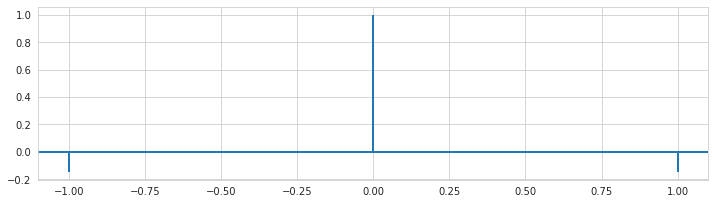

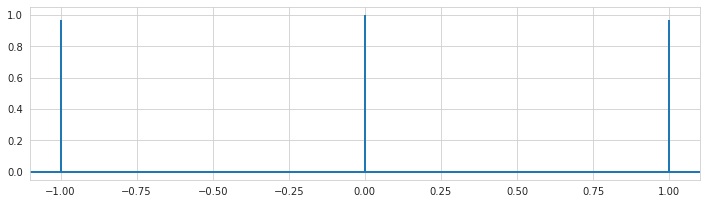

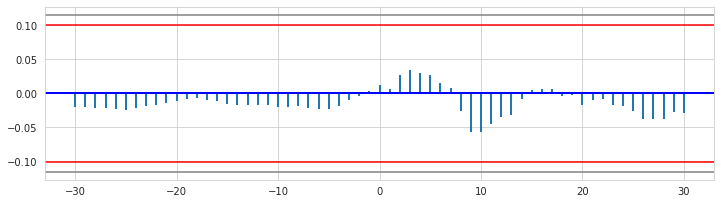


*** (2022) Cuiabá
r0_DETRENDED


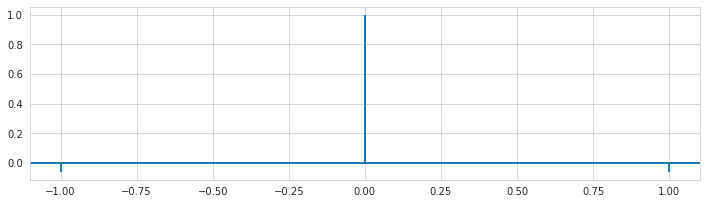

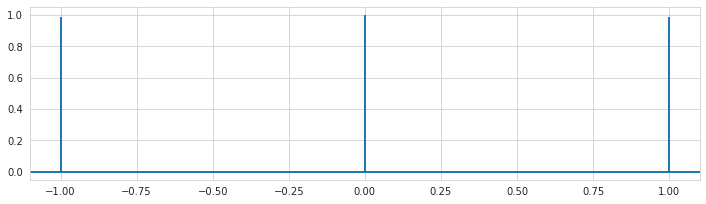

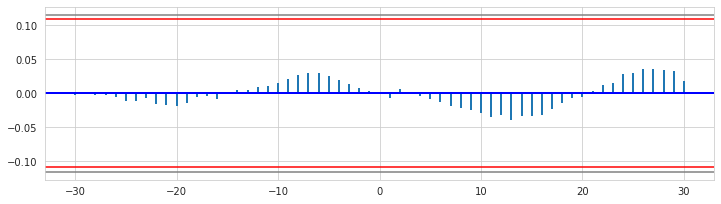


*** (2022) Curitiba
r0_DETRENDED


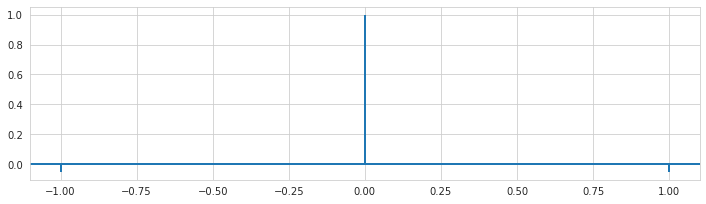

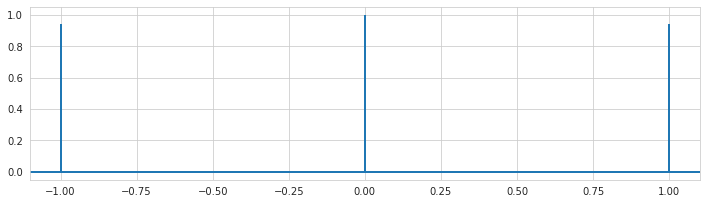

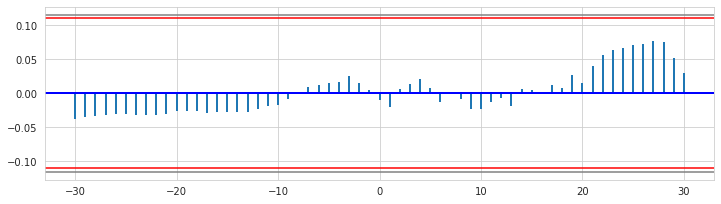


*** (2022) Duque de Caxias
r0_DETRENDED


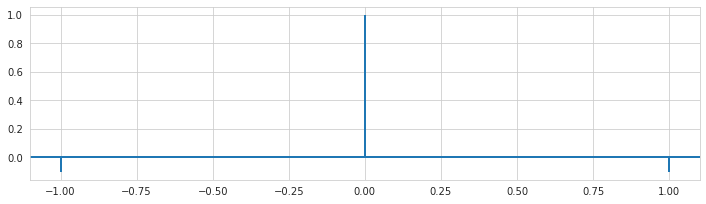

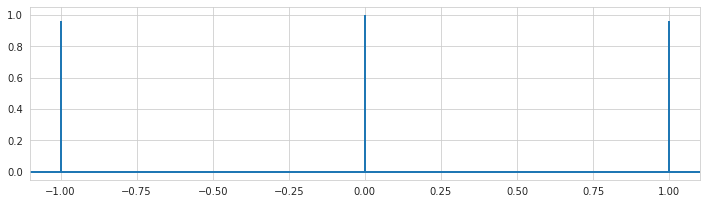

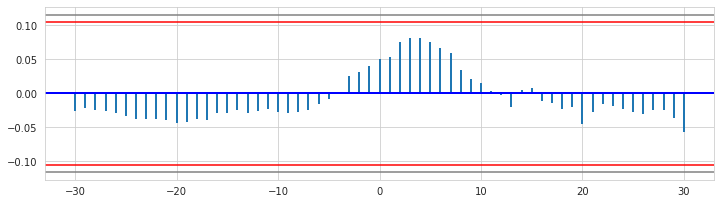


*** (2022) Feira de Santana
r0_DETRENDED


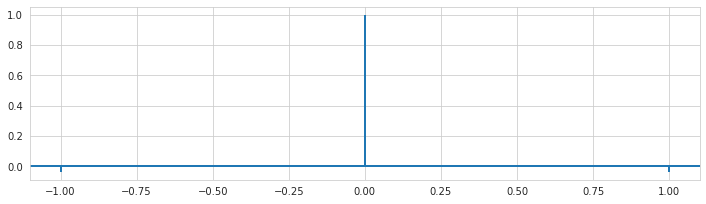

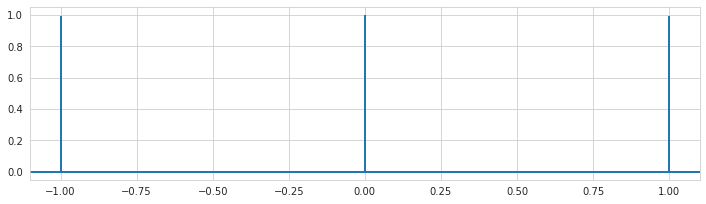

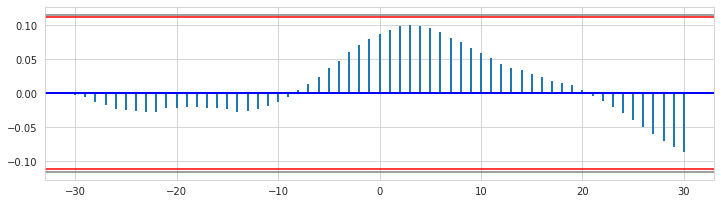


*** (2022) Florianópolis
r0_DETRENDED


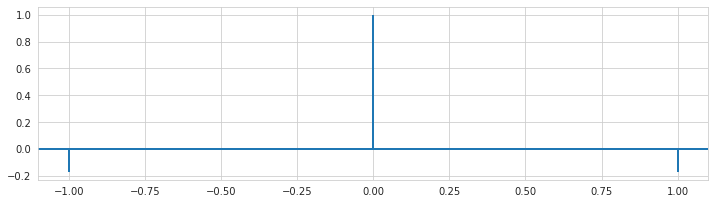

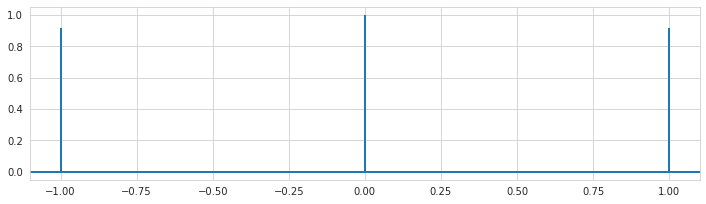

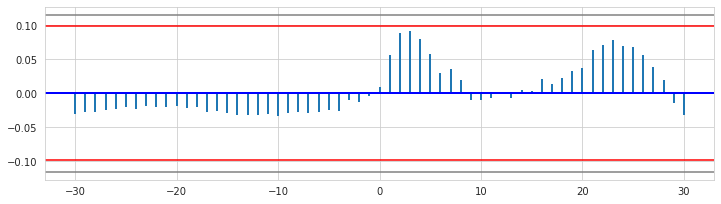


*** (2022) Fortaleza
r0_DETRENDED


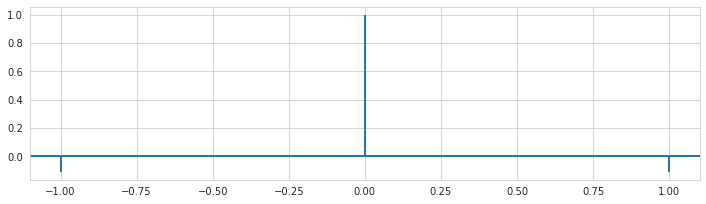

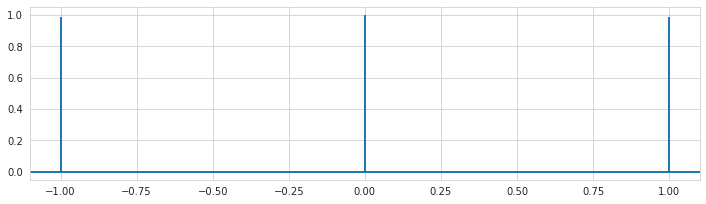

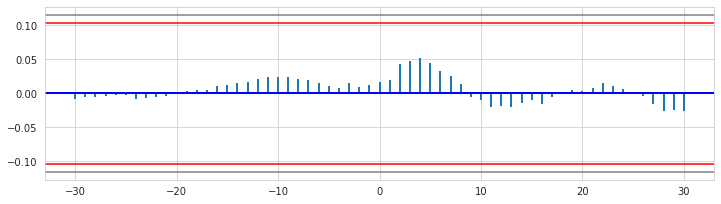


*** (2022) Goiânia
r0_DETRENDED


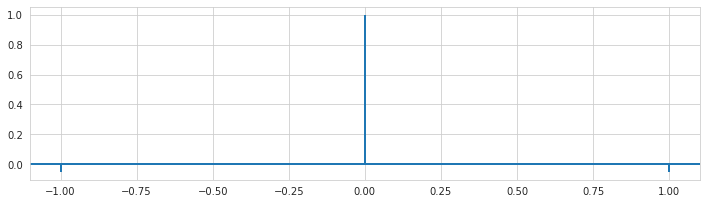

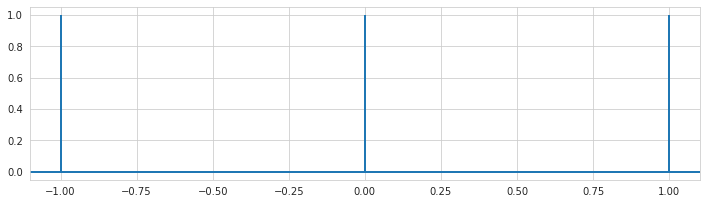

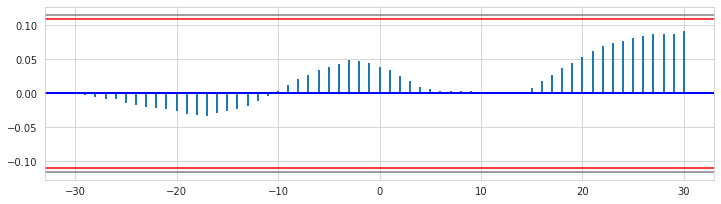


*** (2022) Guarulhos
r0_DETRENDED


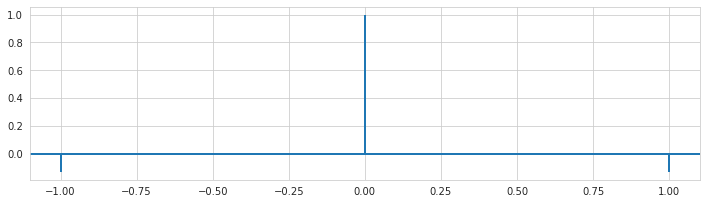

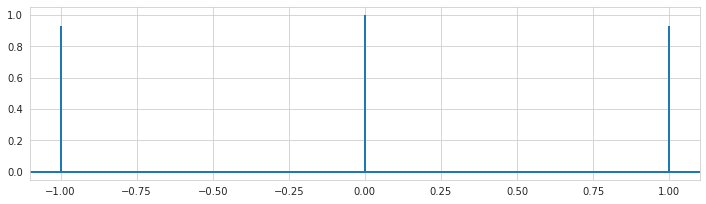

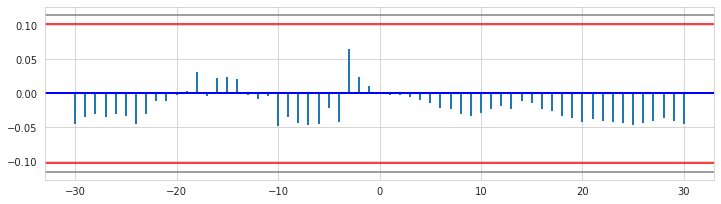


*** (2022) Jaboatão dos Guararapes
r0_DETRENDED


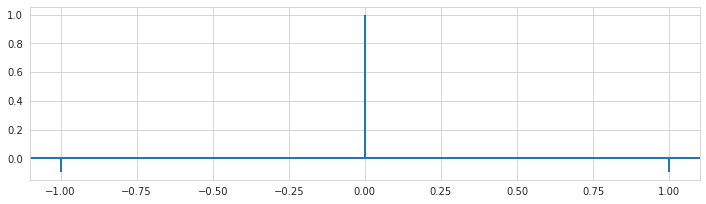

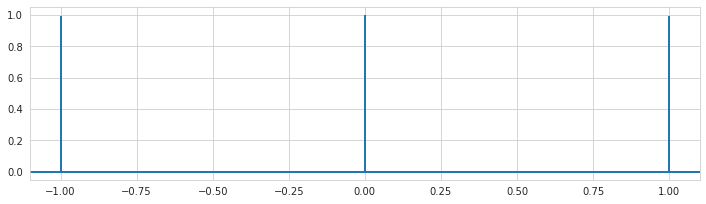

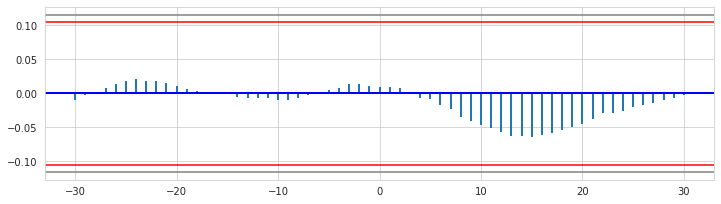


*** (2022) Joinville
r0_DETRENDED


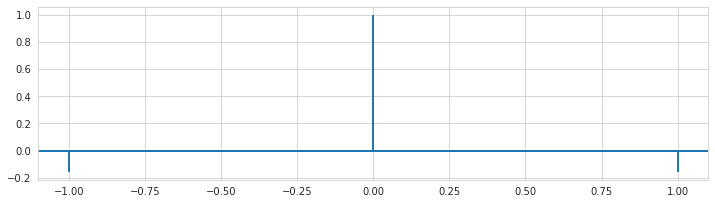

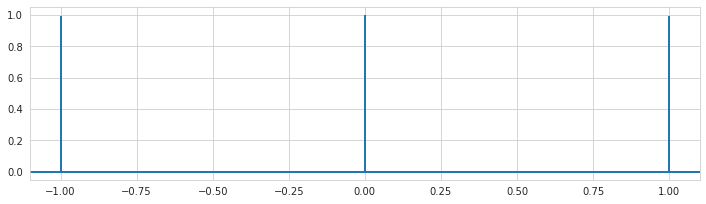

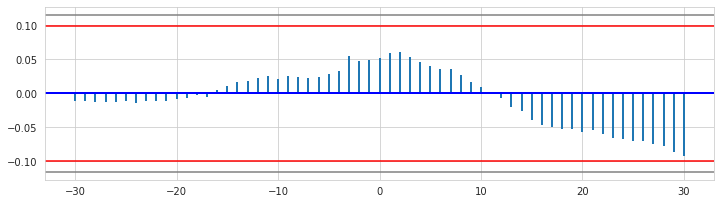


*** (2022) João Pessoa
r0_DETRENDED


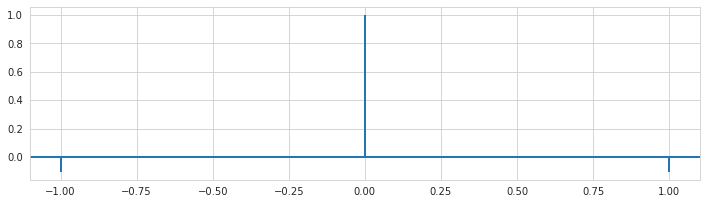

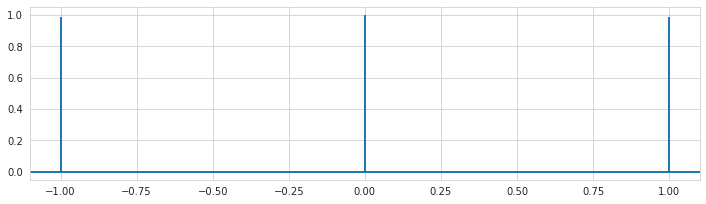

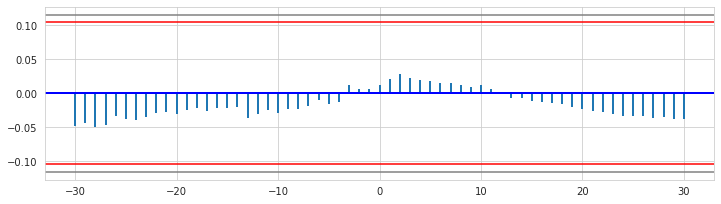


*** (2022) Juiz de Fora
r0_DETRENDED


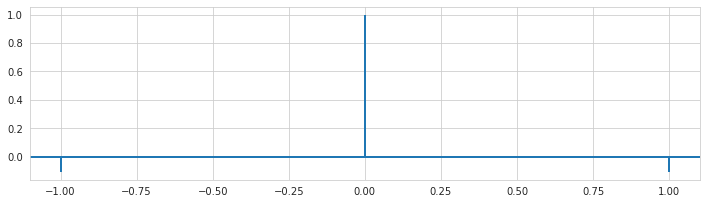

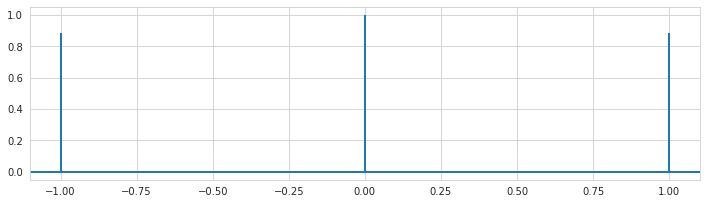

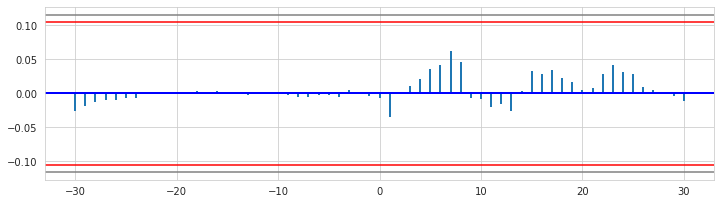


*** (2022) Londrina
r0_DETRENDED


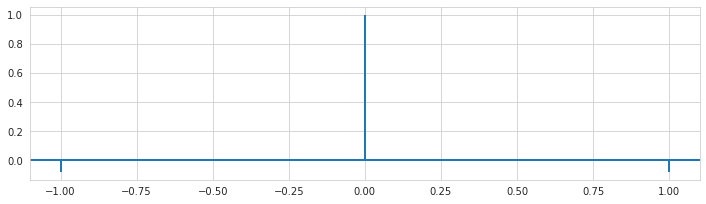

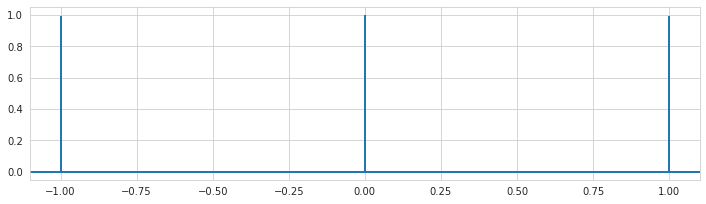

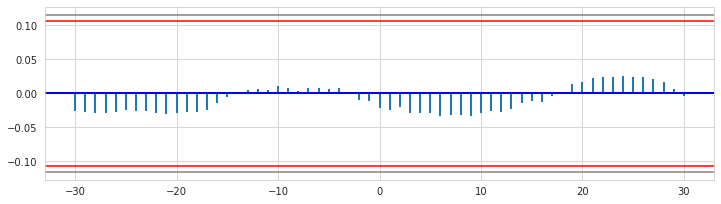


*** (2022) Maceió
r0_DETRENDED


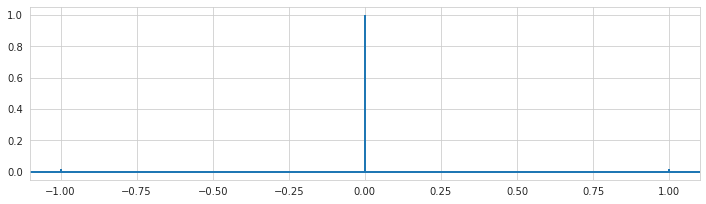

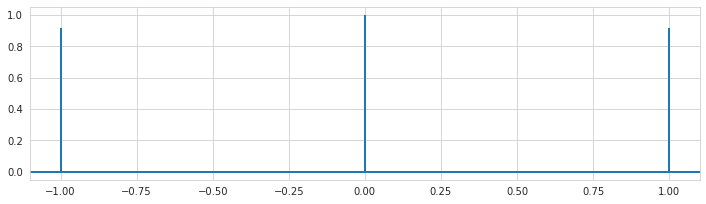

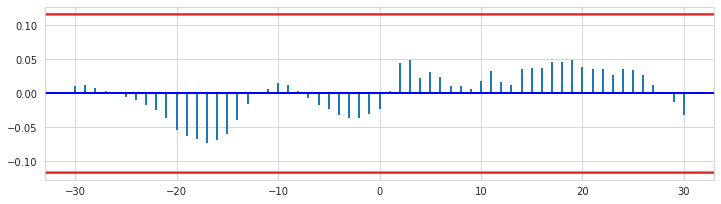


*** (2022) Manaus
r0_DETRENDED


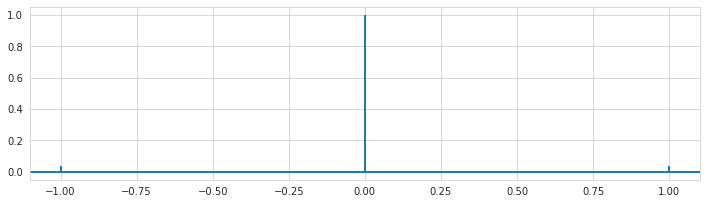

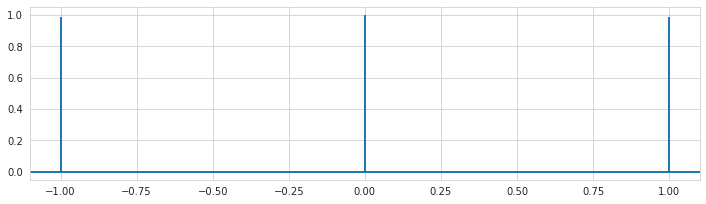

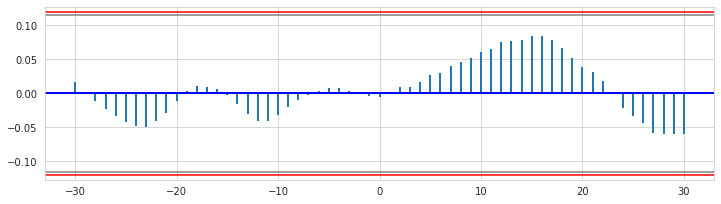


*** (2022) Natal
r0_DETRENDED


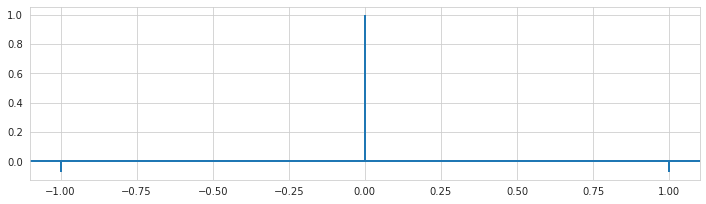

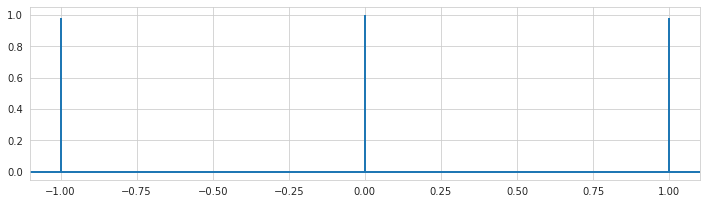

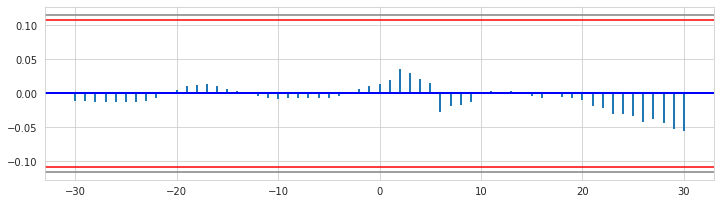


*** (2022) Nova Iguaçu
r0_DETRENDED


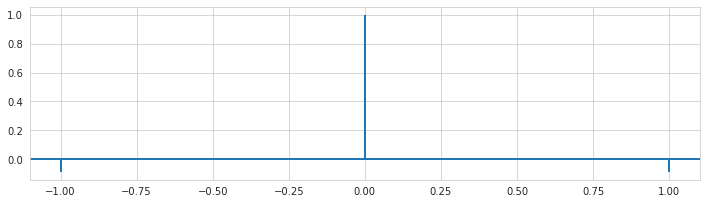

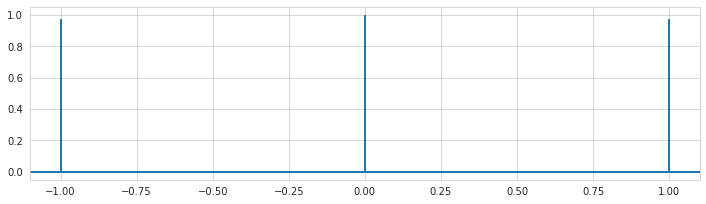

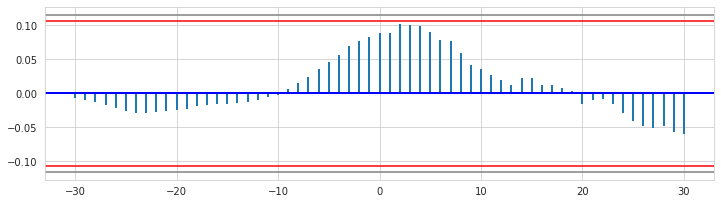


*** (2022) Osasco
r0_DETRENDED


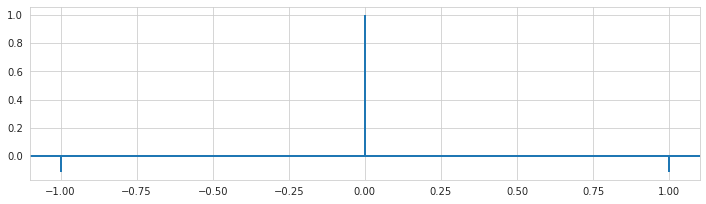

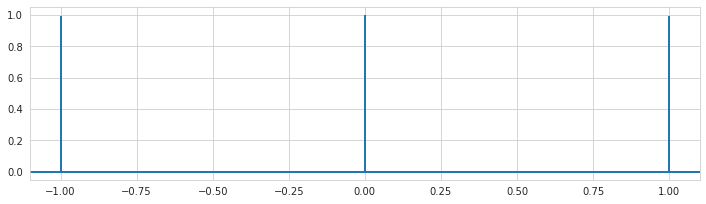

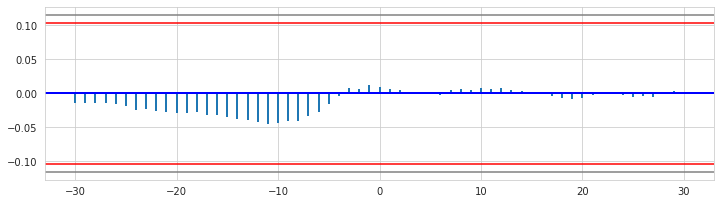


*** (2022) Porto Alegre
r0_DETRENDED


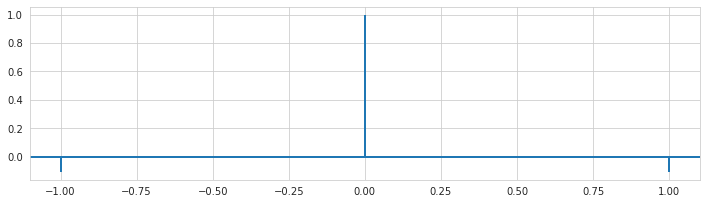

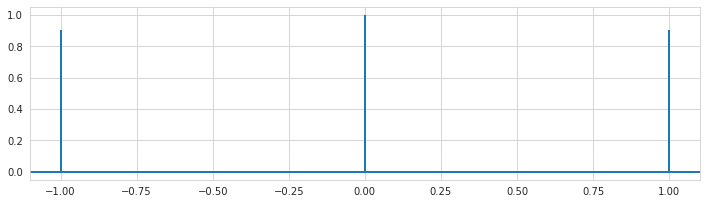

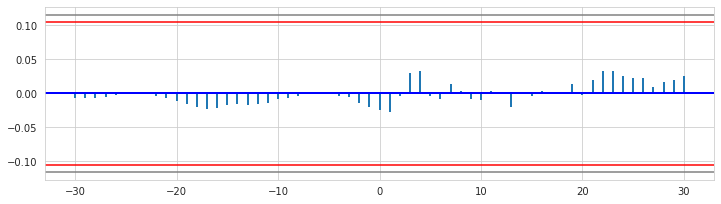


*** (2022) Recife
r0_DETRENDED


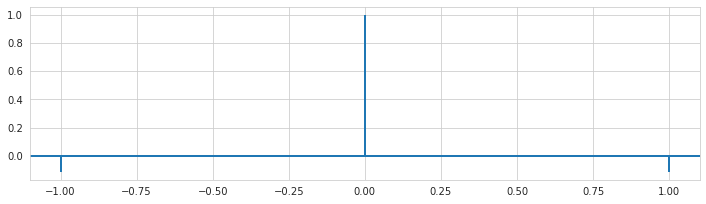

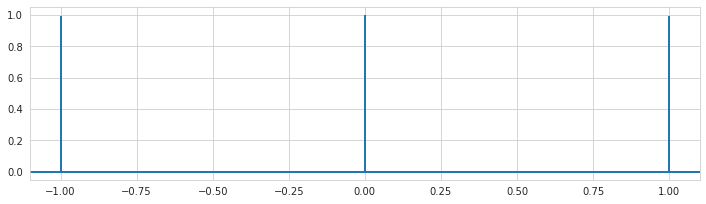

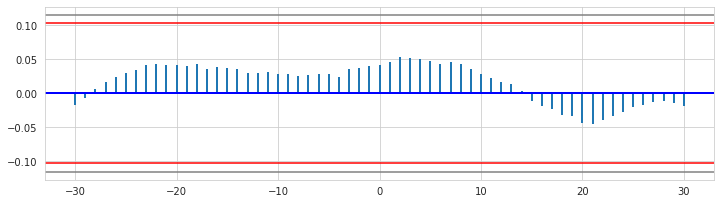


*** (2022) Ribeirão Preto
r0_DETRENDED


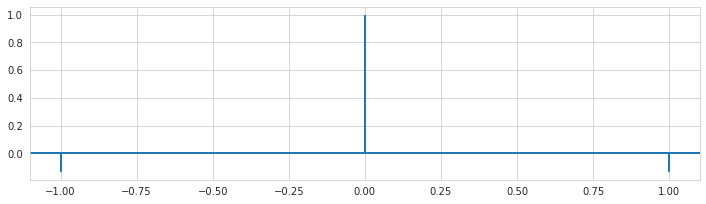

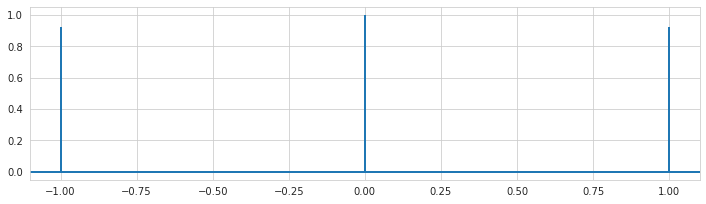

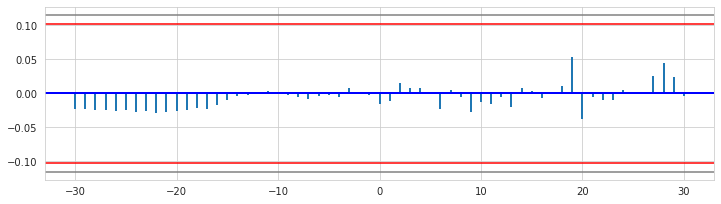


*** (2022) Rio de Janeiro
r0_DETRENDED


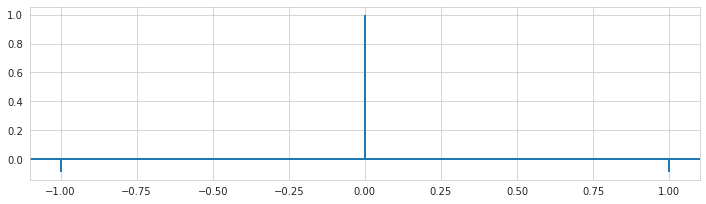

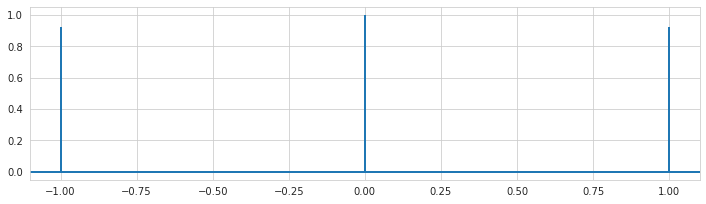

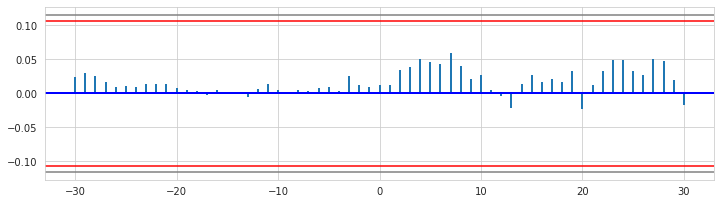


*** (2022) Salvador
r0_DETRENDED


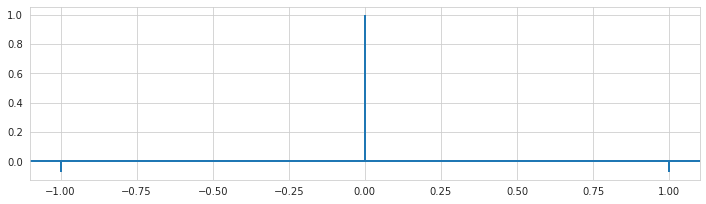

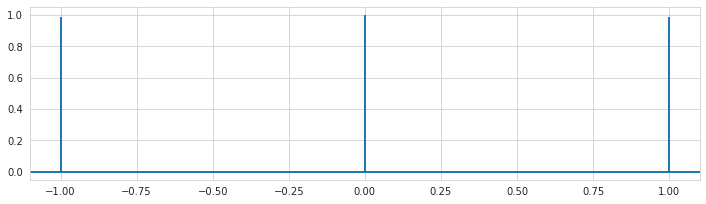

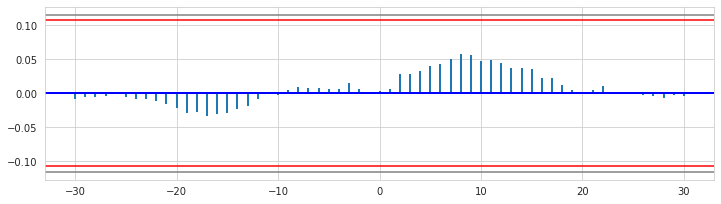


*** (2022) Santo André
r0_DETRENDED


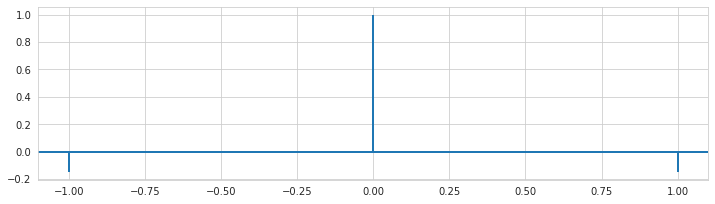

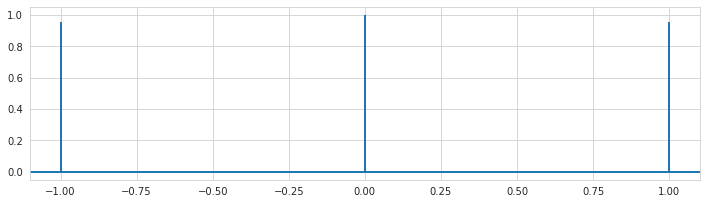

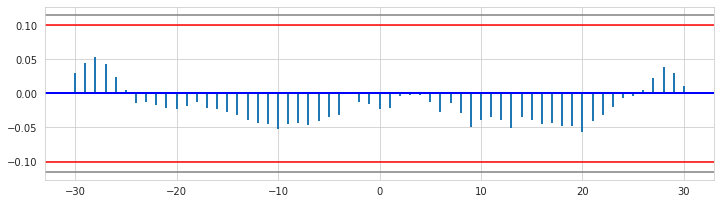


*** (2022) Serra
r0_DETRENDED


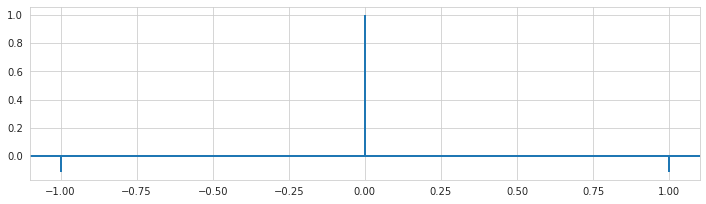

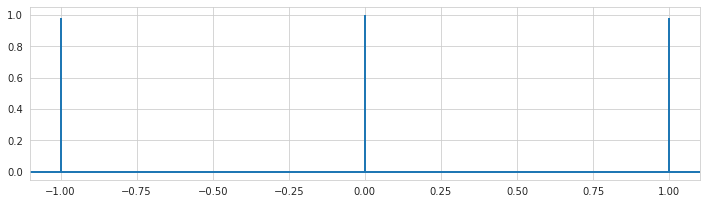

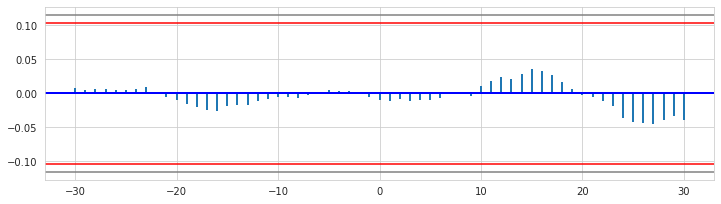


*** (2022) Sorocaba
r0_DETRENDED


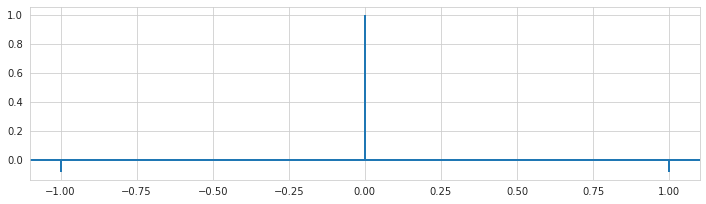

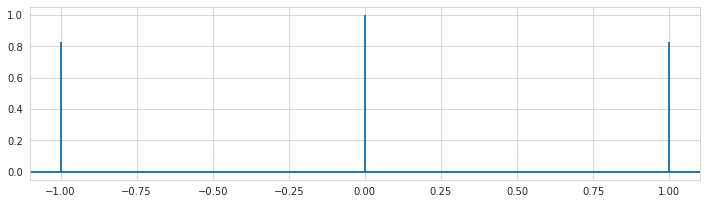

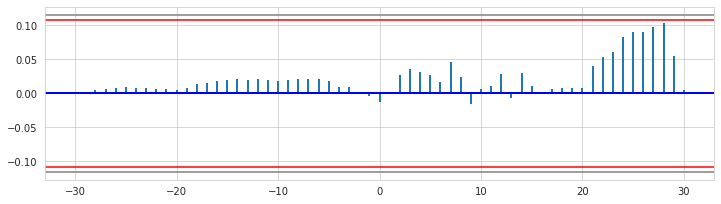


*** (2022) São Bernardo do Campo
r0_DETRENDED


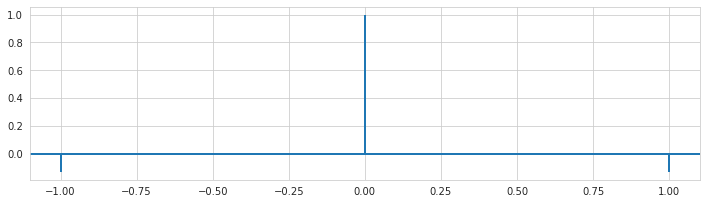

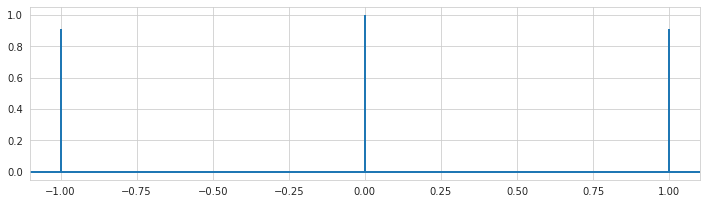

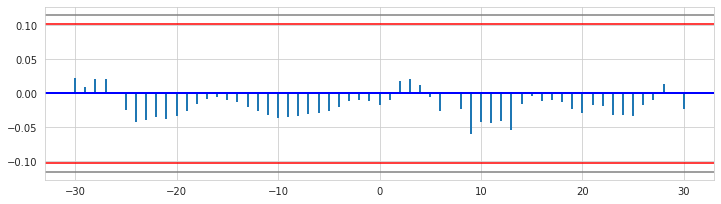


*** (2022) São Gonçalo
r0_DETRENDED


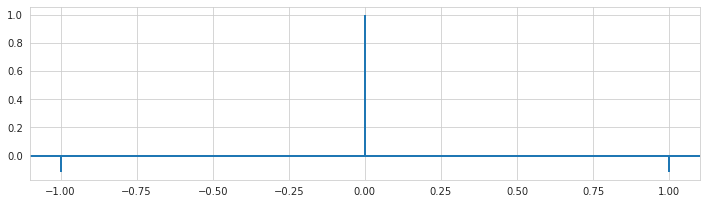

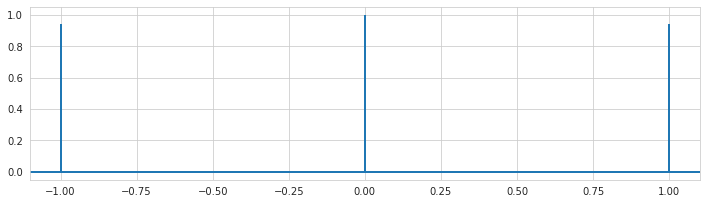

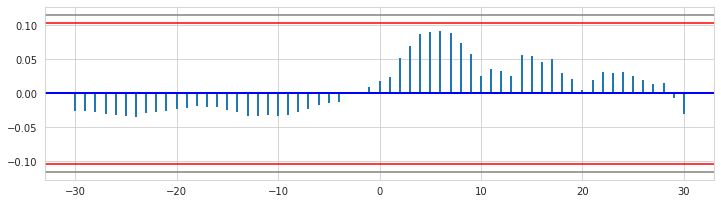


*** (2022) São José dos Campos
r0_DETRENDED


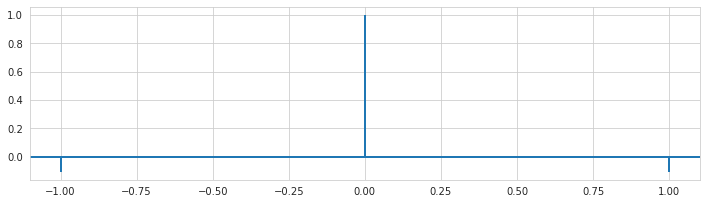

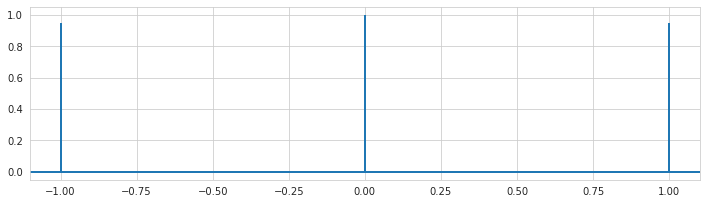

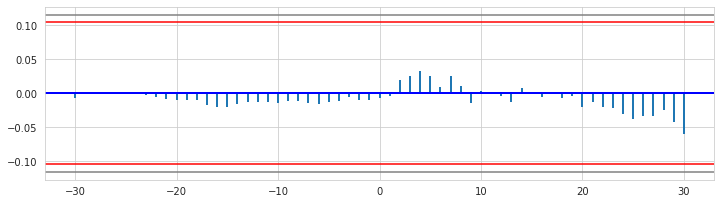


*** (2022) São Luís
r0_DETRENDED


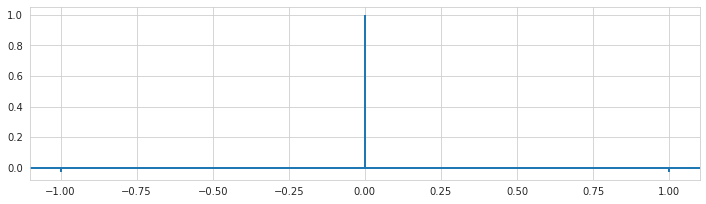

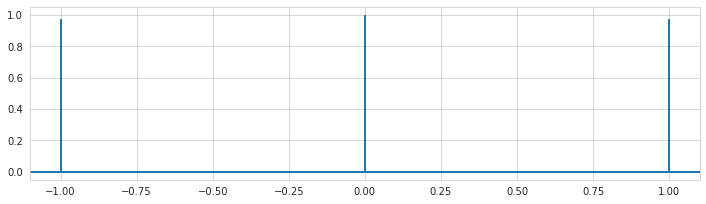

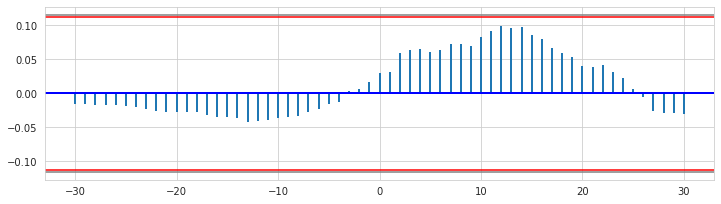


*** (2022) São Paulo
r0_DETRENDED


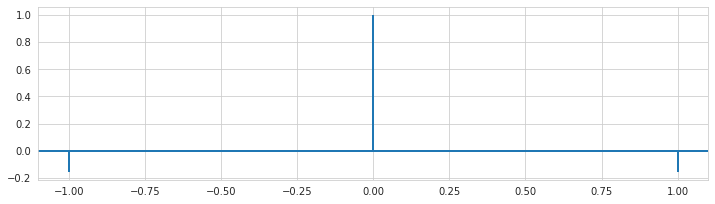

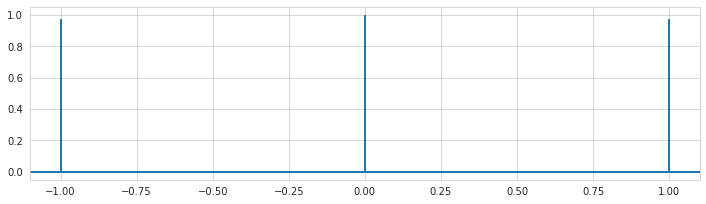

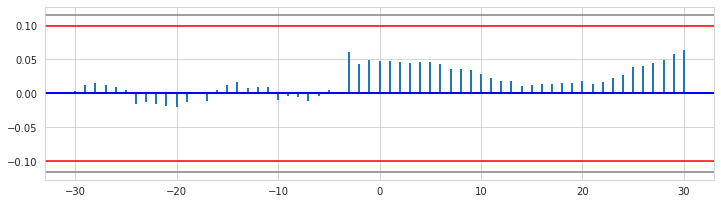


*** (2022) Teresina
r0_DETRENDED


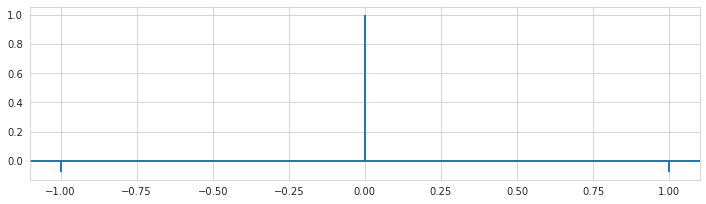

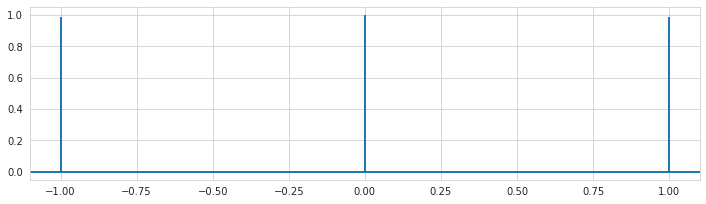

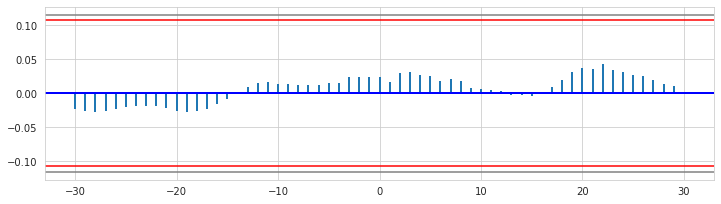


*** (2022) Uberlândia
r0_DETRENDED


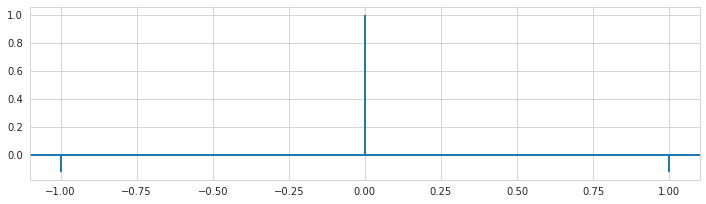

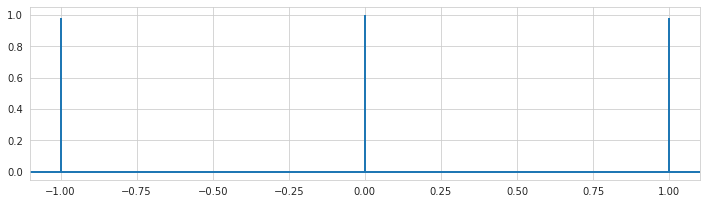

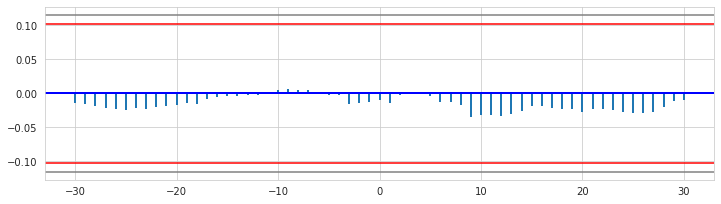

In [14]:
for analysis, df_analysis in zip(['general', '2020', '2021', '2022'], [df_diff, df_diff_2020, df_diff_2021, df_diff_2022]):
# for analysis, df_analysis in zip(['general'], [df_diff]):
    df_lags = pd.DataFrame()
    
    for id_municipality in df_analysis.CODIGO_MUNICIPIO_7.unique():
        df_temp = df_analysis[df_analysis.CODIGO_MUNICIPIO_7==id_municipality]
        
        # if(analysis in ['general', '2020']):
        #     date_end_first_outbreak = df_temp[df_temp.ONSET_NUMERO_REPRODUCAO_EFETIVO_MEDIA == 0].DATA.max()
        #     df_temp = df_temp[df_temp.DATA > date_end_first_outbreak]
        
        name_municipality = df_temp.municipality.values[0]
        print('\n*** ('+analysis+') '+name_municipality) 
        x = 'PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_MEDIA_7_DIAS_WHITED'
        for y in ['r0_DETRENDED']:
            print(y)
            df_temp_without_nan = df_temp[(df_temp[x].isna() == False) & (df_temp[y].isna() == False)]
            if(len(df_temp_without_nan)>=30):
                lags, c, max_lags_to_show, conf_level, conf_level_hard = calculate_cross_correlation(df_temp_without_nan[x], df_temp_without_nan[y])
        
                df_lags_municipality = pd.DataFrame({'LAG': lags, 'CORRELATION': c})
                df_lags_municipality['CODIGO_MUNICIPIO_7'] = id_municipality
                df_lags_municipality['MUNICIPIO'] = name_municipality
                df_lags_municipality['X'] = x
                df_lags_municipality['Y'] = y
                df_lags_municipality['CONFIANCE_LEVEL'] = conf_level
                df_lags_municipality['CONFIANCE_LEVEL_HARD'] = conf_level_hard
                df_lags_municipality['MAX_LEGS_TO_SHOW'] = max_lags_to_show
        
                df_lags = pd.concat([df_lags, df_lags_municipality], ignore_index=True)
            
    df_lags.to_csv('../data/df_lags_'+analysis+'.csv')

In [15]:
df_lags

,LAG,CORRELATION,CODIGO_MUNICIPIO_7,MUNICIPIO,X,Y,CONFIANCE_LEVEL,CONFIANCE_LEVEL_HARD,MAX_LEGS_TO_SHOW
0,-30,-0.024630,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.115494,0.112802,30
1,-29,-0.028245,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.115494,0.112802,30
2,-28,-0.030333,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.115494,0.112802,30
3,-27,-0.031506,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.115494,0.112802,30
4,-26,-0.036691,5201405,Aparecida de Goiânia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.115494,0.112802,30
...,...,...,...,...,...,...,...,...,...
2496,26,-0.028767,3170206,Uberlândia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.115494,0.102302,30
2497,27,-0.027607,3170206,Uberlândia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.115494,0.102302,30
2498,28,-0.020827,3170206,Uberlândia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.115494,0.102302,30
2499,29,-0.011281,3170206,Uberlândia,PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS_ME...,r0_DETRENDED,0.115494,0.102302,30
